# Multi Linear Regression assignment 
# 1. Toyoto Corolla

Problem:
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


First we'll import all the required libaries, which includes pandas, numpy, matplotlib, and seaborn. Then we'll set %matplotlib inline and we'll import rest of the sklearn stuff later

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now we will fetch the data from the csv file and check information and description of the data 

In [2]:
dtcol = pd.read_csv(r'ToyotaCorolla.csv', encoding = 'utf-8') 
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 679: invalid start byte
#had to change the file format to be able to read it

In [3]:
dtcol.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [4]:
dtcol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
dtcol.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [6]:
dtcol[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']].describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

# Exploratory Data Analysis
Let's explore the data!

Let's clean data a little. We have to build a model where 
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
but, there are 37 columns in the data set. So, we are going to get rid of the columns which we wont be using. So, either I can drop all the unnecessary columns, or I can create a new table with the required columns. And leave the original dataset untouched, in case I'd be needing any other data from it. 

In [7]:
dtcol_final = dtcol[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [8]:
dtcol_final

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [9]:
sns.set_style('whitegrid')

We will use seaborn to create a jointplot to compare different relations among the dataset

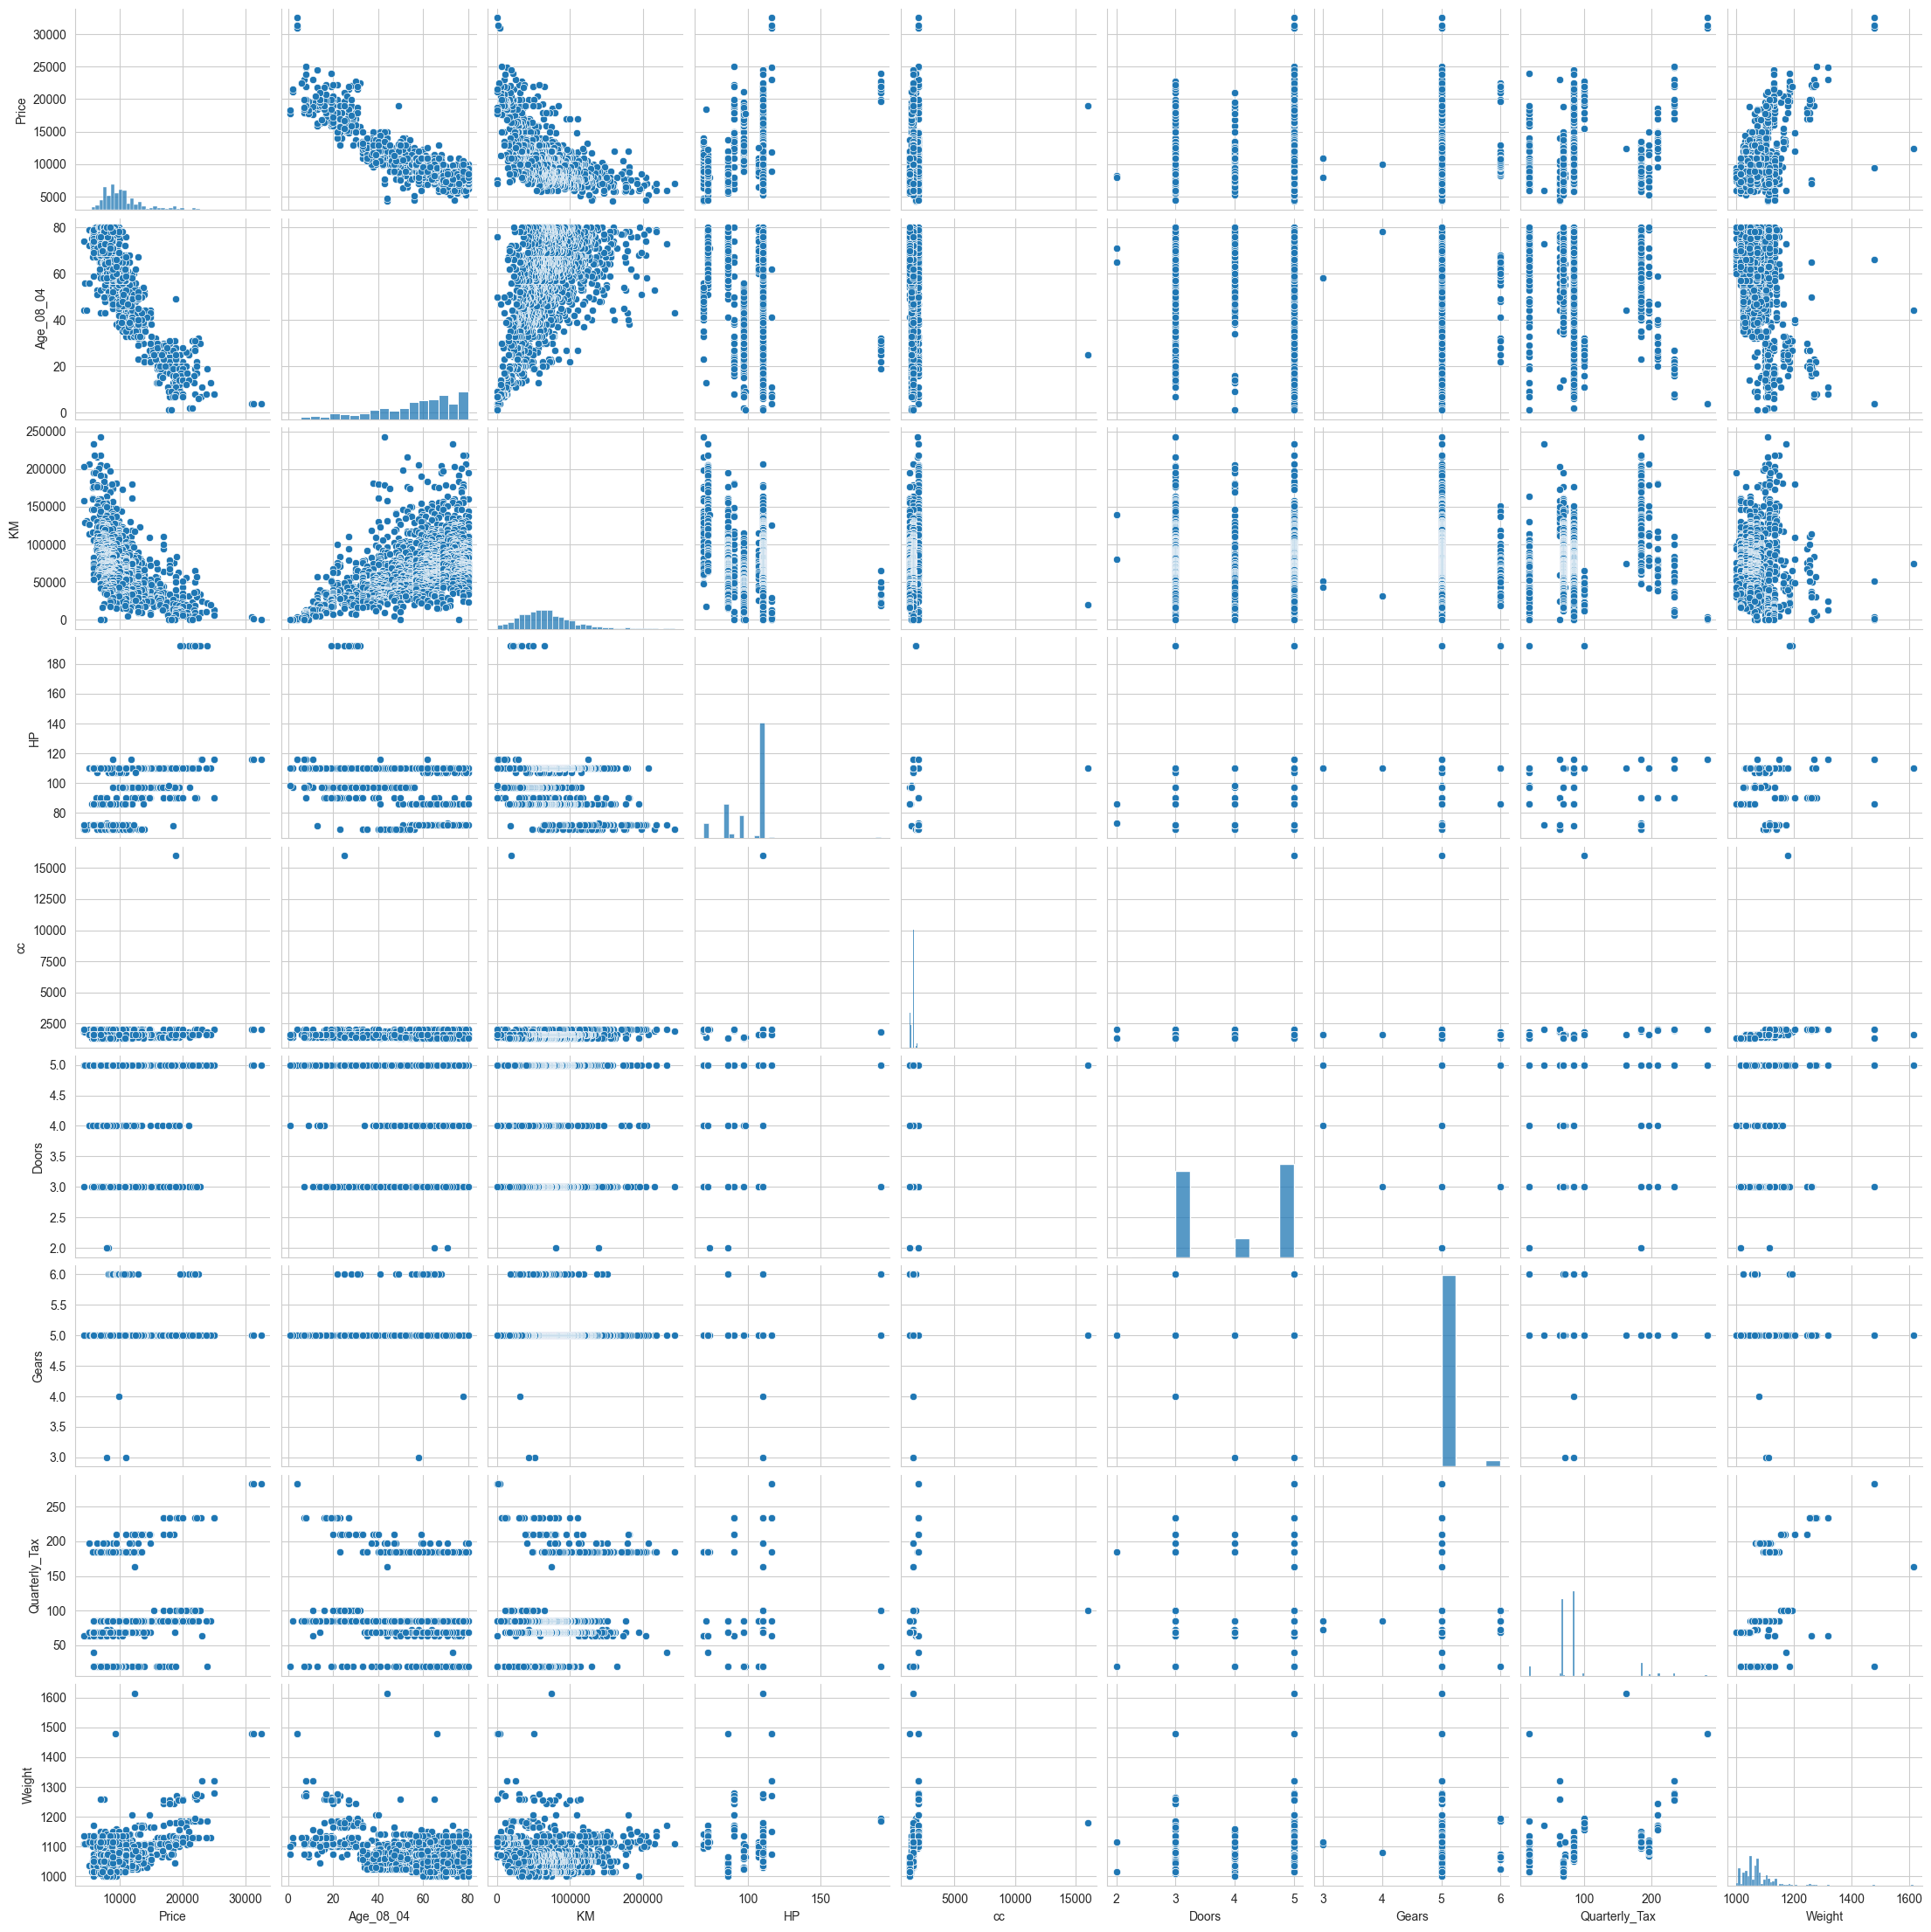

In [10]:
sns.pairplot(dtcol_final)

Here the major linear relations are among price, age and KM seems to be closely related with each other. We'd verify our understanding using the heatmap.

<Axes: >

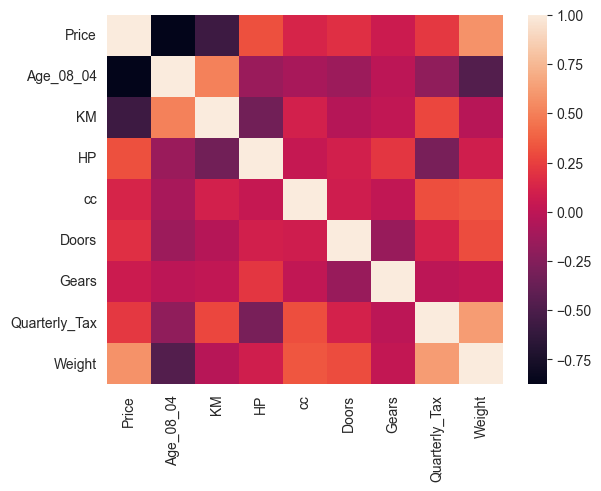

In [11]:
sns.heatmap(dtcol_final.corr(numeric_only = True))

In [12]:
dtcol_final.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

Now, that we know price, age_08_04 and KM are quite related, so we'd take a closer look at them

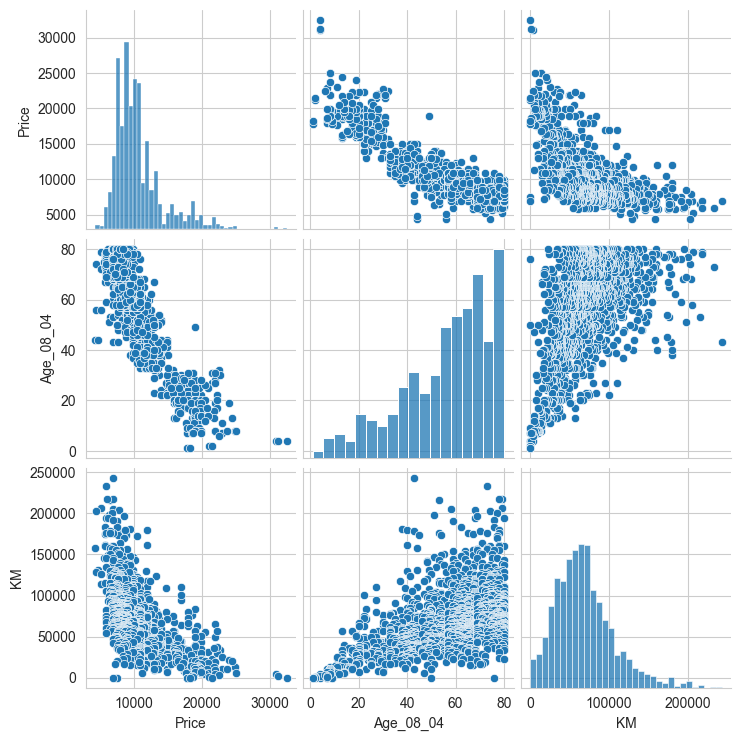

In [13]:
sns.pairplot(dtcol_final[['Price','Age_08_04','KM']])

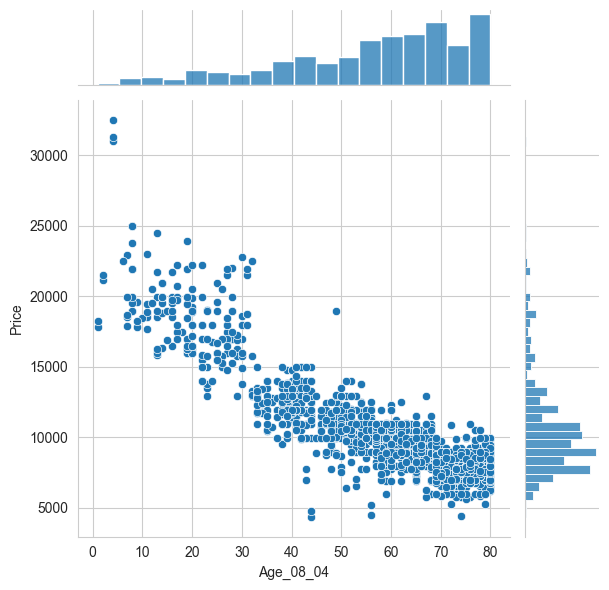

In [14]:
sns.jointplot(x = 'Age_08_04', y = 'Price', data = dtcol_final)

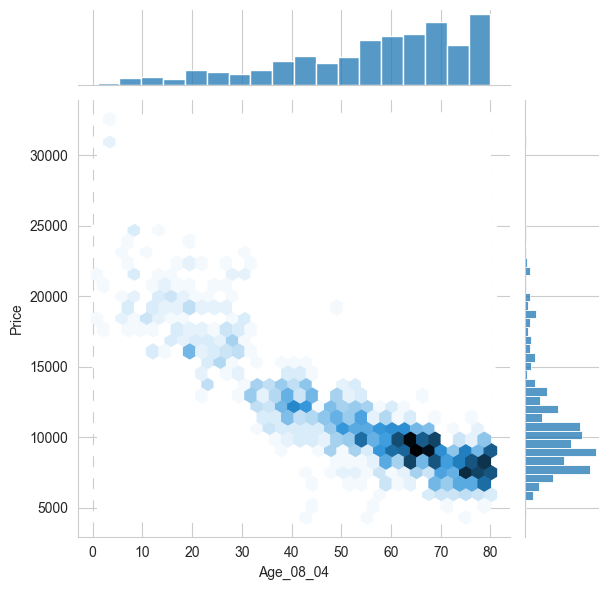

In [15]:
sns.jointplot(x = 'Age_08_04', y = 'Price', data = dtcol_final, kind = 'hex')

Age of the car is a very significant factor, so we tried to see if there it have a linear relation between them. As the value of x, which is Age_08_04 is increasing, the value of y, that is, price is also decreasing.

Now, let us look at how price is related to the KM.

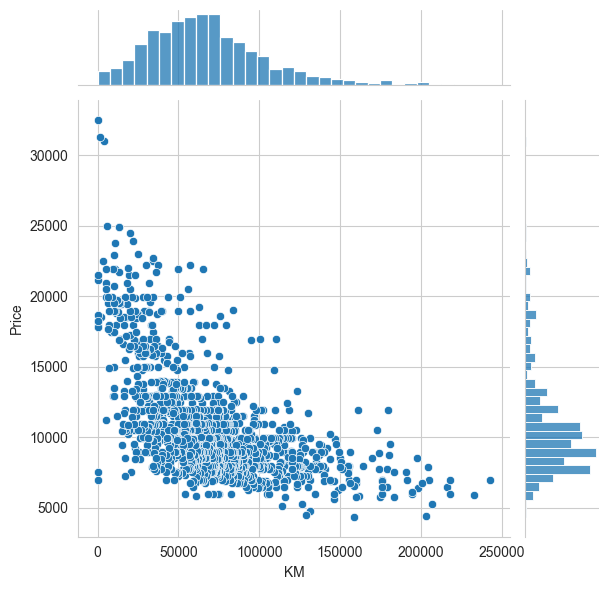

In [16]:
sns.jointplot(x = 'KM', y = 'Price', data = dtcol_final)

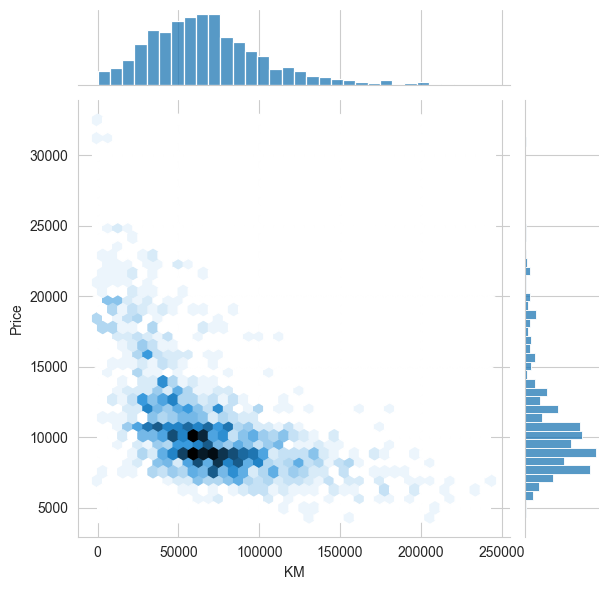

In [17]:
sns.jointplot(x = 'KM', y = 'Price', data = dtcol_final, kind = 'hex')

Like we have already see that price and KM has a correlation of -0.569, here we can see that price does seems to decrease along with the increase in KM.

Also, we can see that price and gears are also quite related. So, let's check that too.

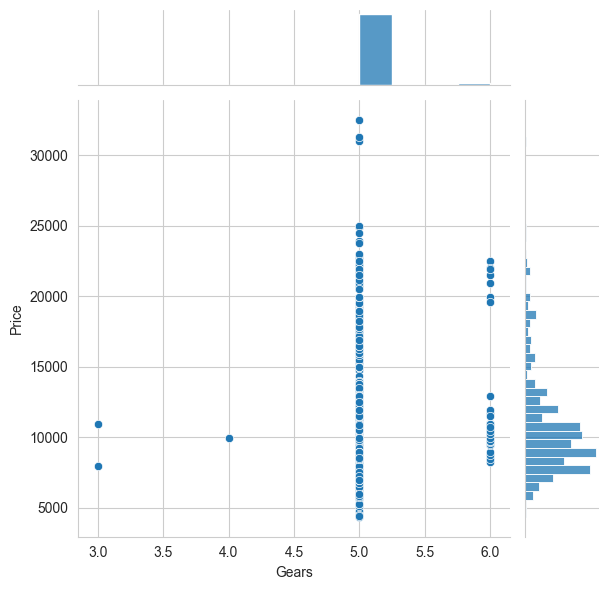

In [18]:
sns.jointplot(x = 'Gears', y = 'Price', data = dtcol_final)

Here a lot of enteries are for Gears = 5.0. But price are more for 5.0 as compared to 3.0 and 4.0. But then again, other features are also playing there roles here, so all of the cars of 6.0 gears are not more expensive than those of 5.0.

Now, before we build our model, let us take a look at how prices are distributed!

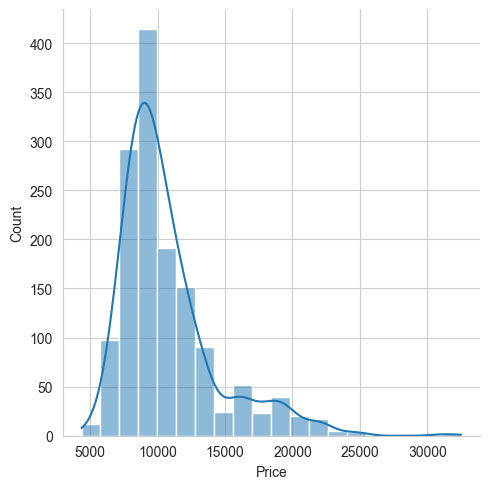

In [19]:
sns.displot(dtcol['Price'], bins = 20, kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2292a3dad10>,
 'caps': [<matplotlib.lines.Line2D at 0x2292a3ec4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2292a3da1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2292a3eda50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2292a3ee290>],
 'means': []}

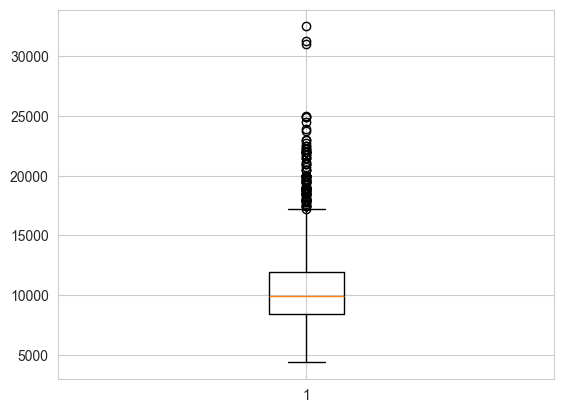

In [20]:
plt.boxplot(dtcol_final['Price'])

There are a lot of outliers in the data. But these could be really expensive cars, antique perhaps. While dealing with outliers, we have 3 options, modify them, drop them or keep them. Here, I chose to keep them as it is, cause there must always be a few cars which would be expensive. 

<Axes: >

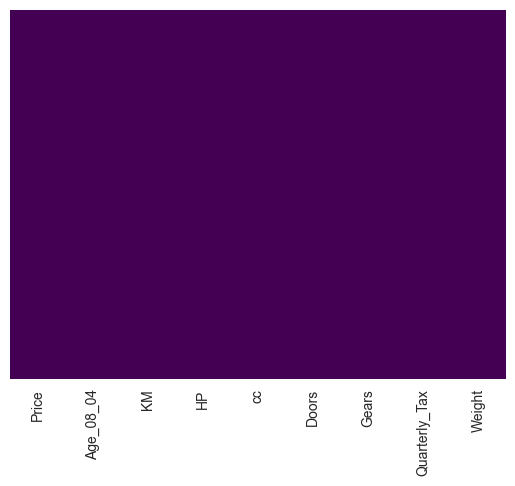

In [21]:
sns.heatmap(dtcol_final.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [22]:
dtcol_final.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

There is no missing value in the data. So we are ready to go!

In [23]:
import scipy.stats as stats

In [27]:
import pylab
def plot_data(data, feature):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist = 'norm', plot = pylab)

Text(0.5, 1.0, 'Weight')

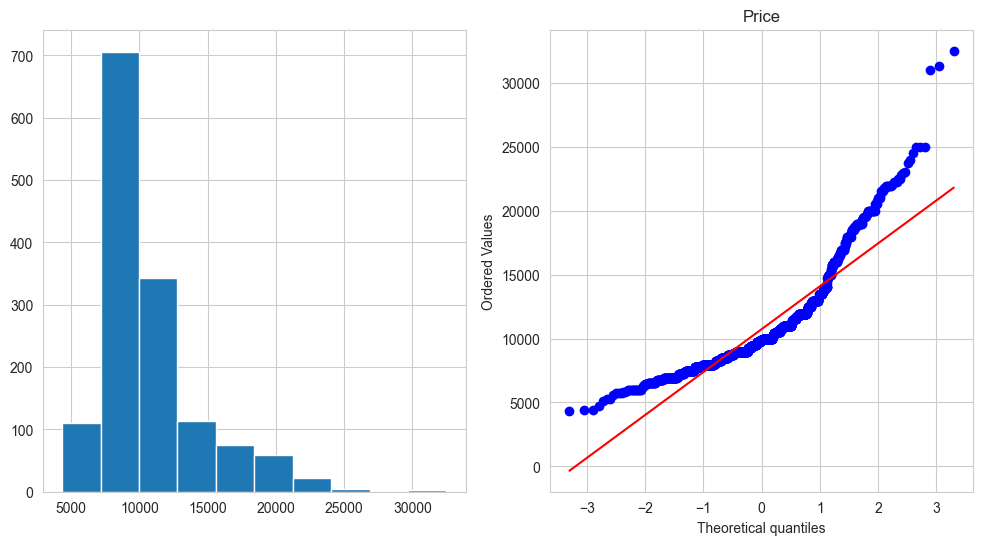

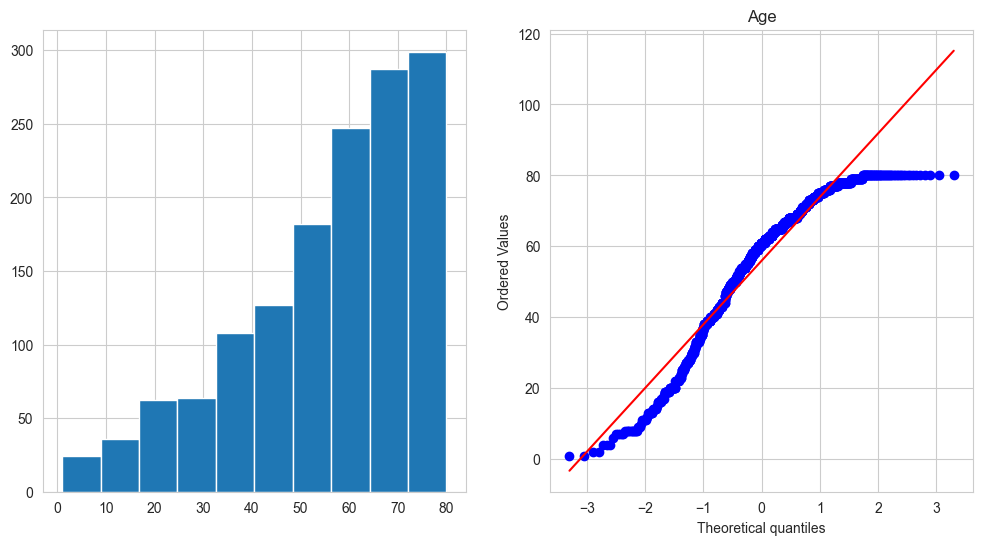

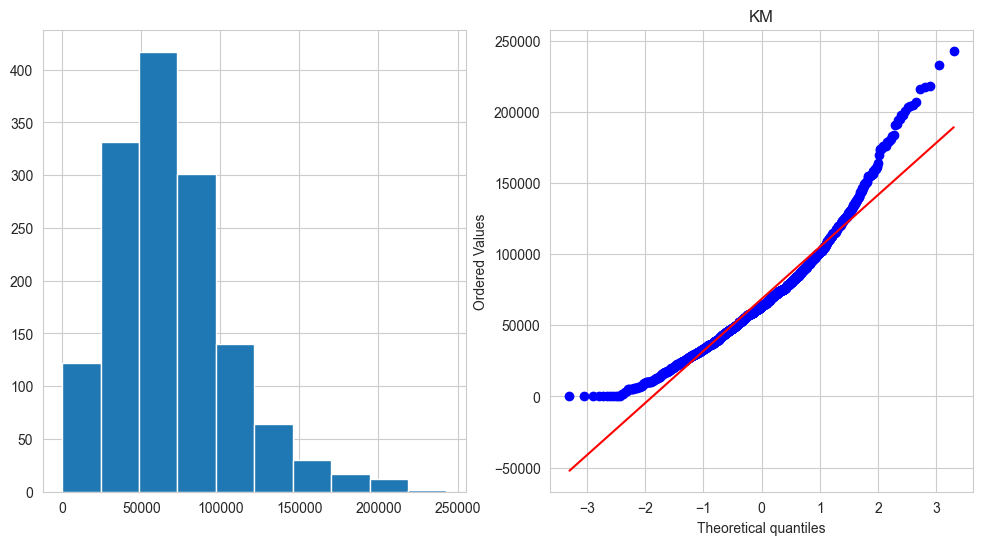

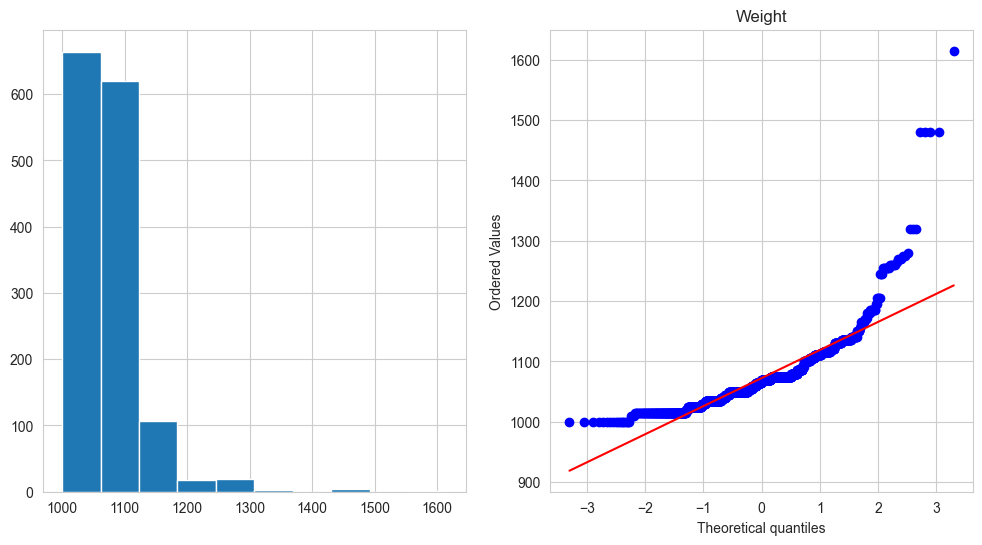

In [28]:
plot_data(dtcol_final,'Price')
plt.title('Price')
plot_data(dtcol_final,'Age_08_04')
plt.title('Age')
plot_data(dtcol_final, 'KM')
plt.title('KM')
plot_data(dtcol_final,'Weight')
plt.title('Weight')

# Log Transformation

In [32]:
dtcol_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [39]:
continuous_feature= dtcol_final.select_dtypes(include = ['int64','float64'])
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 1436


In [40]:
continuous_feature

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [43]:
continuous_col = continuous_feature.columns

In [44]:
df = dtcol_final.copy()

In [46]:
df[continuous_col] = np.log(df[continuous_col])

Text(0.5, 1.0, 'Weight')

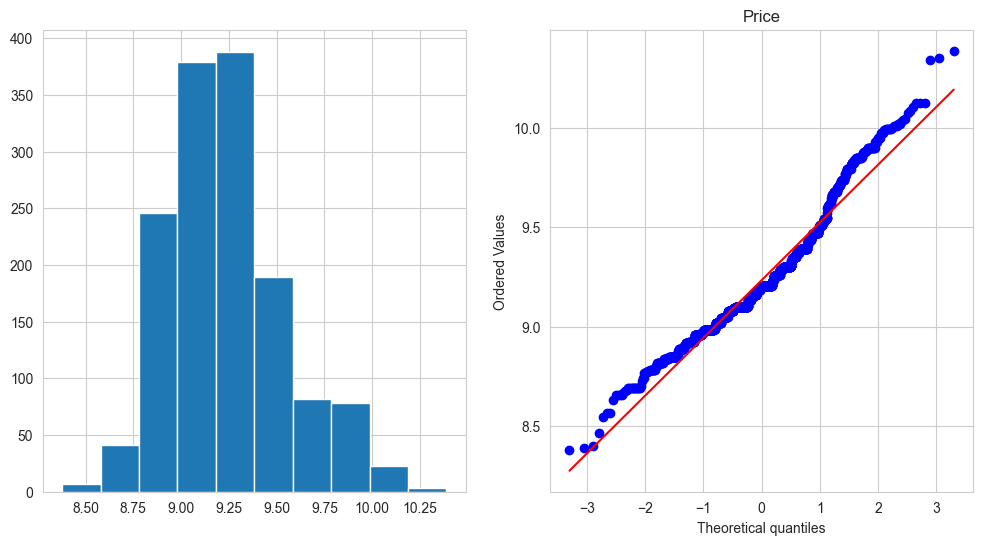

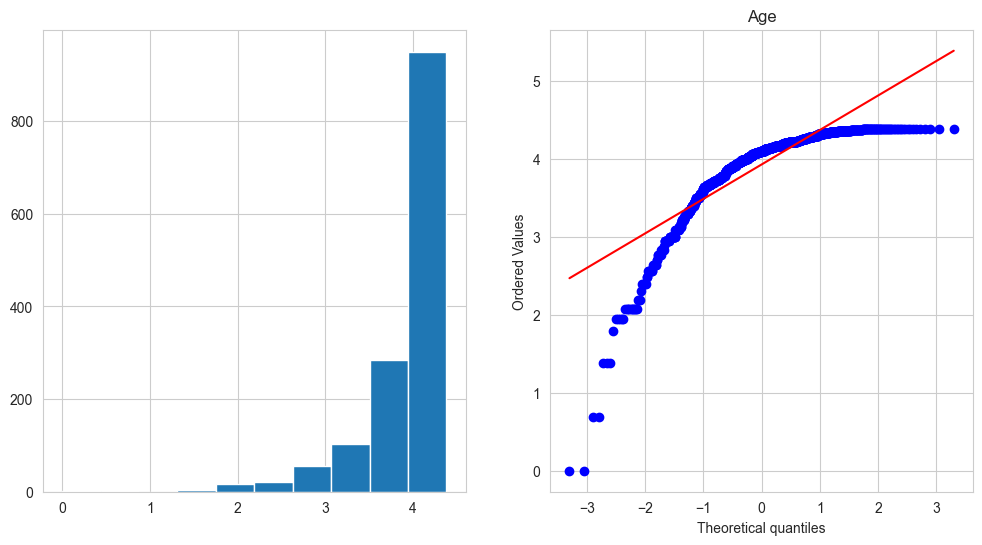

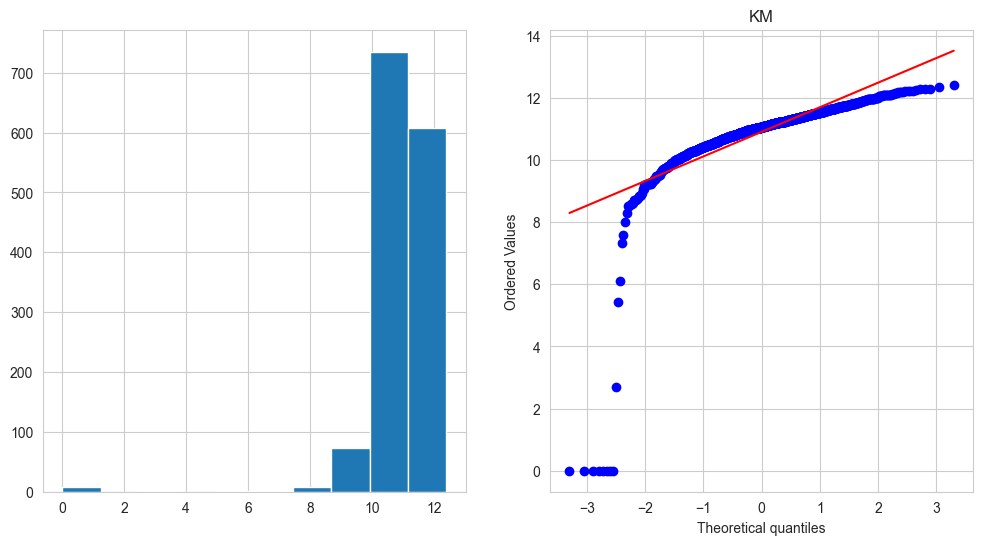

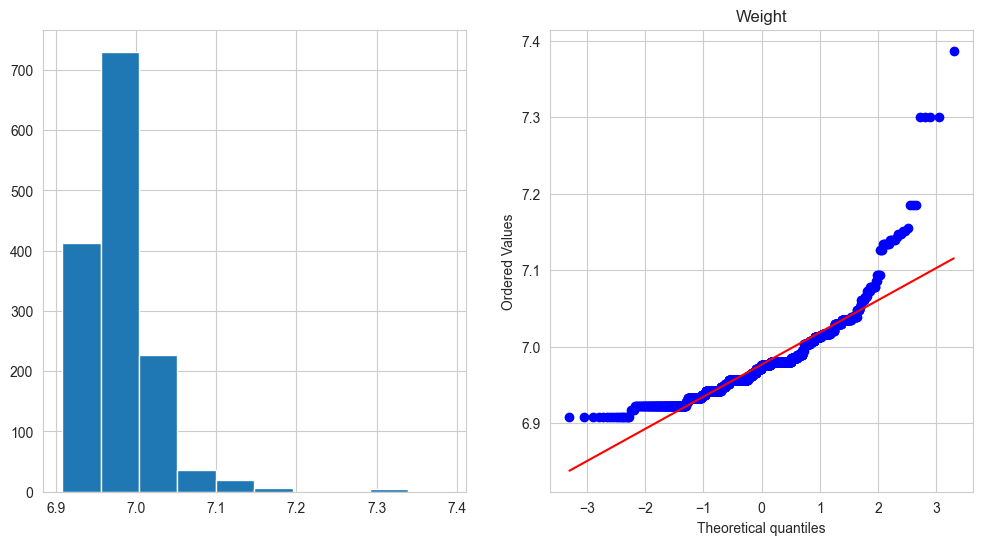

In [47]:
plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age_08_04')
plt.title('Age')
plot_data(df, 'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

# Square root Transformation

Text(0.5, 1.0, 'Weight')

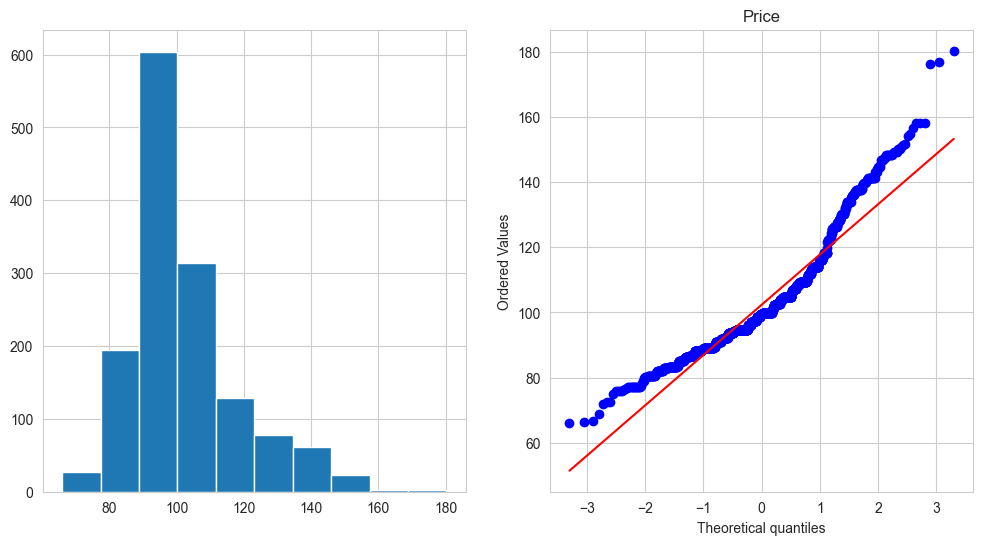

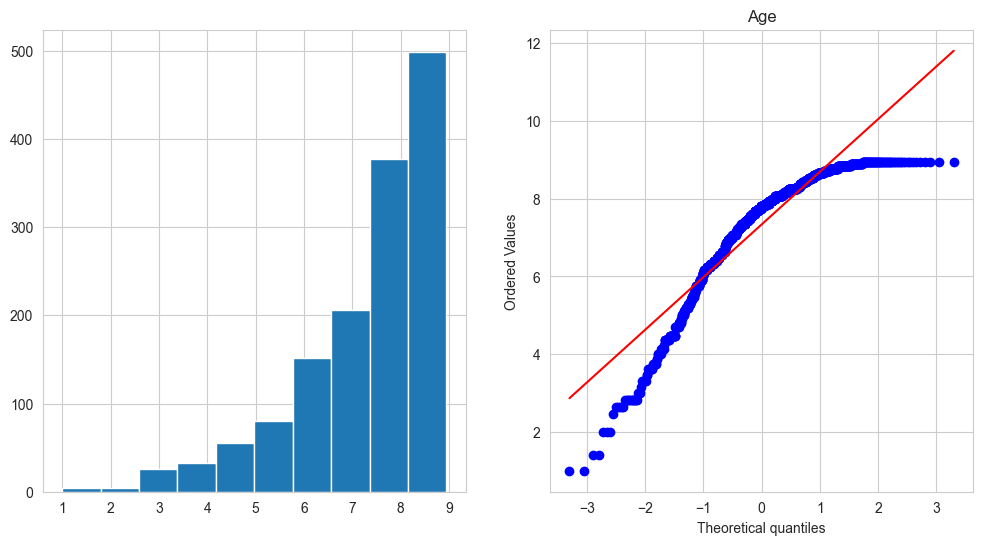

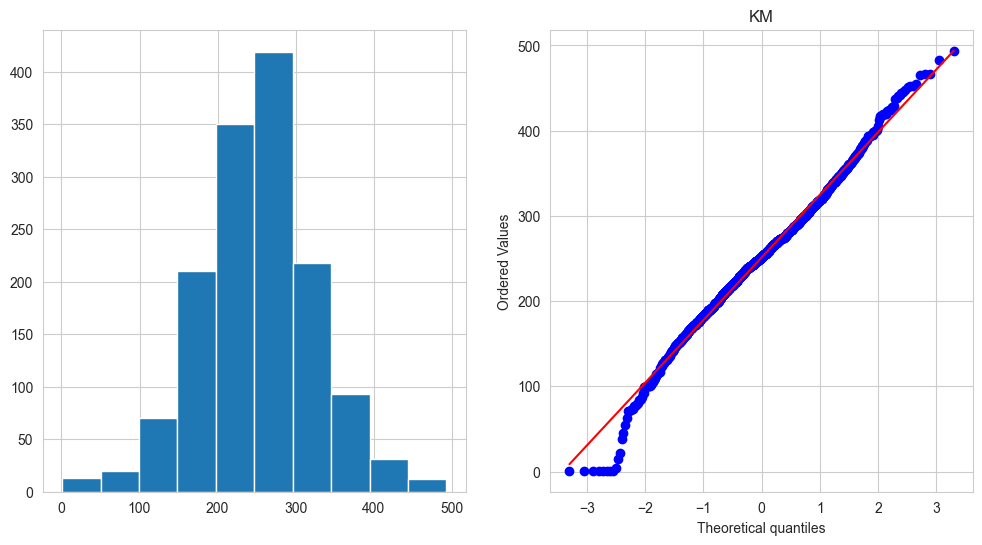

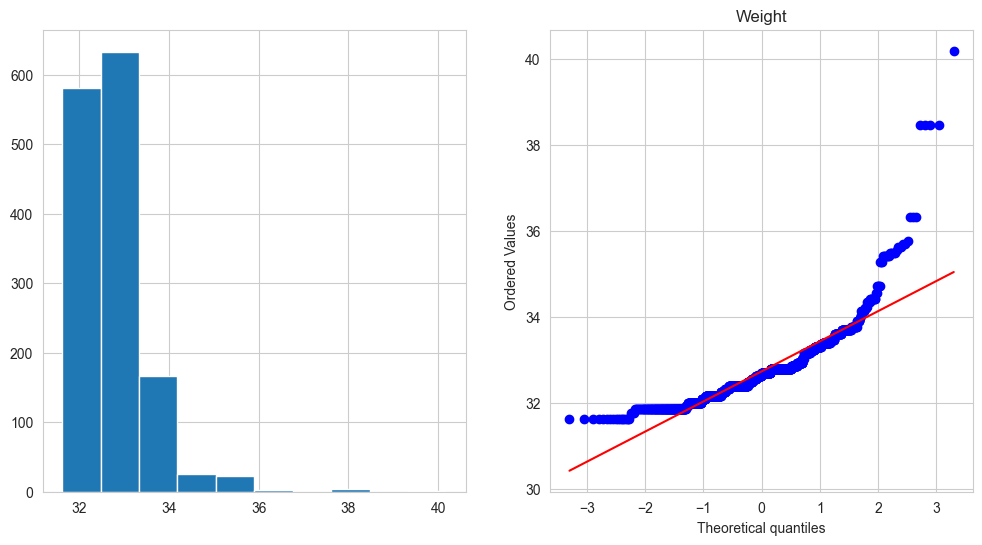

In [51]:
dfsq = dtcol_final.copy()
dfsq[continuous_col]= np.sqrt(dfsq[continuous_col])

plot_data(dfsq,'Price')
plt.title('Price')
plot_data(dfsq,'Age_08_04')
plt.title('Age')
plot_data(dfsq, 'KM')
plt.title('KM')
plot_data(dfsq,'Weight')
plt.title('Weight')

# Square Transformation

Text(0.5, 1.0, 'Weight')

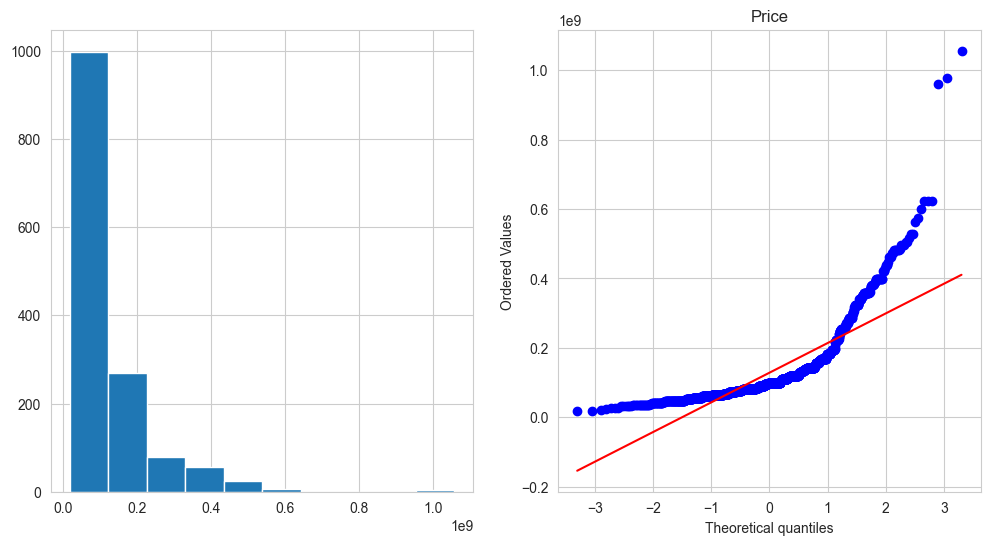

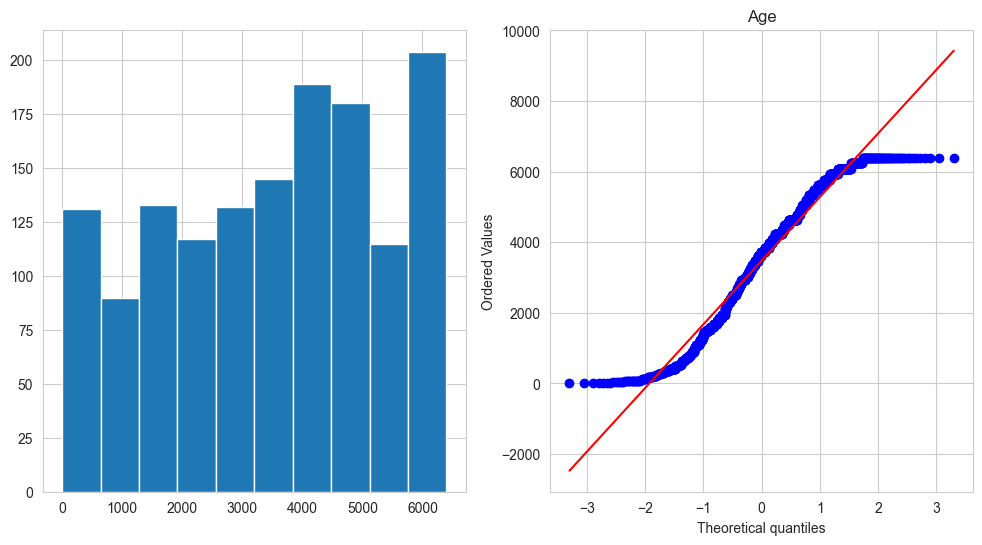

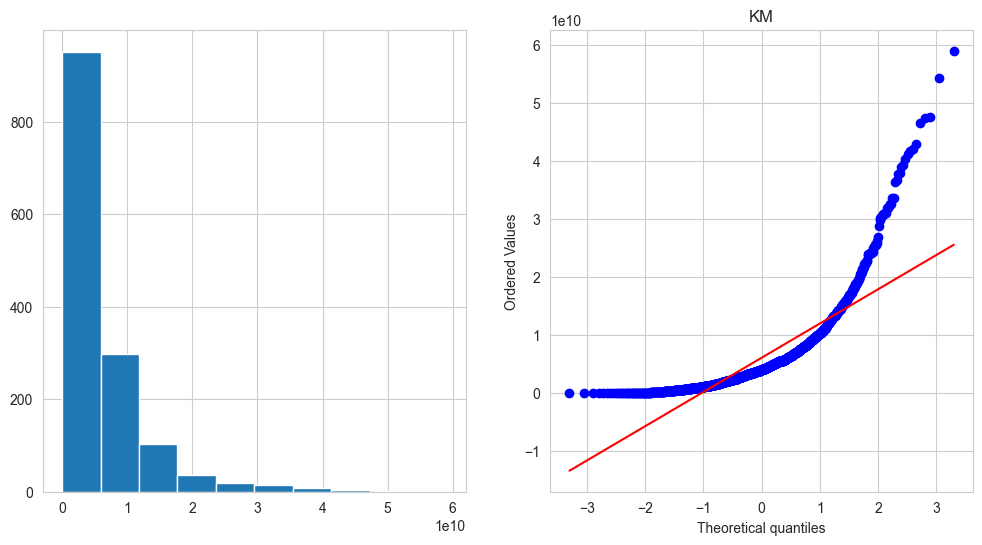

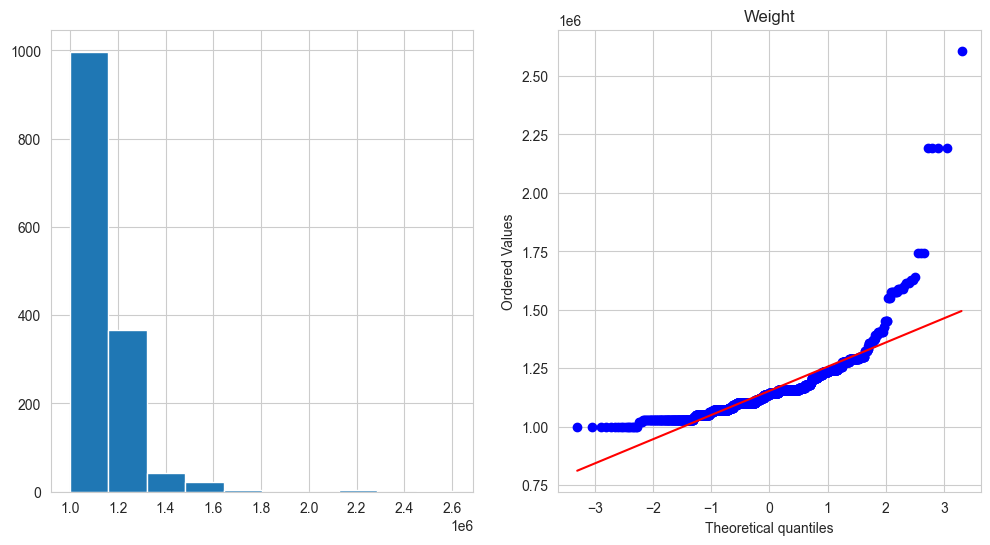

In [179]:
dfsqr = dtcol_final.copy()
dfsqr[continuous_col]= np.square(dfsqr[continuous_col])

plot_data(dfsqr,'Price')
plt.title('Price')
plot_data(dfsqr,'Age_08_04')
plt.title('Age')
plot_data(dfsqr, 'KM')
plt.title('KM')
plot_data(dfsqr,'Weight')
plt.title('Weight')

# Shapiro - Wilk test (test of normality)

In [53]:
from scipy.stats import shapiro

In [54]:
print('For orginial dataset:')

print('Price Feature', shapiro(dtcol_final.Price),'\n'
      'Age Feature', shapiro(dtcol_final.Age_08_04), '\n'
      'Weight Feature', shapiro(dtcol_final.Weight), '\n'
      'KM feature', shapiro(dtcol_final.KM))

For orginial dataset:
Price Feature ShapiroResult(statistic=0.8522822856903076, pvalue=1.2140943021843038e-34) 
Age Feature ShapiroResult(statistic=0.9264265894889832, pvalue=5.995697867087039e-26) 
Weight Feature ShapiroResult(statistic=0.7808094024658203, pvalue=3.764181947853967e-40) 
KM feature ShapiroResult(statistic=0.9476677775382996, pvalue=3.518705863584909e-22)


Because for all the above tests, the p-value is less than 0.05, therefore we reject the null hypothesis. And hence we conclude that none of the features are normally distributed.

In [56]:
print('For log transformational data:')

print('Price Feature', shapiro(df.Price),'\n'
      'Age Feature', shapiro(df.Age_08_04), '\n'
      'Weight Feature', shapiro(df.Weight), '\n'
      'KM feature', shapiro(df.KM))

For log transformational data:
Price Feature ShapiroResult(statistic=0.9597470164299011, pvalue=1.7165385822940765e-19) 
Age Feature ShapiroResult(statistic=0.7461504936218262, pvalue=2.619026829823083e-42) 
Weight Feature ShapiroResult(statistic=0.8302502632141113, pvalue=1.55639534423661e-36) 
KM feature ShapiroResult(statistic=0.5462852716445923, pvalue=0.0)


In [58]:
print('For sqrt transformation:')

print('Price Feature', shapiro(dfsq.Price),'\n'
      'Age Feature', shapiro(dfsq.Age_08_04), '\n'
      'Weight Feature', shapiro(dfsq.Weight), '\n'
      'KM feature', shapiro(dfsq.KM))

For sqrt transformation:
Price Feature ShapiroResult(statistic=0.914492666721344, pvalue=1.034548514145586e-27) 
Age Feature ShapiroResult(statistic=0.8695192933082581, pvalue=5.352348305556382e-33) 
Weight Feature ShapiroResult(statistic=0.8067586421966553, pvalue=2.402073877940615e-38) 
KM feature ShapiroResult(statistic=0.9917749762535095, pvalue=3.446411938057281e-07)


In [180]:
print('For square transformation:')

print('Price Feature', shapiro(dfsqr.Price),'\n'
      'Age Feature', shapiro(dfsqr.Age_08_04), '\n'
      'Weight Feature', shapiro(dfsqr.Weight), '\n'
      'KM feature', shapiro(dfsqr.KM))

For square transformation:
Price Feature ShapiroResult(statistic=0.6938076019287109, pvalue=4.203895392974451e-45) 
Age Feature ShapiroResult(statistic=0.9591162204742432, pvalue=1.2038427328518187e-19) 
Weight Feature ShapiroResult(statistic=0.7213428616523743, pvalue=1.0369608636003646e-43) 
KM feature ShapiroResult(statistic=0.7189551591873169, pvalue=7.707141553786494e-44)


# Checking for Outlier 

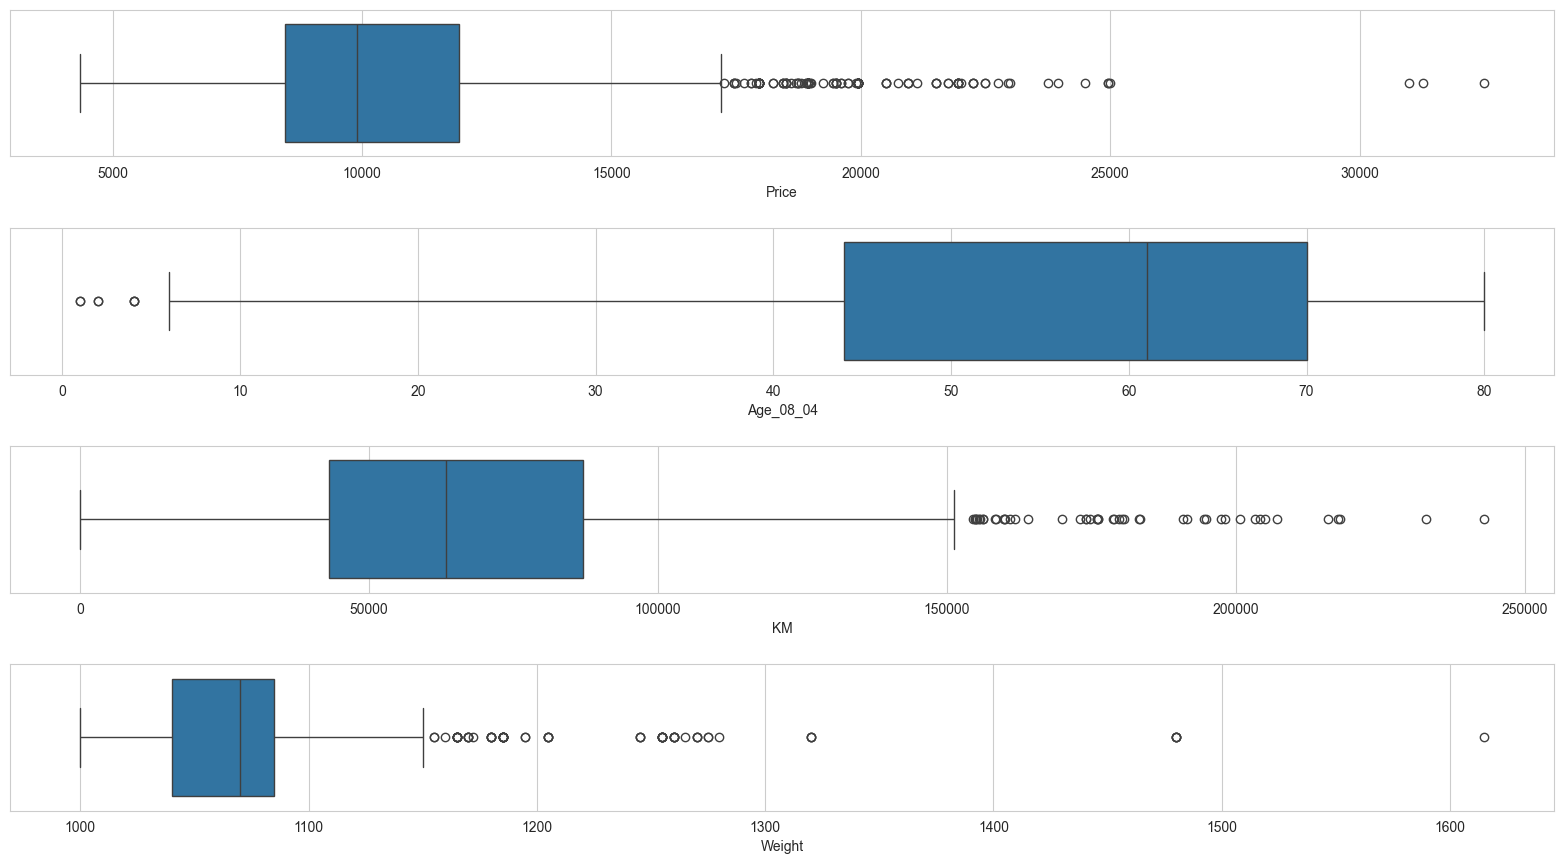

In [62]:
fig, axes = plt.subplots(4,1,figsize =(16,9), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = dtcol_final, ax = axes[0])
sns.boxplot(x = 'Age_08_04', data = dtcol_final, ax = axes[1])
sns.boxplot(x = 'KM', data = dtcol_final, ax = axes[2])
sns.boxplot(x = 'Weight', data = dtcol_final, ax = axes[3])
plt.tight_layout(pad = 2.0)

There are lots of outliers in the dataset. If we delete, that would mean loss of data. So, we can try different type of transformation and imputation technique and then pick the best out of them.

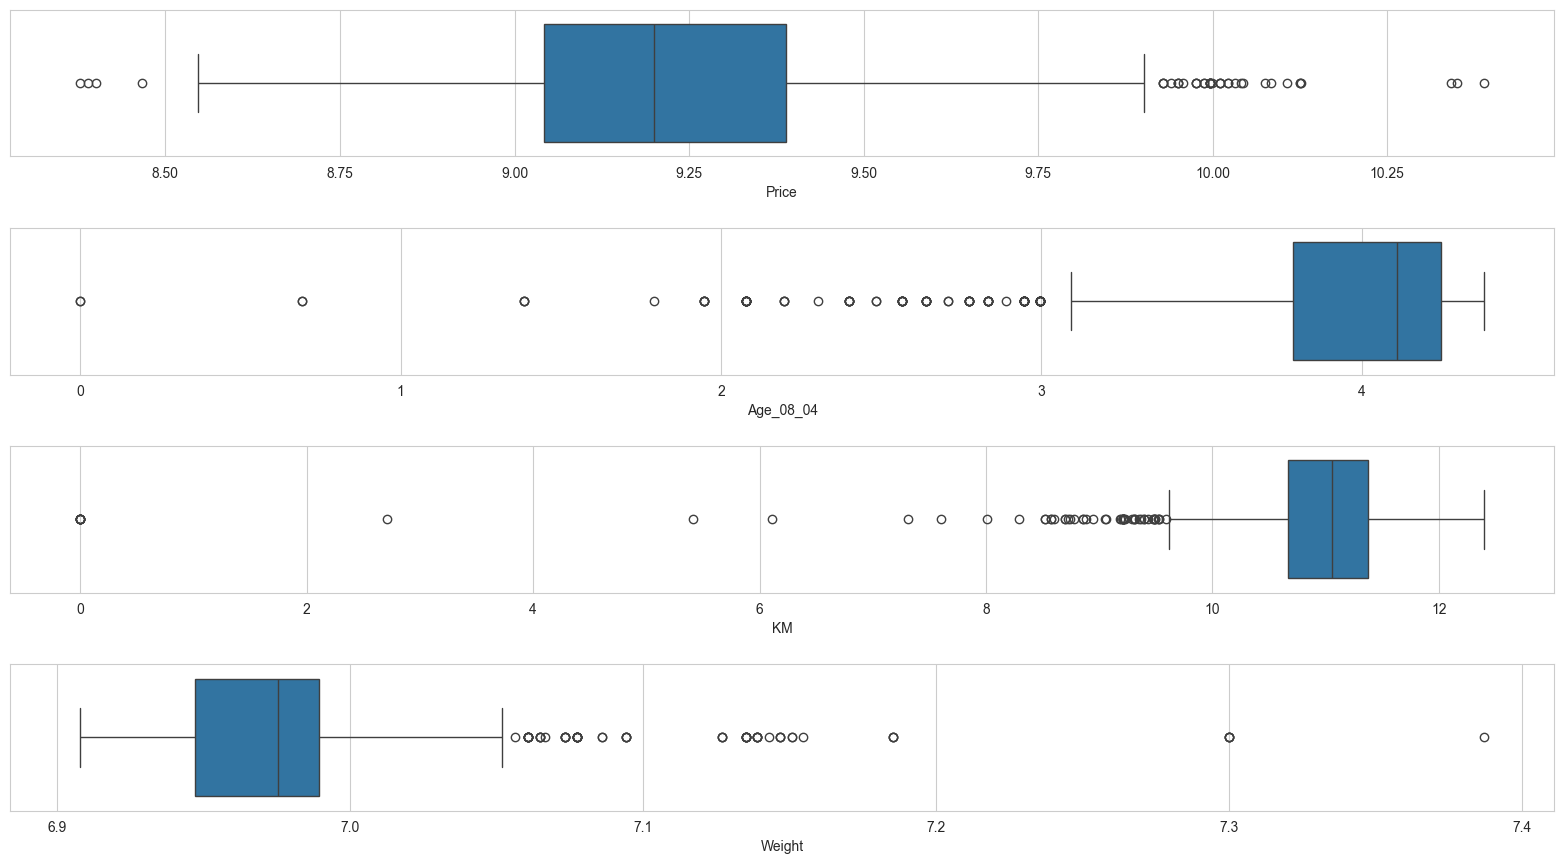

In [67]:
#for log transformation
fig, axes = plt.subplots(4,1,figsize =(16,9), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = df, ax = axes[0])
sns.boxplot(x = 'Age_08_04', data = df, ax = axes[1])
sns.boxplot(x = 'KM', data = df, ax = axes[2])
sns.boxplot(x = 'Weight', data = df, ax = axes[3])
plt.tight_layout(pad = 2.0)

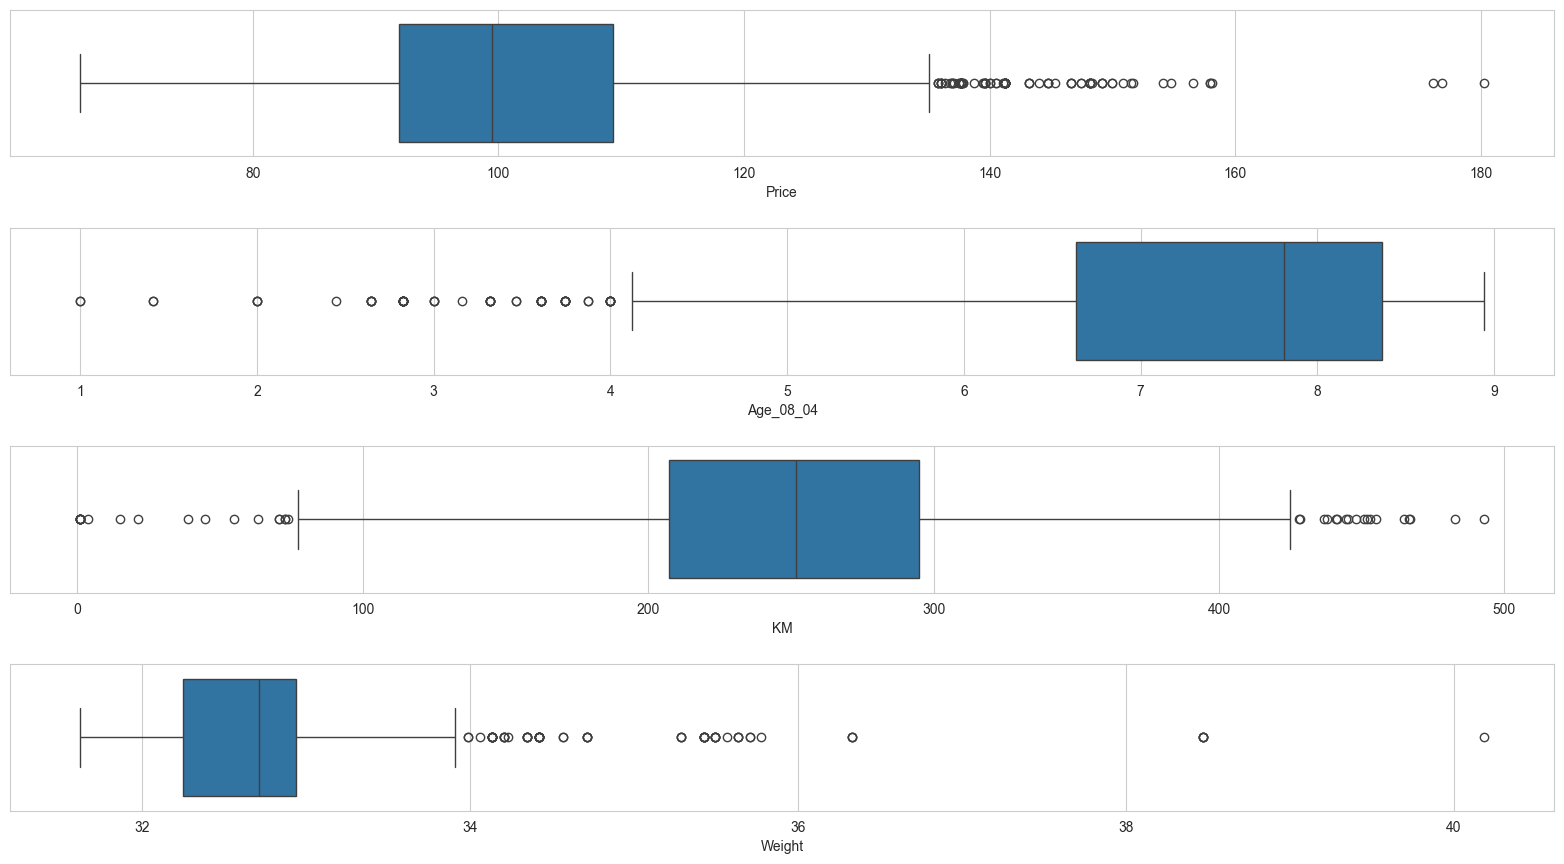

In [68]:
# for square root transformation
fig, axes = plt.subplots(4,1,figsize =(16,9), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = dfsq, ax = axes[0])
sns.boxplot(x = 'Age_08_04', data = dfsq, ax = axes[1])
sns.boxplot(x = 'KM', data = dfsq, ax = axes[2])
sns.boxplot(x = 'Weight', data = dfsq, ax = axes[3])
plt.tight_layout(pad = 2.0)

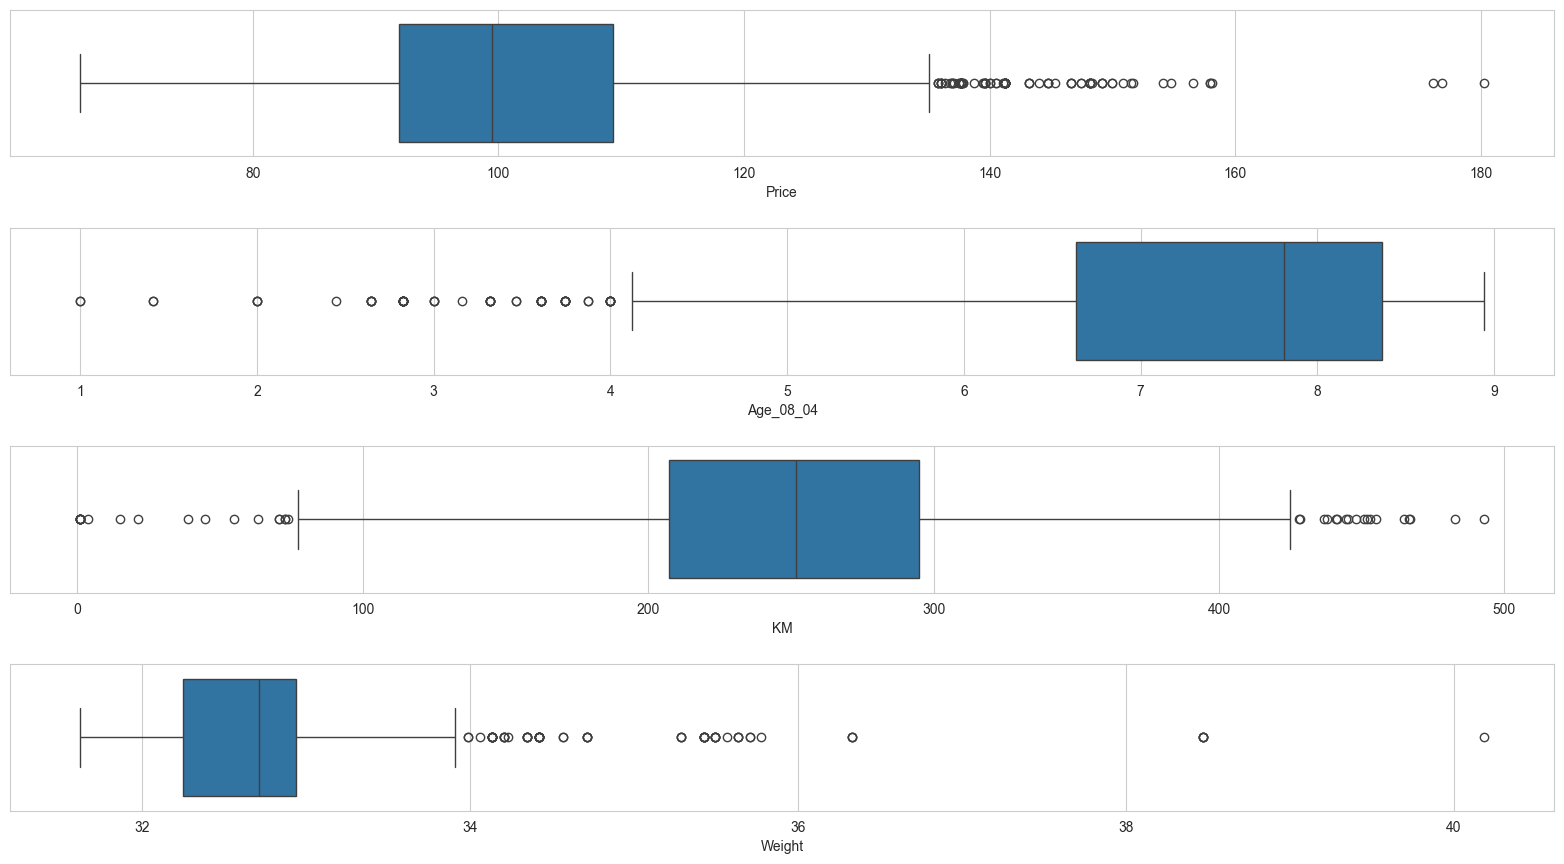

In [69]:
# for square transformation
fig, axes = plt.subplots(4,1,figsize =(16,9), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = dfsqr, ax = axes[0])
sns.boxplot(x = 'Age_08_04', data = dfsqr, ax = axes[1])
sns.boxplot(x = 'KM', data = dfsqr, ax = axes[2])
sns.boxplot(x = 'Weight', data = dfsqr, ax = axes[3])
plt.tight_layout(pad = 2.0)

# Now we'll create our model

Before that we would set a variable X equal to the sorting time and y equal to the delivery time. 
So, we'd have y = f(X) type of formation.

In [70]:
X = dtcol_final[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']] #have to use double sq brackets
y = dtcol_final['Price']

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [72]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1436 entries, 0 to 1435
Series name: Price
Non-Null Count  Dtype
--------------  -----
1436 non-null   int64
dtypes: int64(1)
memory usage: 11.3 KB


# Training and Testing data
Now, we'll take our data and split it into two set, training and testing data.

We would use model_selection.train_test_split from sklearn to split the data into training and testing data. By default training set would have 75% data. 

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

# Training the Model
Now it is time to train our model on our training data!
So, we'd import LinearRegression from sklearn.linear_model

In [74]:
from sklearn.linear_model import LinearRegression

Now, we would create a LinearRegression model named lm

In [75]:
raw_data_model = LinearRegression()

In [76]:
raw_data_model.fit(X_train, y_train)

LinearRegression()

In [78]:
print('Coefficient: \n', raw_data_model.coef_)

Coefficient: 
 [-1.21856810e+02 -1.99894074e-02  3.41910302e+01 -5.93844326e-02
  2.87863987e+01  7.51046418e+02  6.15214873e+00  1.44303230e+01]


# Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [79]:
predictions = raw_data_model.predict(X_test)

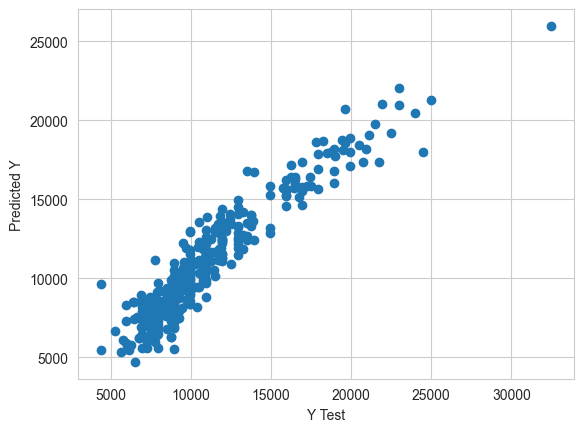

In [80]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Evaluation of the model

In [81]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1015.0736987406683
MSE: 1841518.844236166
RMSE: 1357.0257345519155


# Residuals

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6544\3589420489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins = 40)


<Axes: xlabel='Price', ylabel='Density'>

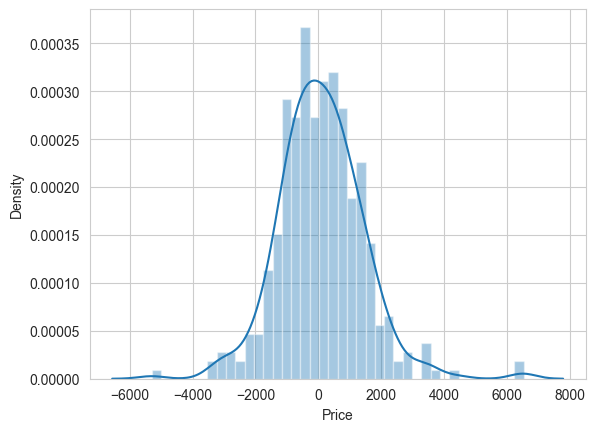

In [82]:
sns.distplot((y_test-predictions), bins = 40)

# Conclusion

In [84]:
coeffecients = pd.DataFrame(raw_data_model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Age_08_04      -121.856810
KM               -0.019989
HP               34.191030
cc               -0.059384
Doors            28.786399
Gears           751.046418
Quarterly_Tax     6.152149
Weight           14.430323

We can come upon following conclusion based on the data derived:
- For 1 year increase in age, there is a decrease of approximately 121.85 units in price.
- For 1 unit increase in KM, there is a decrease of approximately 0.019 units in price.
- For 1 unit increase in HP, there is a increase of approximately 34 units in price.
- For 1 unit increase in cc, there is a decrease of approximately 0.059 units in price.
- For 1 unit increase in door, there is a increase of approximately 28.78 units in price.
- For 1 unit increase in gears, there is a increase of approximately 751.046 units in price.
- For 1 unit increase in Quaterly_Tax, there is a increase in approximately 6.152 units in price.
- For 1 unit increase in weight, there is a increase of approximately 14.43 units in price.

In [85]:
raw_data_model.score(X_test, y_test)  

0.8864279548503153

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.8864279548503153

Also, the model is 88% accurate

# Log transformational model

In [87]:
continuous_col

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [106]:
df.reset_index(drop = True, inplace = True)

In [112]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [107]:
X = df.drop('Price', axis = 1)
y = df.Price

In [108]:
print(X.shape)
print(y.shape)

(1436, 8)
(1436,)


In [128]:
X.head()

Age_08_04         KM       HP        cc     Doors     Gears  Quarterly_Tax  \
0   3.135494  10.757605  4.49981  7.600902  1.098612  1.609438       5.347108   
1   3.135494  11.197351  4.49981  7.600902  1.098612  1.609438       5.347108   
2   3.178054  10.638520  4.49981  7.600902  1.098612  1.609438       5.347108   
3   3.258097  10.778956  4.49981  7.600902  1.098612  1.609438       5.347108   
4   3.401197  10.558414  4.49981  7.600902  1.098612  1.609438       5.347108   

     Weight  
0  7.060476  
1  7.060476  
2  7.060476  
3  7.060476  
4  7.064759

In [129]:
y.head()

Price
0  9.510445
1  9.528794
2  9.543235
3  9.612467
4  9.528794

In [113]:
print(X.dtypes)
print(y.dtypes)

Age_08_04        float64
KM               float64
HP               float64
cc               float64
Doors            float64
Gears            float64
Quarterly_Tax    float64
Weight           float64
dtype: object
float64


In [121]:
X.value_counts().sum()

1436

In [122]:
y = pd.DataFrame(y)

In [123]:
y.value_counts().sum()

1436

In [132]:
X_tarin, X_test, y_train, y_test = train_test_split(X, y, random_state = 10001)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 8)
(359, 8)
(1077, 1)
(359, 1)


In [135]:
log_model = LinearRegression()

In [136]:
log_model.fit(X_train, y_train)

LinearRegression()

In [138]:
pred_log = log_model.predict(X_test)

In [139]:
pred_log

array([[9.51165974],
       [9.50971385],
       [9.51208843],
       [9.51614069],
       [9.51964262],
       [9.51884391],
       [9.51100466],
       [9.50819302],
       [9.51896795],
       [9.51102065],
       [9.51131991],
       [9.51172664],
       [9.51167027],
       [9.51151634],
       [9.5108045 ],
       [9.50188066],
       [9.51989936],
       [9.5192651 ],
       [9.51845799],
       [9.51176658],
       [9.51848763],
       [9.51169241],
       [9.51032532],
       [9.51956777],
       [9.51926478],
       [9.51035818],
       [9.51544647],
       [9.51179035],
       [9.5114291 ],
       [9.51909966],
       [9.51207364],
       [9.51589163],
       [9.51184267],
       [9.5158577 ],
       [9.51174732],
       [9.51570848],
       [9.51902694],
       [9.51857362],
       [9.51864234],
       [9.51146355],
       [9.51924935],
       [9.51064034],
       [9.51842881],
       [9.51927551],
       [9.511283  ],
       [9.50050295],
       [9.51911718],
       [9.518

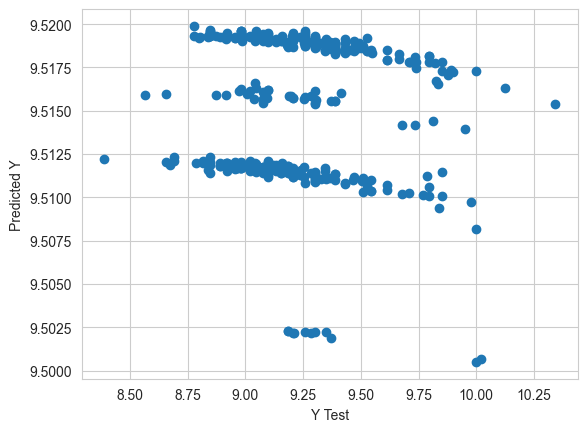

In [140]:
plt.scatter(y_test, pred_log)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [141]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_log))
print('MSE:', metrics.mean_squared_error(y_test, pred_log))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_log)))

MAE: 0.3481004596041711
MSE: 0.16055895251915536
RMSE: 0.40069808150171543


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6544\2932570971.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred_log), bins = 40)


<Axes: ylabel='Density'>

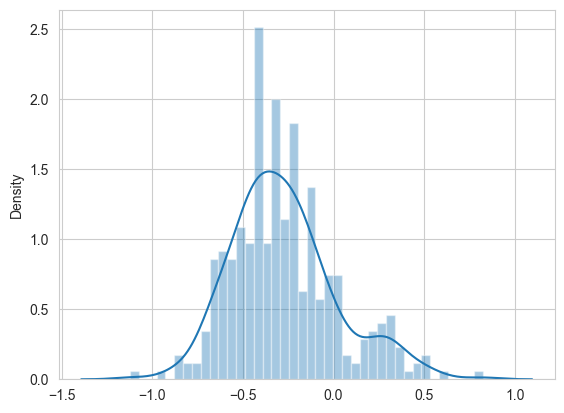

In [142]:
sns.distplot((y_test-pred_log), bins = 40)

In [144]:
log_model.score(X_test, y_test)

-0.8963279269517139

In [146]:
r2_score(y_test, pred_log)

-0.8963279269517139

# Square Root transformational model

In [155]:
dtcol_final.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [147]:
dfsq.head()

Price  Age_08_04          KM        HP        cc     Doors     Gears  \
0  116.189500   4.795832  216.762543  9.486833  44.72136  1.732051  2.236068   
1  117.260394   4.795832  270.068510  9.486833  44.72136  1.732051  2.236068   
2  118.110118   4.898979  204.232710  9.486833  44.72136  1.732051  2.236068   
3  122.270193   5.099020  219.089023  9.486833  44.72136  1.732051  2.236068   
4  117.260394   5.477226  196.214169  9.486833  44.72136  1.732051  2.236068   

   Quarterly_Tax     Weight  
0      14.491377  34.132096  
1      14.491377  34.132096  
2      14.491377  34.132096  
3      14.491377  34.132096  
4      14.491377  34.205263

In [148]:
X = dfsq.drop('Price', axis = 1)
y = dfsq.Price

In [152]:
X.value_counts().sum()

1436

In [153]:
y.value_counts().sum()

1436

In [154]:
X.head()

Age_08_04          KM        HP        cc     Doors     Gears  \
0   4.795832  216.762543  9.486833  44.72136  1.732051  2.236068   
1   4.795832  270.068510  9.486833  44.72136  1.732051  2.236068   
2   4.898979  204.232710  9.486833  44.72136  1.732051  2.236068   
3   5.099020  219.089023  9.486833  44.72136  1.732051  2.236068   
4   5.477226  196.214169  9.486833  44.72136  1.732051  2.236068   

   Quarterly_Tax     Weight  
0      14.491377  34.132096  
1      14.491377  34.132096  
2      14.491377  34.132096  
3      14.491377  34.132096  
4      14.491377  34.205263

In [156]:
y.head()

0    116.189500
1    117.260394
2    118.110118
3    122.270193
4    117.260394
Name: Price, dtype: float64

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1001)

In [164]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 8)
(359, 8)
(1077,)
(359,)


In [165]:
sqrt_model = LinearRegression()

In [166]:
sqrt_model.fit(X_train, y_train)

LinearRegression()

In [167]:
pred_sqrt = sqrt_model.predict(X_test)

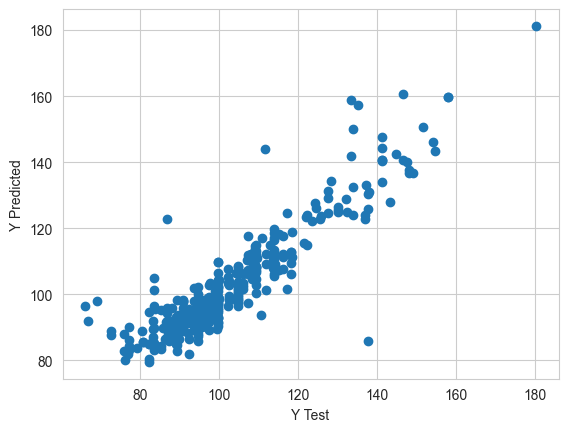

In [168]:
plt.scatter(y_test, pred_sqrt)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

In [169]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_sqrt))
print('MSE:', metrics.mean_squared_error(y_test, pred_sqrt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_sqrt)))

MAE: 4.953183862639144
MSE: 55.01177388798853
RMSE: 7.416992239984381


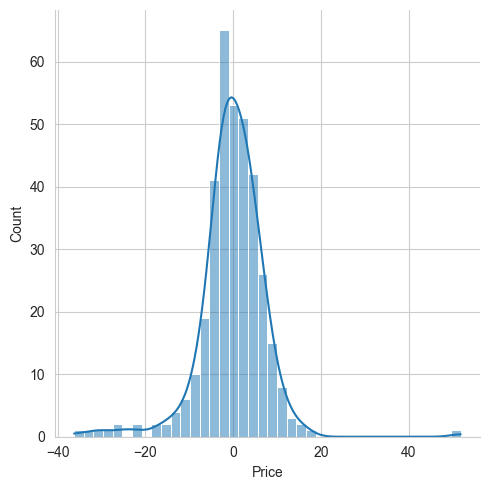

In [171]:
sns.displot((y_test - pred_sqrt), bins = 40, kde = True)

In [172]:
sqrt_model.score(X_test, y_test)

0.8229171522440745

In [173]:
r2_score(y_test, pred_sqrt)

0.8229171522440745

# Sqaure transformational model

In [174]:
dtcol_final.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [181]:
dfsqr.head()

Price  Age_08_04          KM    HP       cc  Doors  Gears  \
0  182250000        529  2207684196  8100  4000000      9     25   
1  189062500        529  5319805969  8100  4000000      9     25   
2  194602500        576  1739807521  8100  4000000      9     25   
3  223502500        676  2304000000  8100  4000000      9     25   
4  189062500        900  1482250000  8100  4000000      9     25   

   Quarterly_Tax   Weight  
0          44100  1357225  
1          44100  1357225  
2          44100  1357225  
3          44100  1357225  
4          44100  1368900

In [182]:
X = dfsqr.drop('Price', axis = 1)
y = dfsq.Price

In [183]:
X.head()

Age_08_04          KM    HP       cc  Doors  Gears  Quarterly_Tax   Weight
0        529  2207684196  8100  4000000      9     25          44100  1357225
1        529  5319805969  8100  4000000      9     25          44100  1357225
2        576  1739807521  8100  4000000      9     25          44100  1357225
3        676  2304000000  8100  4000000      9     25          44100  1357225
4        900  1482250000  8100  4000000      9     25          44100  1368900

In [184]:
y.head()

0    116.189500
1    117.260394
2    118.110118
3    122.270193
4    117.260394
Name: Price, dtype: float64

In [187]:
X.value_counts().sum()

1436

In [188]:
y.value_counts().sum()

1436

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10001)

In [190]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 8)
(359, 8)
(1077,)
(359,)


In [191]:
square_model = LinearRegression()

In [192]:
square_model.fit(X_train, y_train)

LinearRegression()

In [199]:
pred_square = square_model.predict(X_test)

In [201]:
pred_square

array([ 88.83453839, 144.78356938,  79.00381828,  92.87022252,
        81.2407673 , 108.11004178, 112.45562373, 144.21863299,
       104.19339555, 111.50217977, 105.50392033,  93.45386076,
       106.74096753,  99.22877225, 115.07621413, 109.07284225,
        75.62779068,  90.0863664 , 116.32443612,  96.0812682 ,
       113.40226596,  89.75742367, 127.84775706,  98.72936255,
        84.13507178, 121.83886331, 107.35644771,  94.39013497,
        80.32707646,  98.33336586,  81.29612945,  93.57514141,
        94.09723512,  96.67451007,  95.84730285,  97.89515533,
        99.53412276, 117.34230879, 114.01706338, 101.68582016,
        86.88580005, 126.83276054, 174.7270025 , 100.68262932,
       105.07842363, 145.89615447,  96.99290796, 112.55784041,
        94.66763623, 103.11581967, 125.22834536,  85.64816835,
        87.7078644 , 104.99357079,  90.09144481, 104.37719333,
        82.07710633,  84.28789832,  92.34465876, 113.10299236,
        87.52969012,  92.07074303, 100.55490584, 100.37

In [202]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_square))
print('MSE:', metrics.mean_squared_error(y_test, pred_square))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_square)))

MAE: 5.055310533421128
MSE: 52.766041286485674
RMSE: 7.264023766927369


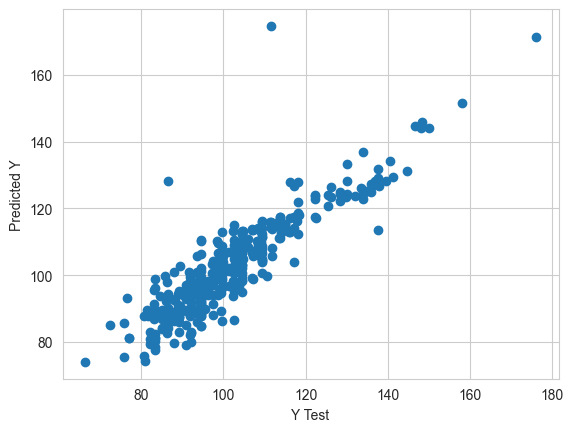

In [204]:
plt.scatter(y_test, pred_square)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

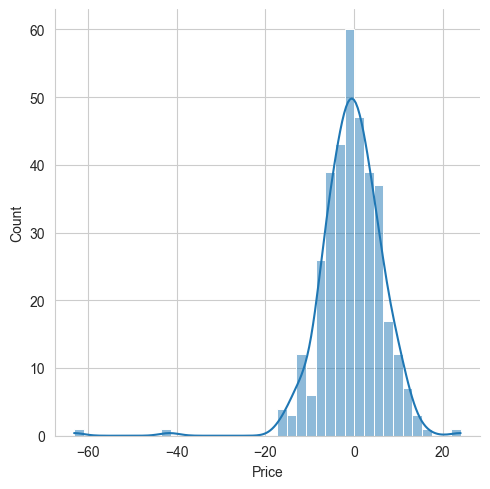

In [205]:
sns.displot((y_test- pred_square), bins = 40, kde = True)

In [206]:
square_model.score(X_test, y_test)

0.7874141277319927

In [208]:
r2_score(y_test, pred_square)

0.7874141277319927

# Median Imputation to handle outlier

In [245]:
dtcol_final.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [261]:
dtcol_final.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

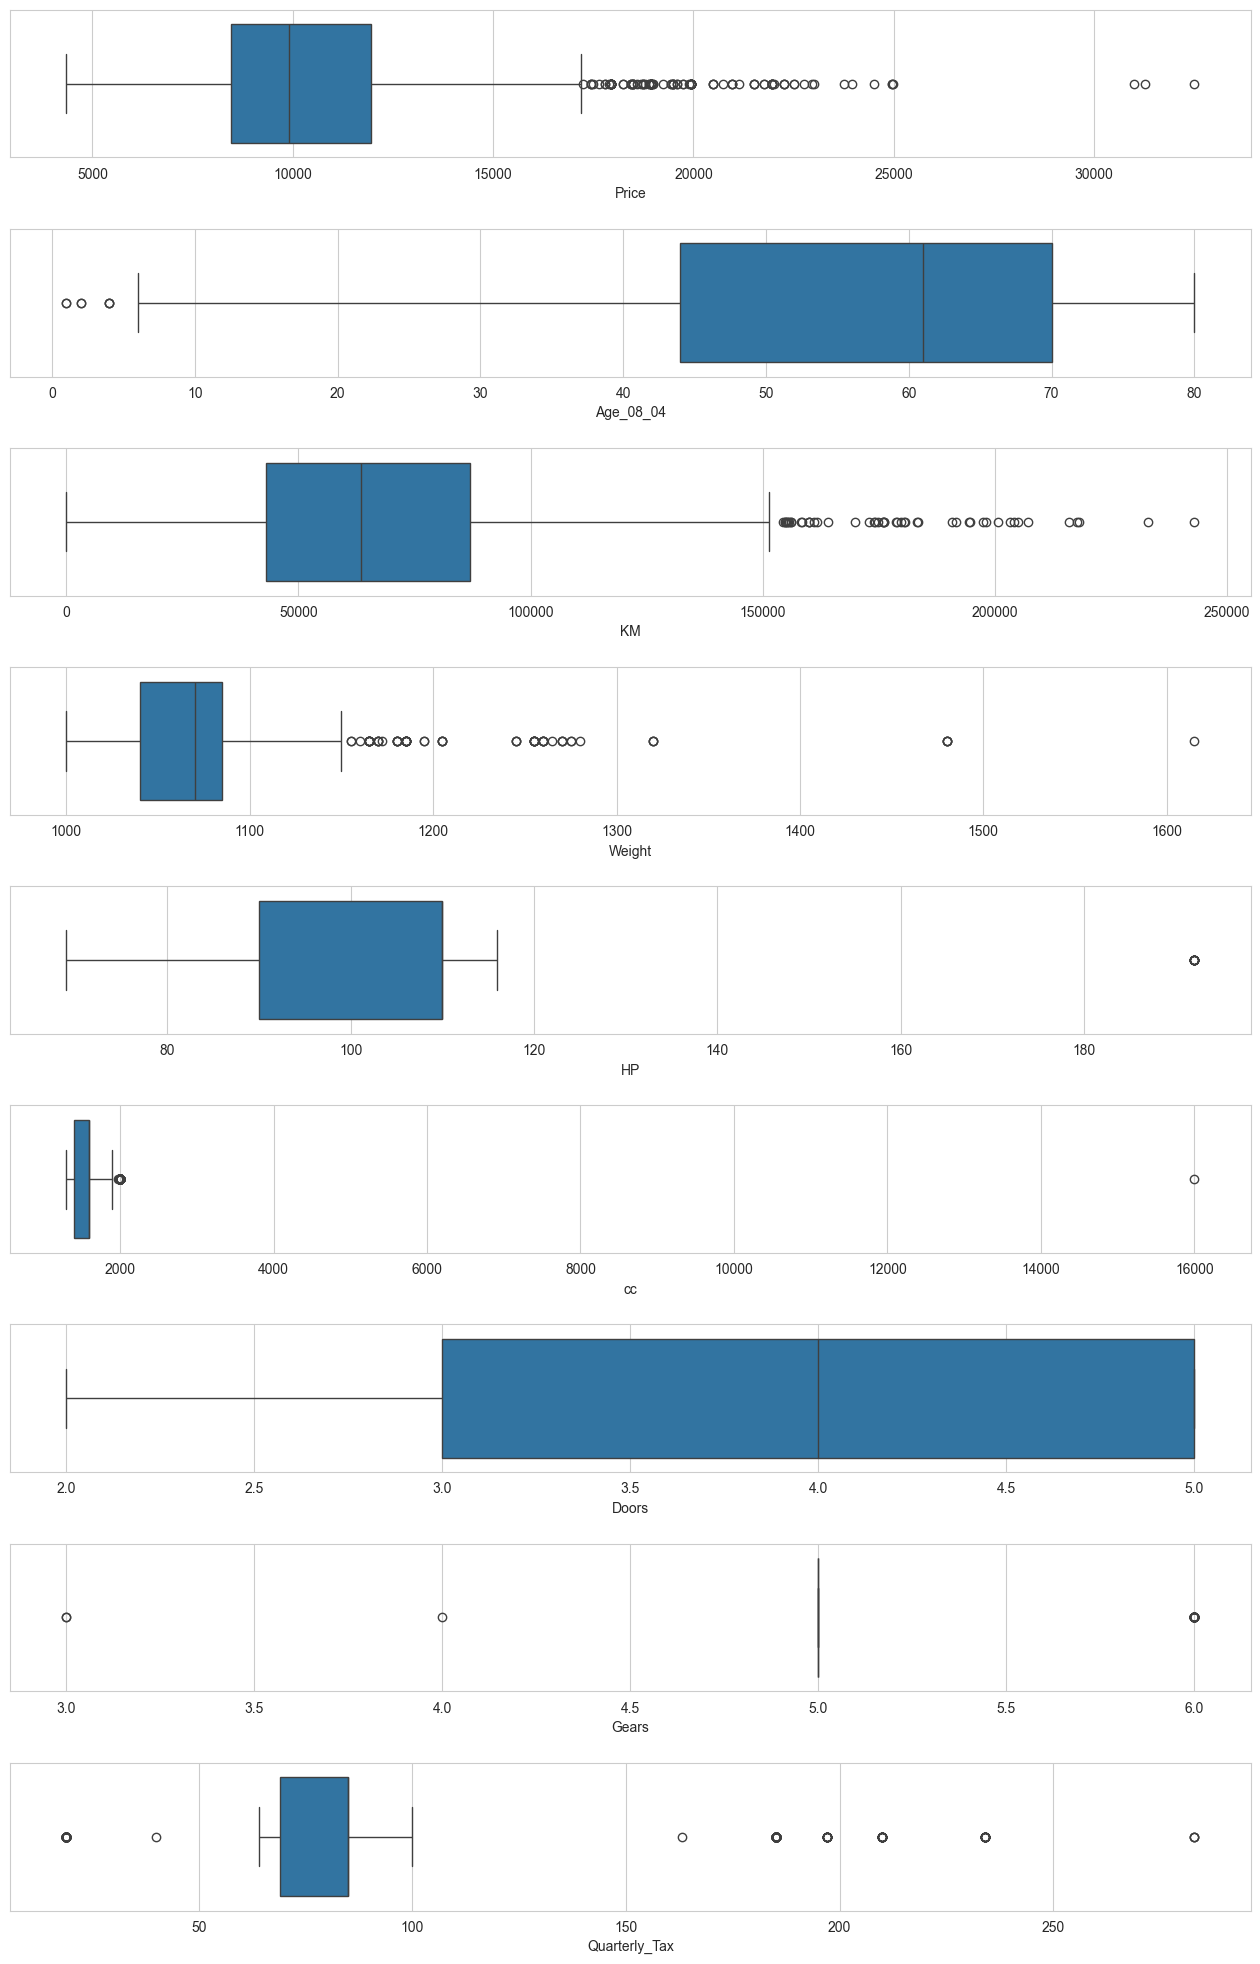

In [259]:
fig, axes = plt.subplots(9,1,figsize =(13,20), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = dtcol_final, ax = axes[0])
sns.boxplot(x = 'Age_08_04', data = dtcol_final, ax = axes[1])
sns.boxplot(x = 'KM', data = dtcol_final, ax = axes[2])
sns.boxplot(x = 'Weight', data = dtcol_final, ax = axes[3])
sns.boxplot(x = 'HP', data = dtcol_final, ax = axes[4])
sns.boxplot(x = 'cc', data = dtcol_final, ax = axes[5])
sns.boxplot(x = 'Doors', data = dtcol_final, ax = axes[6])
sns.boxplot(x = 'Gears', data = dtcol_final, ax = axes[7])
sns.boxplot(x = 'Quarterly_Tax', data = dtcol_final, ax = axes[8])
plt.tight_layout(pad = 2.0)

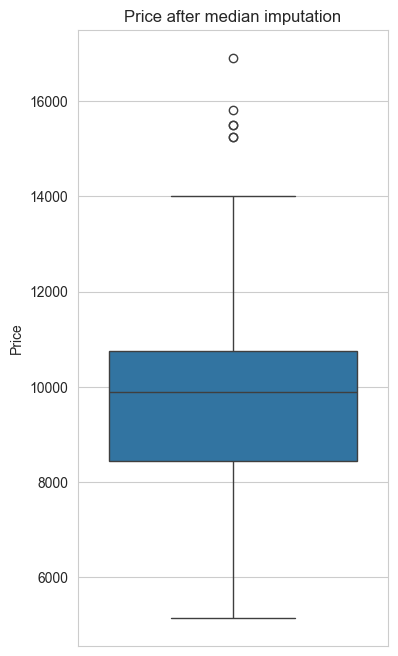

In [279]:
# there are a number of outiers, we'd change those and see how out model is performing.

df_median_imputation = dtcol_final.copy()
for i in dtcol_final['Price']:
    q1 = np.quantile(df_median_imputation.Price, 0.25)
    q3 = np.quantile(df_median_imputation.Price, 0.75)
    med = np.median(df_median_imputation.Price)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_median_imputation['Price']= df_median_imputation['Price'].replace(i, med)

plt.figure(figsize = (4,8))
sns.boxplot(df_median_imputation['Price'])
plt.title('Price after median imputation')
plt.show()

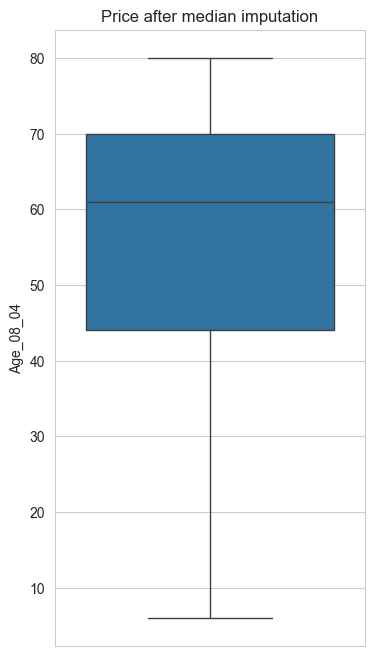

In [217]:
for i in dtcol_final['Age_08_04']:
    q1 = np.quantile(df_median_imputation.Age_08_04, 0.25)
    q3 = np.quantile(df_median_imputation.Age_08_04, 0.75)
    med = np.median(df_median_imputation.Age_08_04)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_median_imputation['Age_08_04']= df_median_imputation['Age_08_04'].replace(i, med)

plt.figure(figsize = (4,8))
sns.boxplot(df_median_imputation['Age_08_04'])
plt.title('Price after median imputation')
plt.show()

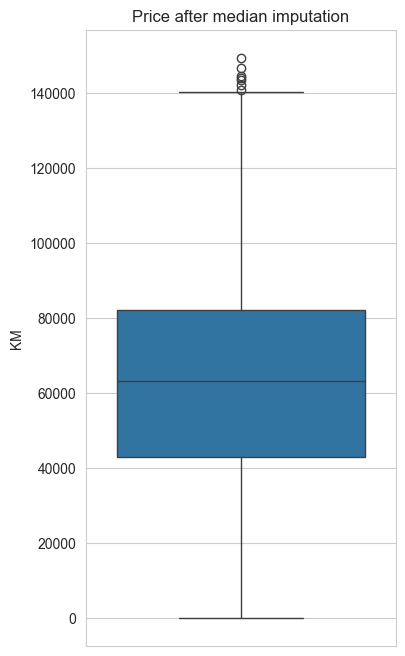

In [219]:
for i in dtcol_final['KM']:
    q1 = np.quantile(df_median_imputation.KM, 0.25)
    q3 = np.quantile(df_median_imputation.KM, 0.75)
    med = np.median(df_median_imputation.KM)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_median_imputation['KM']= df_median_imputation['KM'].replace(i, med)

plt.figure(figsize = (4,8))
sns.boxplot(df_median_imputation['KM'])
plt.title('Price after median imputation')
plt.show()

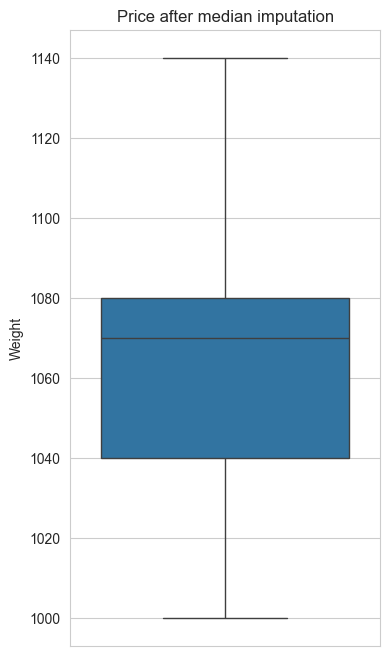

In [220]:
for i in dtcol_final['Weight']:
    q1 = np.quantile(df_median_imputation.Weight, 0.25)
    q3 = np.quantile(df_median_imputation.Weight, 0.75)
    med = np.median(df_median_imputation.Weight)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_median_imputation['Weight']= df_median_imputation['Weight'].replace(i, med)

plt.figure(figsize = (4,8))
sns.boxplot(df_median_imputation['Weight'])
plt.title('Price after median imputation')
plt.show()

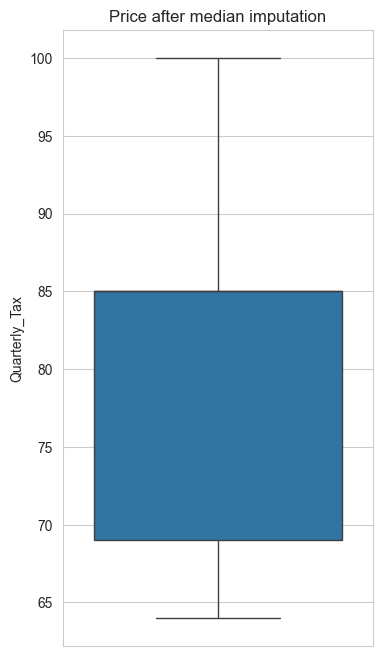

In [262]:
for i in dtcol_final['Quarterly_Tax']:
    q1 = np.quantile(df_median_imputation.Quarterly_Tax, 0.25)
    q3 = np.quantile(df_median_imputation.Quarterly_Tax, 0.75)
    med = np.median(df_median_imputation.Quarterly_Tax)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_median_imputation['Quarterly_Tax']= df_median_imputation['Quarterly_Tax'].replace(i, med)

plt.figure(figsize = (4,8))
sns.boxplot(df_median_imputation['Quarterly_Tax'])
plt.title('Price after median imputation')
plt.show()

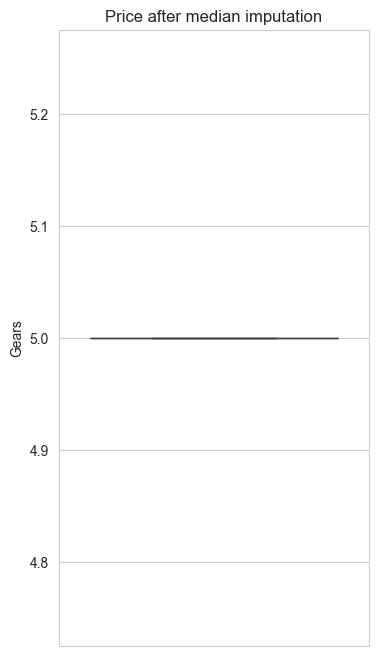

In [263]:
for i in dtcol_final['Gears']:
    q1 = np.quantile(df_median_imputation.Gears, 0.25)
    q3 = np.quantile(df_median_imputation.Gears, 0.75)
    med = np.median(df_median_imputation.Gears)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_median_imputation['Gears']= df_median_imputation['Gears'].replace(i, med)

plt.figure(figsize = (4,8))
sns.boxplot(df_median_imputation['Gears'])
plt.title('Price after median imputation')
plt.show()

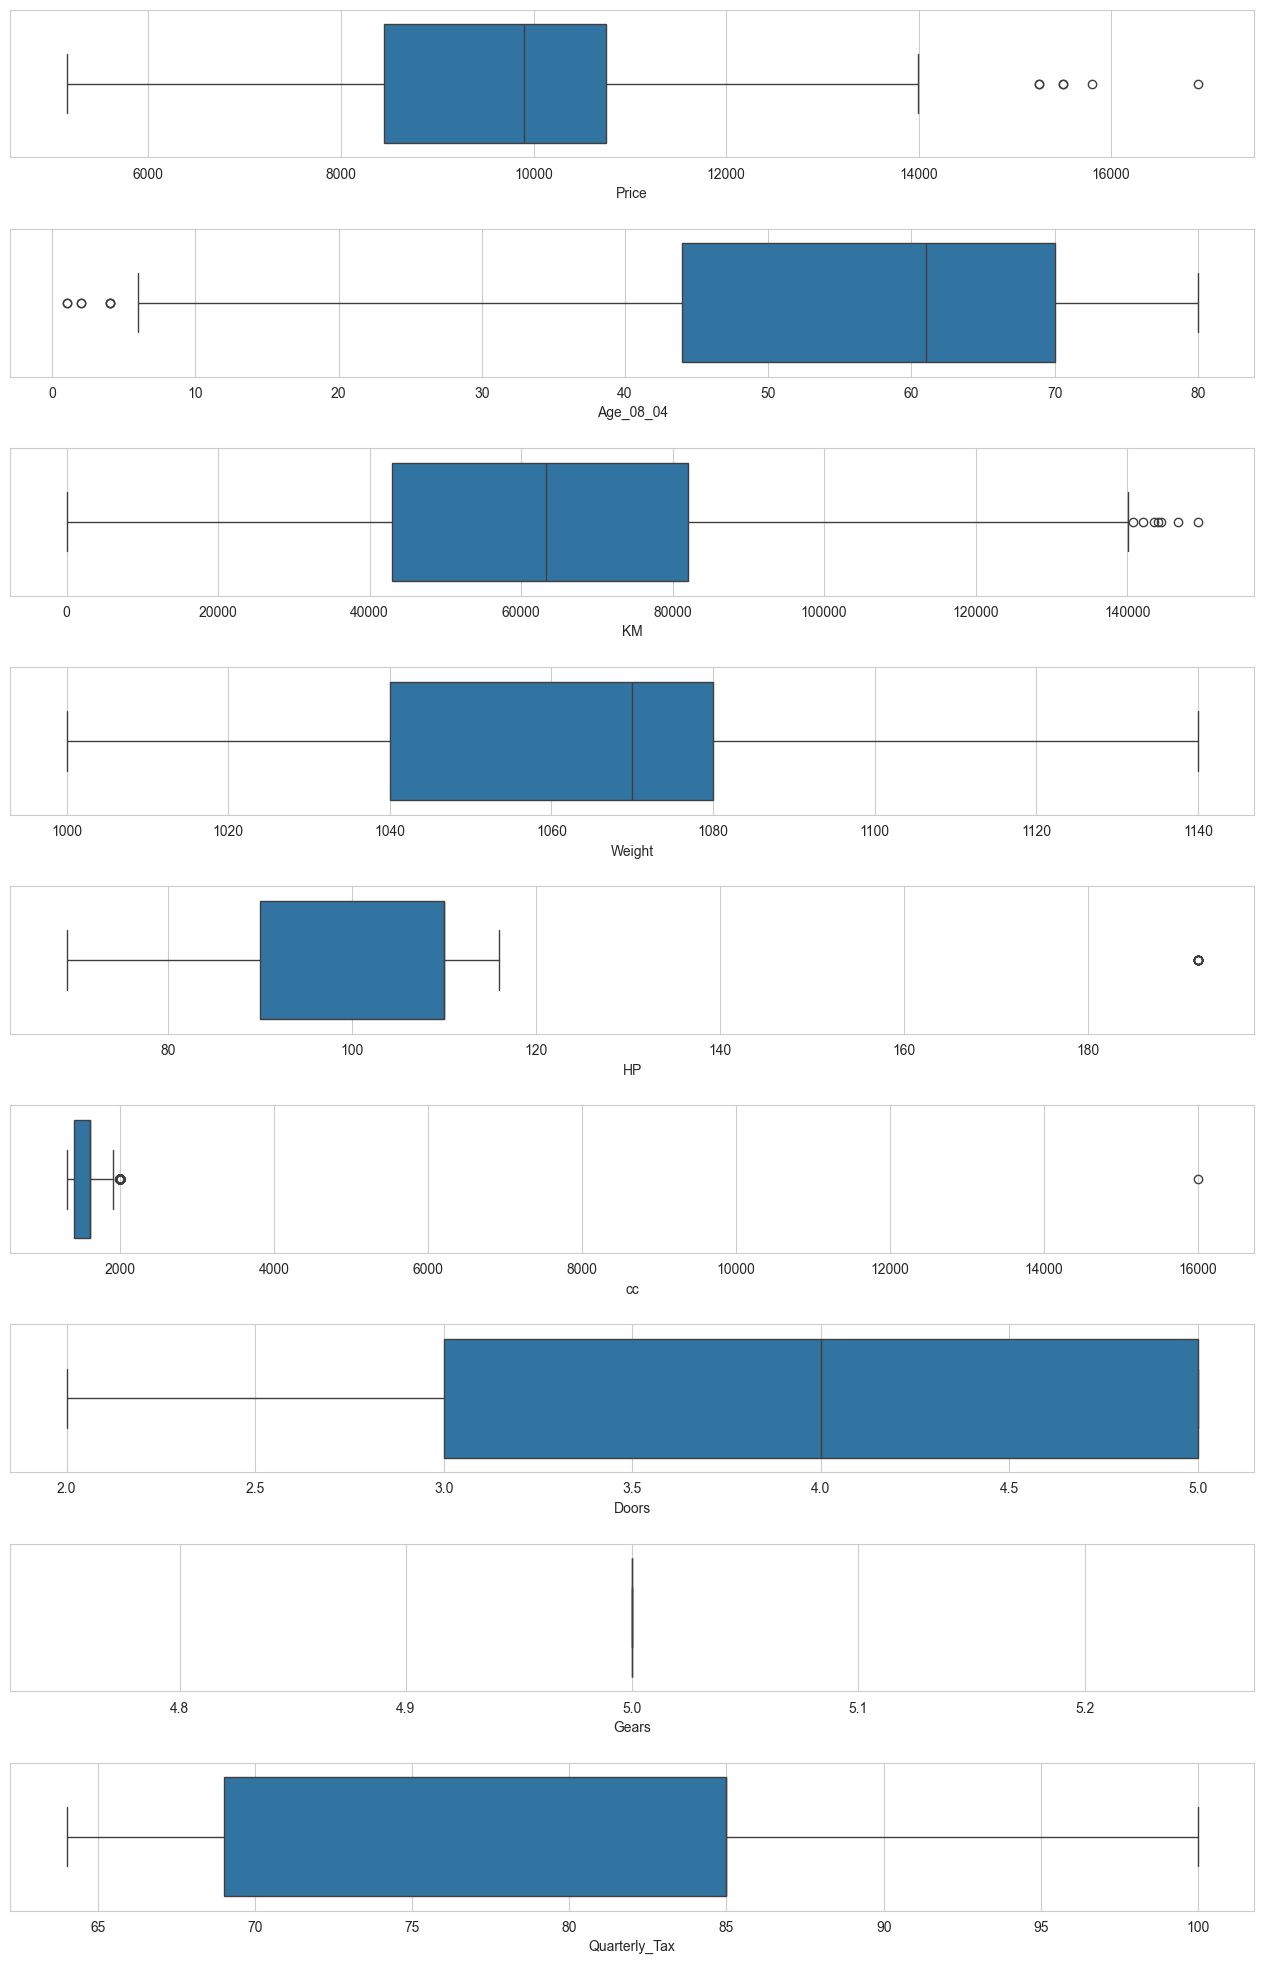

In [264]:
fig, axes = plt.subplots(9,1,figsize =(13,20), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = df_median_imputation, ax = axes[0])
sns.boxplot(x = 'Age_08_04', data = df_median_imputation, ax = axes[1])
sns.boxplot(x = 'KM', data = df_median_imputation, ax = axes[2])
sns.boxplot(x = 'Weight', data = df_median_imputation, ax = axes[3])
sns.boxplot(x = 'HP', data = df_median_imputation, ax = axes[4])
sns.boxplot(x = 'cc', data = df_median_imputation, ax = axes[5])
sns.boxplot(x = 'Doors', data = df_median_imputation, ax = axes[6])
sns.boxplot(x = 'Gears', data = df_median_imputation, ax = axes[7])
sns.boxplot(x = 'Quarterly_Tax', data = df_median_imputation, ax = axes[8])
plt.tight_layout(pad = 2.0)

In [265]:
# Now we can build our model on this data set

X = df_median_imputation.drop('Price', axis = 1)
y = df_median_imputation.Price

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1001)

In [267]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 8)
(359, 8)
(1077,)
(359,)


In [268]:
median_imputation_model = LinearRegression()

In [269]:
median_imputation_model.fit(X_train, y_train)

LinearRegression()

In [270]:
pred_median = median_imputation_model.predict(X_test)

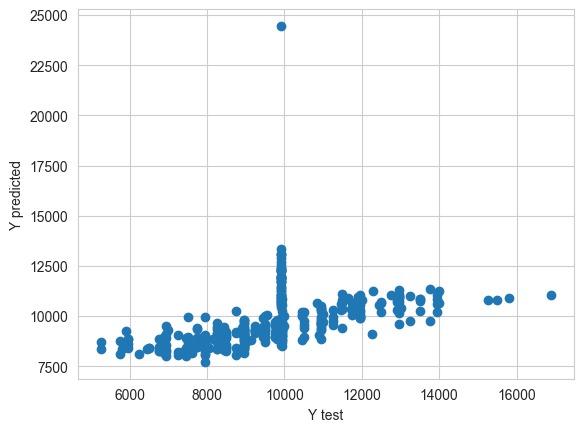

In [271]:
plt.scatter(y_test, pred_median)
plt.xlabel('Y test')
plt.ylabel('Y predicted')
plt.show()

In [272]:
median_imputation_model.score(X_test, y_test)

0.19287526407702726

In [273]:
r2_score(y_test, pred_median)

0.19287526407702726

In [274]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_median))
print('MSE:', metrics.mean_squared_error(y_test, pred_median))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_median)))

MAE: 1247.9325086934737
MSE: 2992101.1084496104
RMSE: 1729.7690910782312


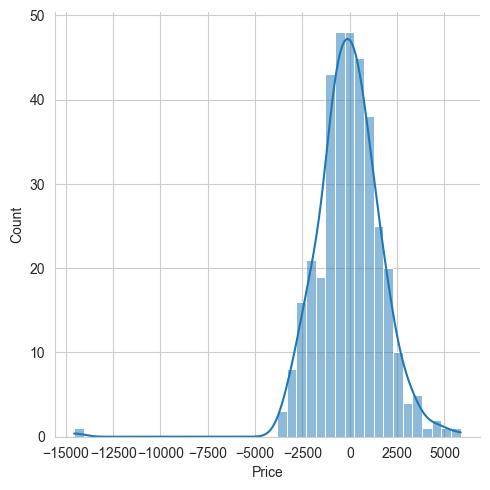

In [275]:
sns.displot((y_test - pred_median), bins = 40, kde = True)

This median imputation model performed quite poorly.

# Mean imputation

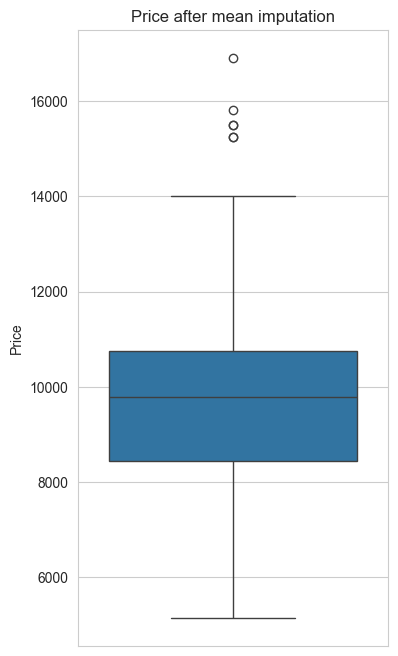

In [278]:
# there are a number of outiers, we'd change those and see how out model is performing.

df_mean_imputation = dtcol_final.copy()
for i in dtcol_final['Price']:
    q1 = np.quantile(df_mean_imputation.Price, 0.25)
    q3 = np.quantile(df_mean_imputation.Price, 0.75)
    mean = np.mean(df_mean_imputation.Price)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_mean_imputation['Price']= df_mean_imputation['Price'].replace(i, mean)

plt.figure(figsize = (4,8))
sns.boxplot(df_mean_imputation['Price'])
plt.title('Price after mean imputation')
plt.show()

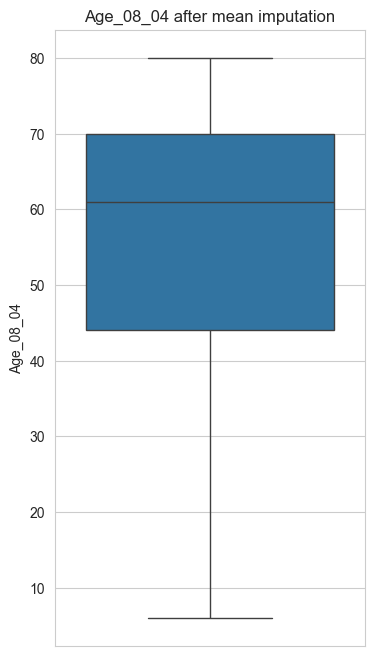

In [284]:
for i in dtcol_final['Age_08_04']:
    q1 = np.quantile(df_mean_imputation.Age_08_04, 0.25)
    q3 = np.quantile(df_mean_imputation.Age_08_04, 0.75)
    mean = np.mean(df_mean_imputation.Age_08_04)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_mean_imputation['Age_08_04']= df_mean_imputation['Age_08_04'].replace(i, mean)

plt.figure(figsize = (4,8))
sns.boxplot(df_mean_imputation['Age_08_04'])
plt.title('Age_08_04 after mean imputation')
plt.show()

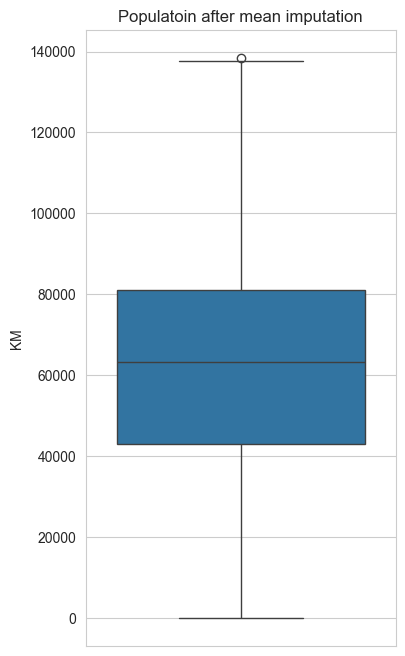

In [283]:
for i in dtcol_final['KM']:
    q1 = np.quantile(df_mean_imputation.KM, 0.25)
    q3 = np.quantile(df_mean_imputation.KM, 0.75)
    mean = np.mean(df_mean_imputation.KM)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_mean_imputation['KM']= df_mean_imputation['KM'].replace(i, mean)

plt.figure(figsize = (4,8))
sns.boxplot(df_mean_imputation['KM'])
plt.title('Populatoin after mean imputation')
plt.show()

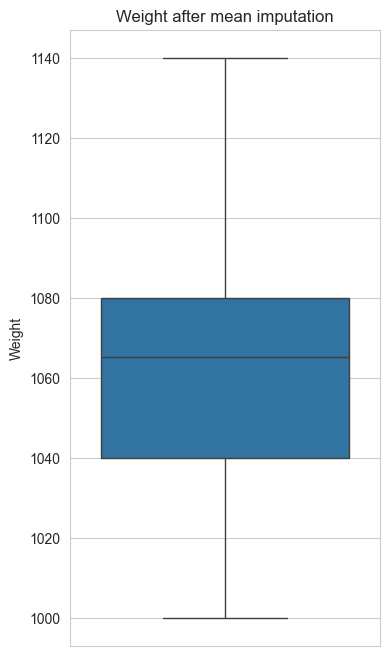

In [282]:
for i in dtcol_final['Weight']:
    q1 = np.quantile(df_mean_imputation.Weight, 0.25)
    q3 = np.quantile(df_mean_imputation.Weight, 0.75)
    mean = np.mean(df_mean_imputation.Weight)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_mean_imputation['Weight']= df_mean_imputation['Weight'].replace(i, mean)

plt.figure(figsize = (4,8))
sns.boxplot(df_mean_imputation['Weight'])
plt.title('Weight after mean imputation')
plt.show()

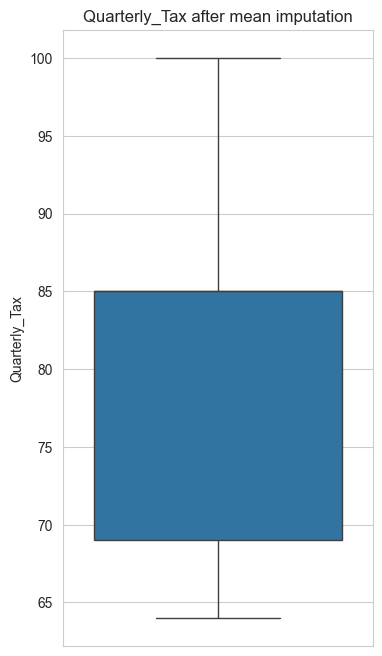

In [285]:
for i in dtcol_final['Quarterly_Tax']:
    q1 = np.quantile(df_mean_imputation.Quarterly_Tax, 0.25)
    q3 = np.quantile(df_mean_imputation.Quarterly_Tax, 0.75)
    mean = np.mean(df_mean_imputation.Quarterly_Tax)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_mean_imputation['Quarterly_Tax']= df_mean_imputation['Quarterly_Tax'].replace(i, mean)

plt.figure(figsize = (4,8))
sns.boxplot(df_mean_imputation['Quarterly_Tax'])
plt.title('Quarterly_Tax after mean imputation')
plt.show()

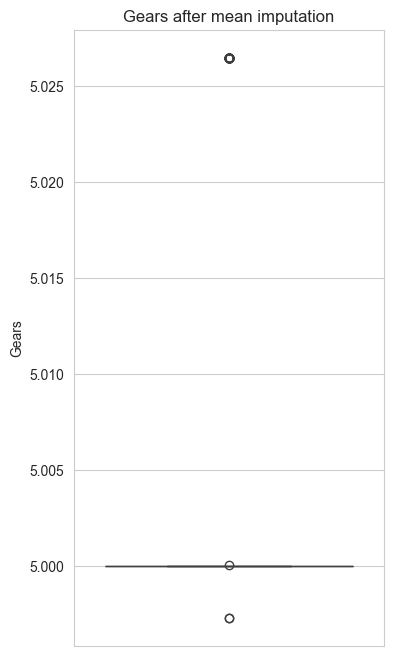

In [286]:
for i in dtcol_final['Gears']:
    q1 = np.quantile(df_mean_imputation.Gears, 0.25)
    q3 = np.quantile(df_mean_imputation.Gears, 0.75)
    mean = np.mean(df_mean_imputation.Gears)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    if i > upper_bound or i< lower_bound:
        df_mean_imputation['Gears']= df_mean_imputation['Gears'].replace(i, mean)

plt.figure(figsize = (4,8))
sns.boxplot(df_mean_imputation['Gears'])
plt.title('Gears after mean imputation')
plt.show()

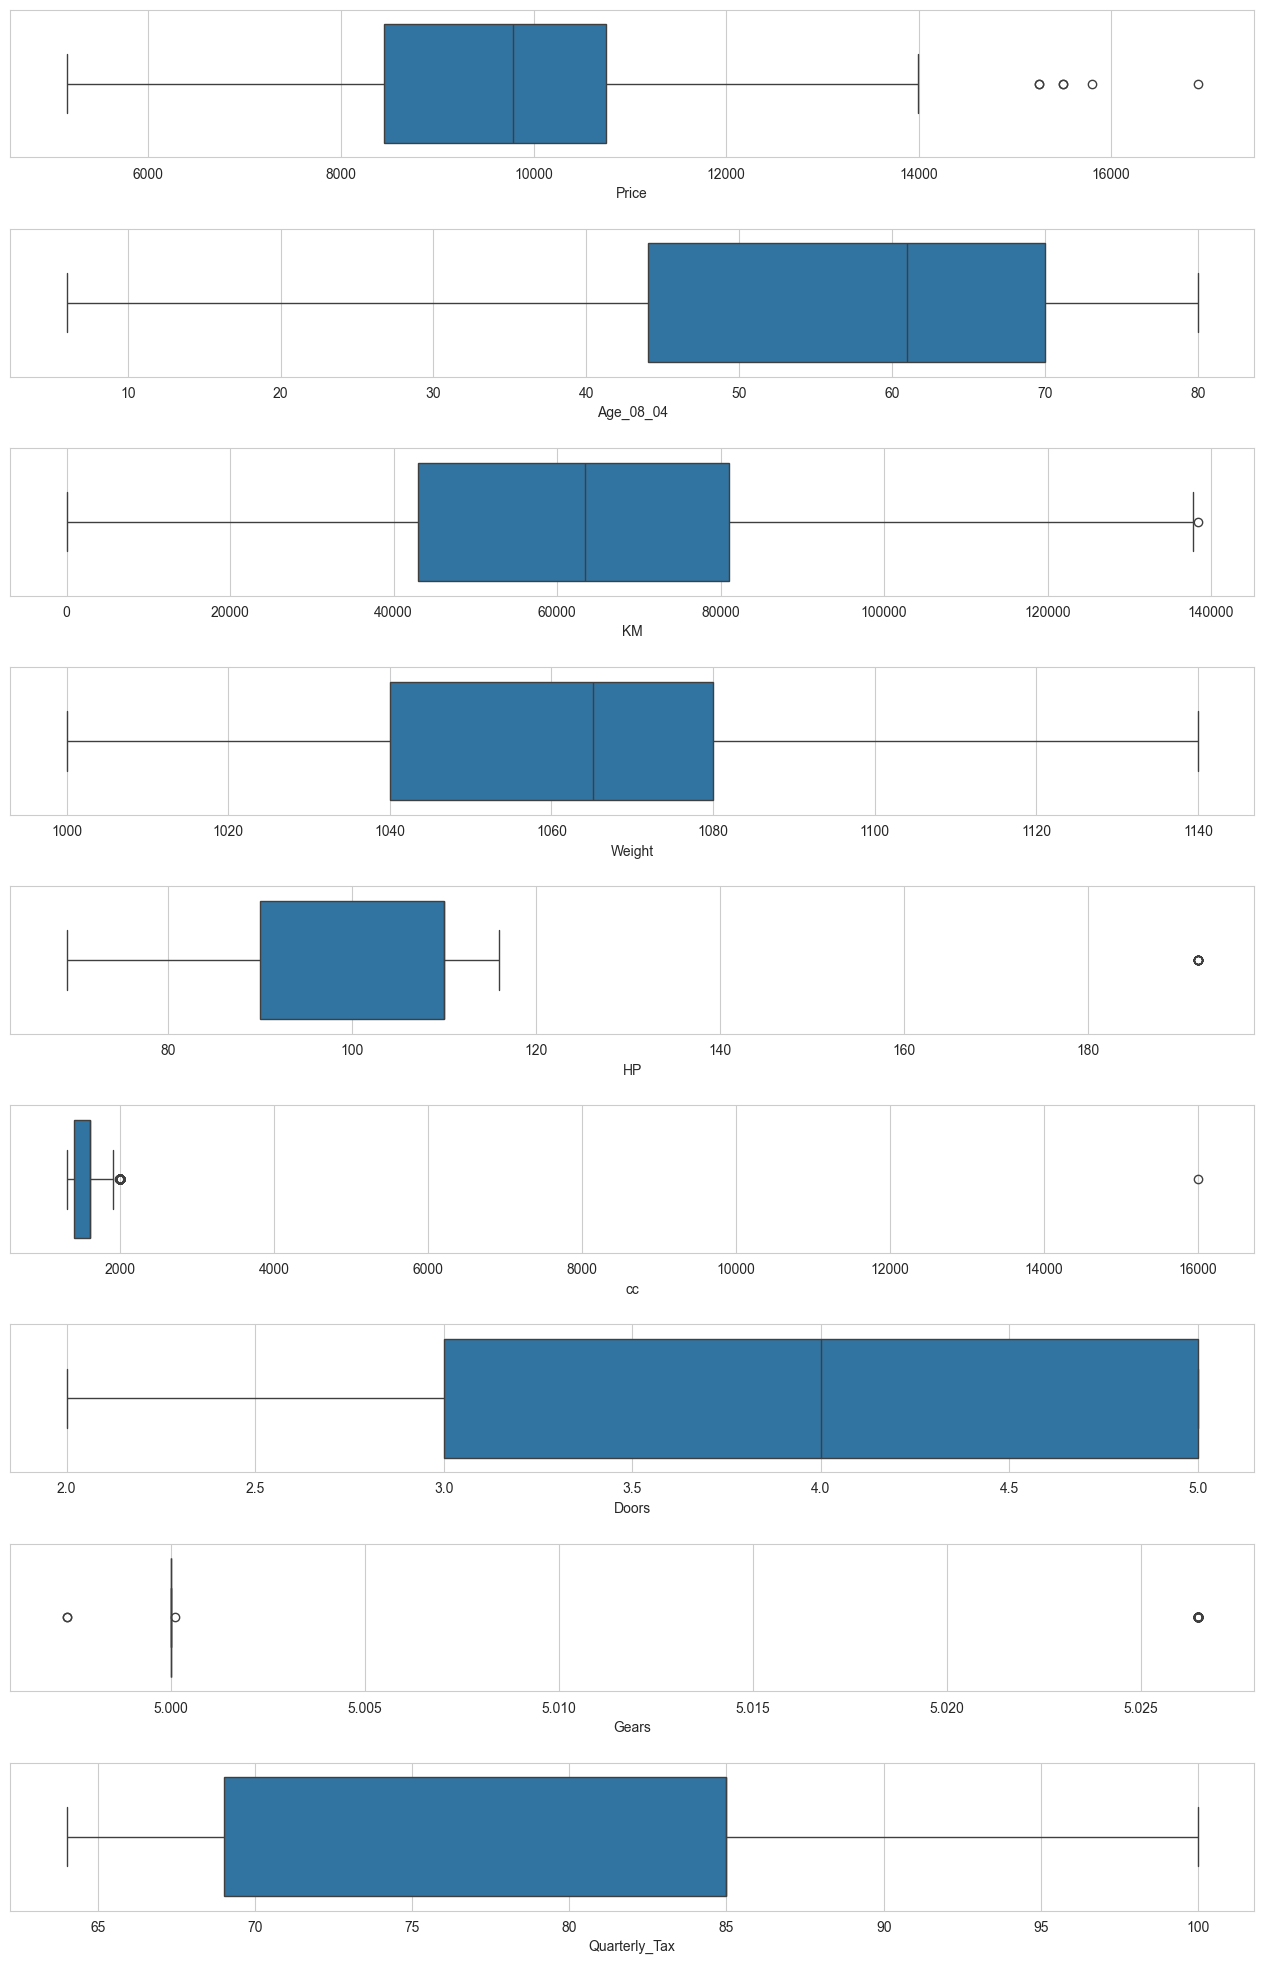

In [287]:
fig, axes = plt.subplots(9,1,figsize =(13,20), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = df_mean_imputation, ax = axes[0])
sns.boxplot(x = 'Age_08_04', data = df_mean_imputation, ax = axes[1])
sns.boxplot(x = 'KM', data = df_mean_imputation, ax = axes[2])
sns.boxplot(x = 'Weight', data = df_mean_imputation, ax = axes[3])
sns.boxplot(x = 'HP', data = df_mean_imputation, ax = axes[4])
sns.boxplot(x = 'cc', data = df_mean_imputation, ax = axes[5])
sns.boxplot(x = 'Doors', data = df_mean_imputation, ax = axes[6])
sns.boxplot(x = 'Gears', data = df_mean_imputation, ax = axes[7])
sns.boxplot(x = 'Quarterly_Tax', data = df_mean_imputation, ax = axes[8])
plt.tight_layout(pad = 2.0)

In [288]:
X = df_mean_imputation.drop('Price', axis =1)
y = df_mean_imputation.Price

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10001)

In [292]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 8)
(359, 8)
(1077,)
(359,)


In [293]:
mean_imputation_model = LinearRegression()

In [294]:
mean_imputation_model.fit(X_train, y_train)

LinearRegression()

In [295]:
pred_mean= mean_imputation_model.predict(X_test)

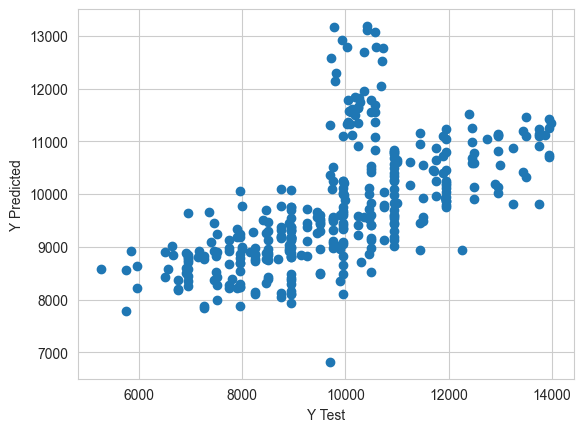

In [296]:
plt.scatter(y_test, pred_mean)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

In [297]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_mean))
print('MSE:', metrics.mean_squared_error(y_test, pred_mean))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_mean)))

MAE: 1166.2880443892318
MSE: 2069840.3679882032
RMSE: 1438.6939799652332


In [299]:
r2_score(y_test, pred_mean)

0.3769431493602866

In [303]:
mean_imputation_model.score(X_test, y_test)

0.3769431493602866

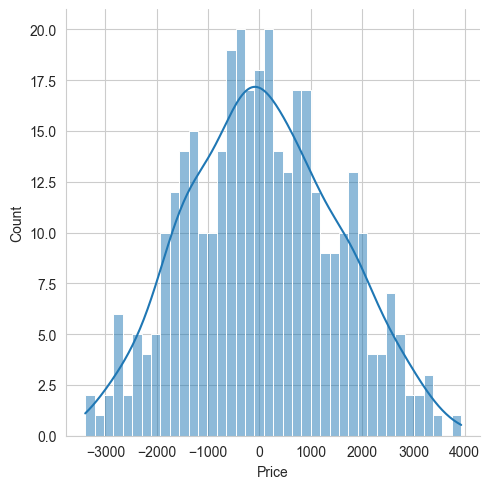

In [305]:
sns.displot((y_test - pred_mean), bins = 40, kde = True)

Clearly we can see that the imputation is not working, the results are getting worse and worse.

The last thing we can do is that we can drop the outliers.


# Dropping the outliers

In [309]:
df_outlier_drop = dtcol_final.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)         

In [315]:
df_outlier_drop.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

Text(0.5, 1.0, 'Price after removing outliers')

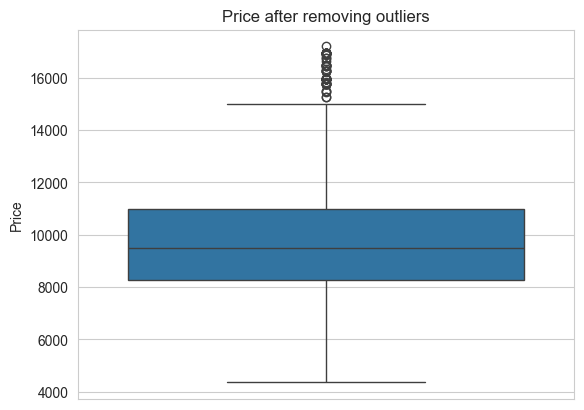

In [310]:
drop_outliers(df_outlier_drop, 'Price')
sns.boxplot(df_outlier_drop.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

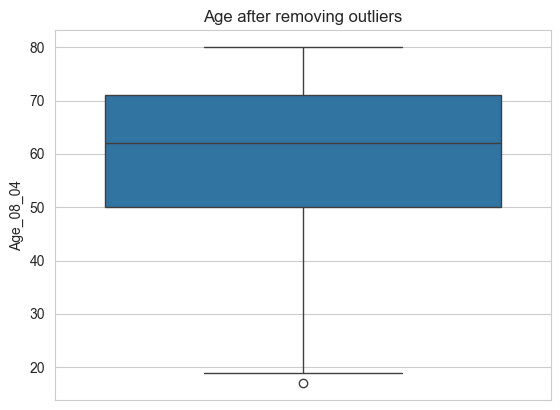

In [311]:
drop_outliers(df_outlier_drop, 'Age_08_04')
sns.boxplot(df_outlier_drop.Age_08_04)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

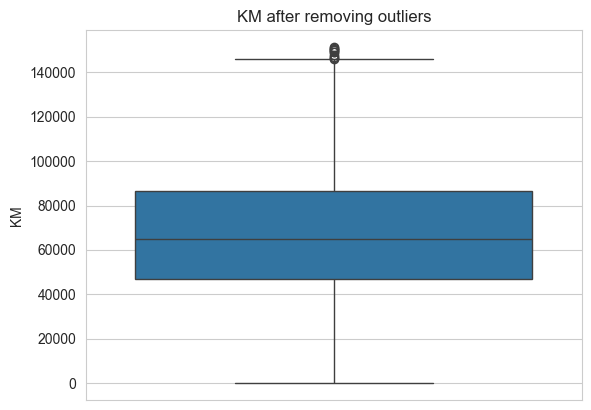

In [312]:
drop_outliers(df_outlier_drop, 'KM')
sns.boxplot(df_outlier_drop.KM)
plt.title('KM after removing outliers')

Text(0.5, 1.0, 'Weight after removing outliers')

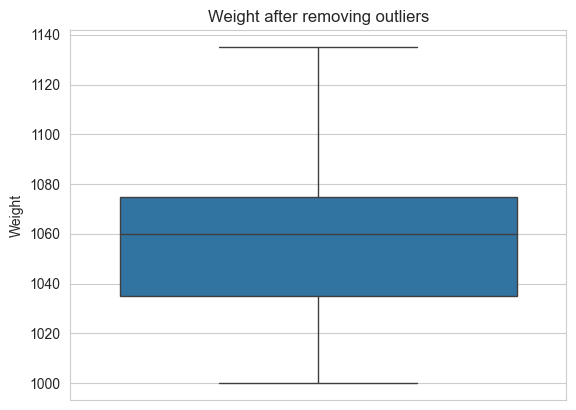

In [313]:
drop_outliers(df_outlier_drop, 'Weight')
sns.boxplot(df_outlier_drop.Weight)
plt.title('Weight after removing outliers')

Text(0.5, 1.0, 'Quarterly_Tax after removing outliers')

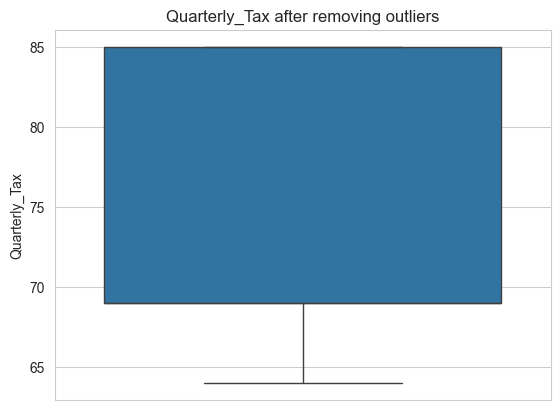

In [316]:
drop_outliers(df_outlier_drop, 'Quarterly_Tax')
sns.boxplot(df_outlier_drop.Quarterly_Tax)
plt.title('Quarterly_Tax after removing outliers')

Text(0.5, 1.0, 'Gears after removing outliers')

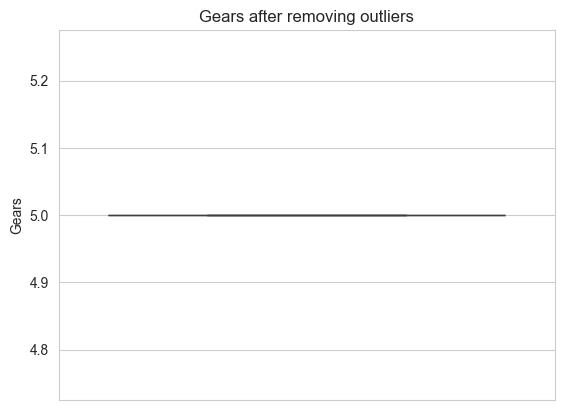

In [317]:
drop_outliers(df_outlier_drop, 'Gears')
sns.boxplot(df_outlier_drop.Gears)
plt.title('Gears after removing outliers')

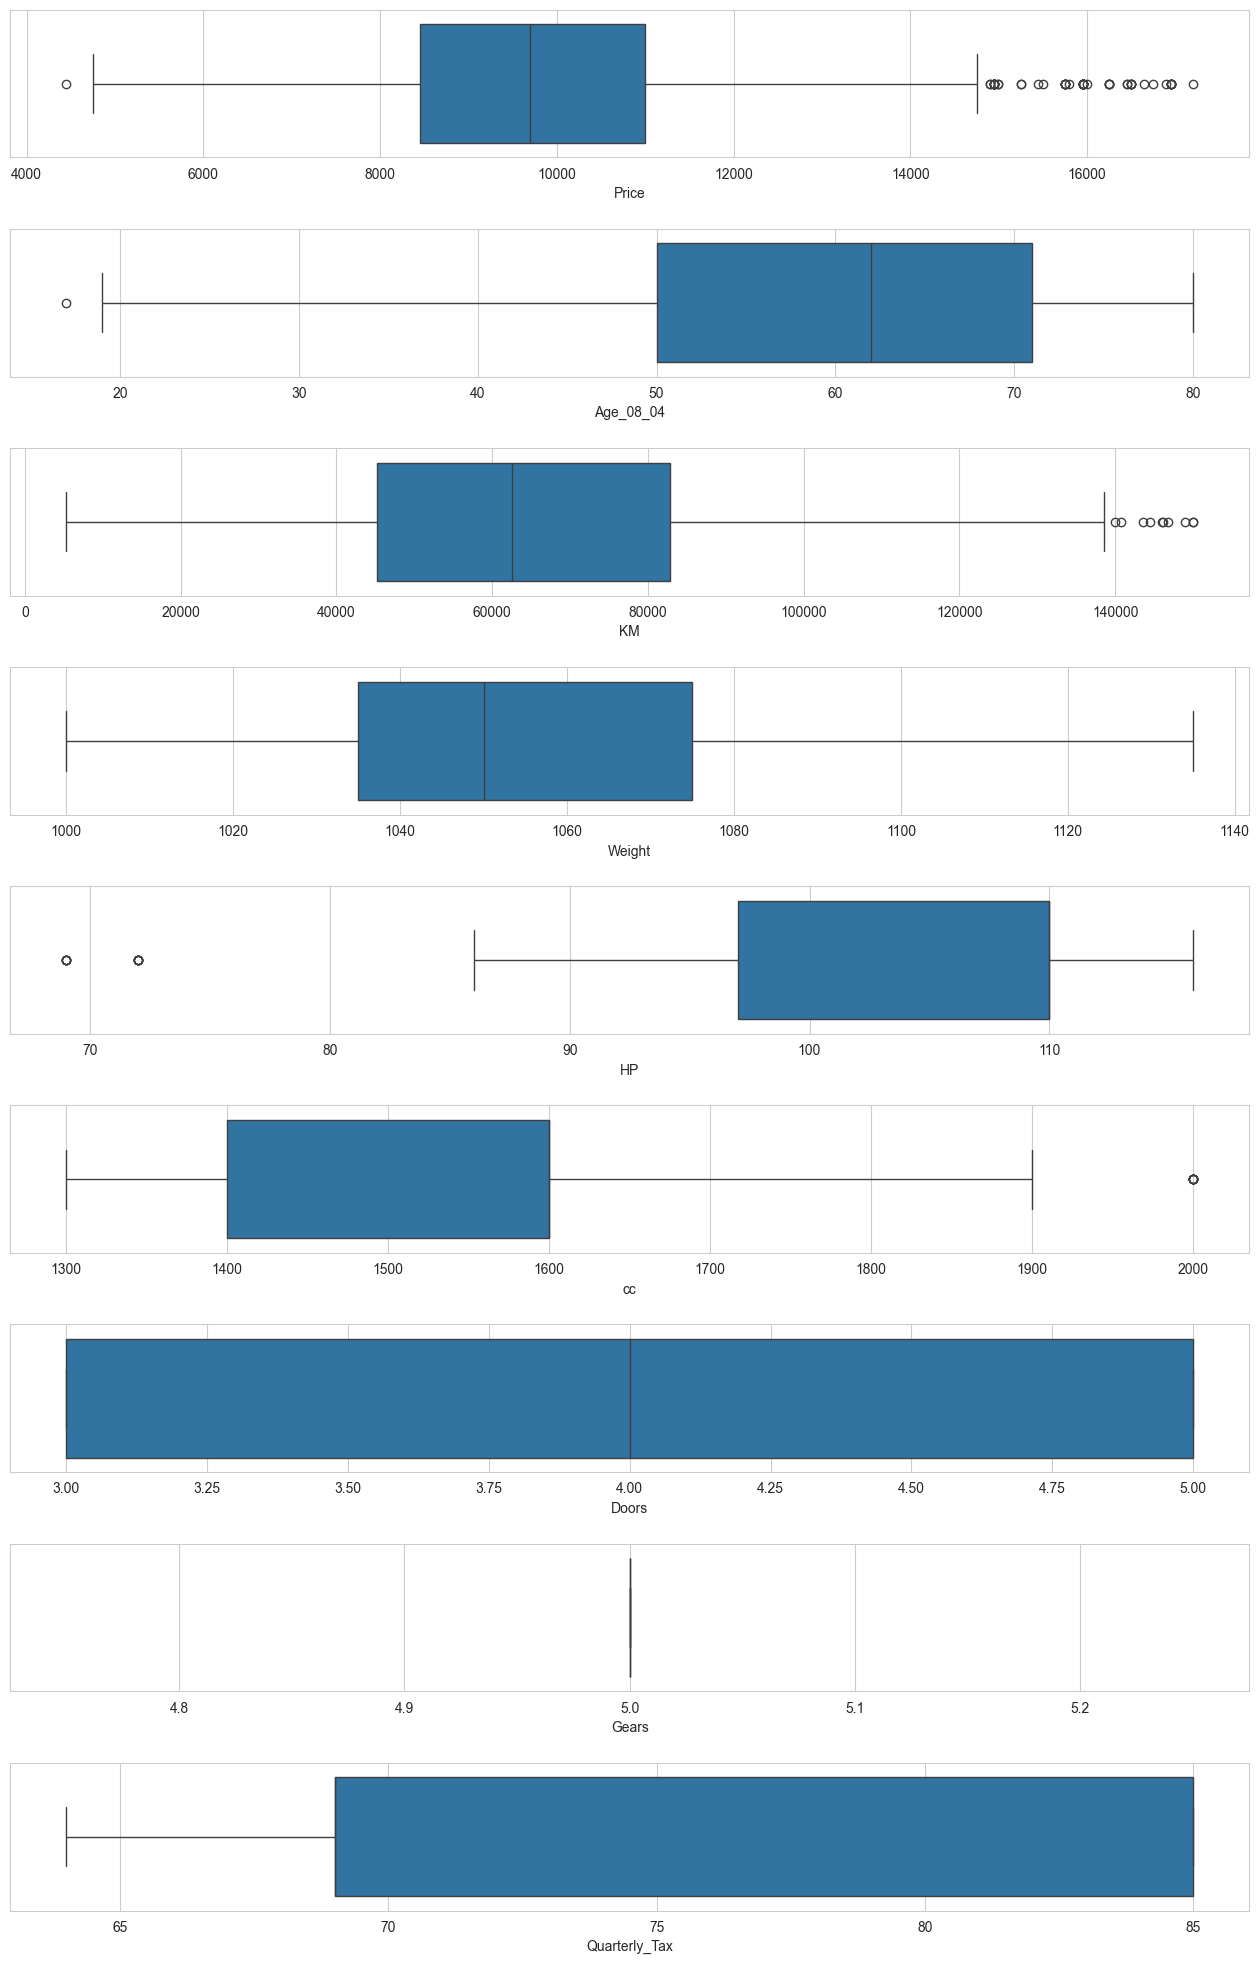

In [318]:
fig, axes = plt.subplots(9,1,figsize =(13,20), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = df_outlier_drop, ax = axes[0])
sns.boxplot(x = 'Age_08_04', data = df_outlier_drop, ax = axes[1])
sns.boxplot(x = 'KM', data = df_outlier_drop, ax = axes[2])
sns.boxplot(x = 'Weight', data = df_outlier_drop, ax = axes[3])
sns.boxplot(x = 'HP', data = df_outlier_drop, ax = axes[4])
sns.boxplot(x = 'cc', data = df_outlier_drop, ax = axes[5])
sns.boxplot(x = 'Doors', data = df_outlier_drop, ax = axes[6])
sns.boxplot(x = 'Gears', data = df_outlier_drop, ax = axes[7])
sns.boxplot(x = 'Quarterly_Tax', data = df_outlier_drop, ax = axes[8])
plt.tight_layout(pad = 2.0)

In [319]:
X = df_outlier_drop.drop('Price', axis = 1)
y = df_outlier_drop.Price

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10001)

In [321]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(804, 8)
(268, 8)
(804,)
(268,)


In [322]:
without_outlier_model = LinearRegression()

In [324]:
without_outlier_model.fit(X_train, y_train)

LinearRegression()

In [325]:
pred_wo_outlier = without_outlier_model.predict(X_test)

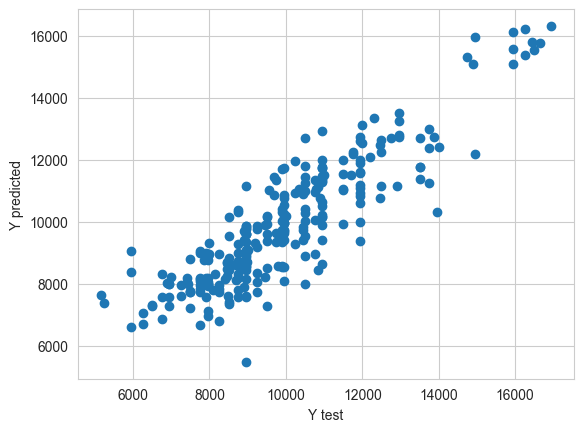

In [327]:
plt.scatter(y_test, pred_wo_outlier)
plt.xlabel('Y test')
plt.ylabel('Y predicted')
plt.show()

In [328]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_wo_outlier))
print('MSE:', metrics.mean_squared_error(y_test, pred_wo_outlier))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_wo_outlier)))

MAE: 781.3447713388362
MSE: 1053066.9443362877
RMSE: 1026.1905009969093


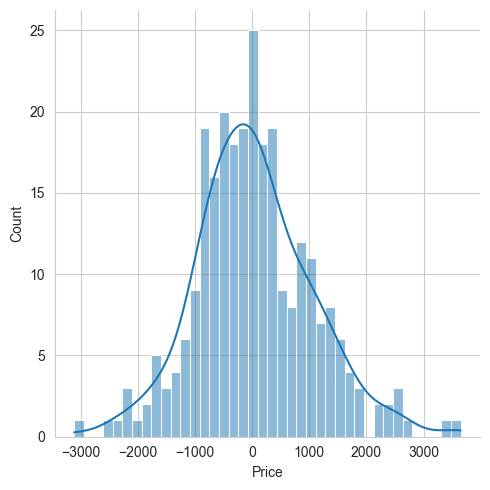

In [330]:
sns.displot((y_test - pred_wo_outlier), bins = 40, kde = True)

In [332]:
without_outlier_model.score(X_test, y_test)

0.7858142639892298

In [333]:
r2_score(y_test, pred_wo_outlier)

0.7858142639892298

# Scaling

In [341]:
from sklearn.preprocessing import StandardScaler

In [382]:
col_names = dtcol_final.columns

In [422]:
df_standard_scaler = dtcol_final.copy()

In [427]:
scaler = StandardScaler()

In [428]:
df_new = scaler.fit_transform(df_standard_scaler)

In [429]:
df_new = pd.DataFrame(df_new, columns = col_names)

In [430]:
df_new.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.763763  -1.771966 -0.574695 -0.768042  0.997419 -1.085139 -0.140425   
1  0.832715  -1.771966  0.117454 -0.768042  0.997419 -1.085139 -0.140425   
2  0.887877  -1.718184 -0.715386 -0.768042  0.997419 -1.085139 -0.140425   
3  1.163685  -1.610620 -0.547650 -0.768042  0.997419 -1.085139 -0.140425   
4  0.832715  -1.395491 -0.801028 -0.768042  0.997419 -1.085139 -0.140425   

   Quarterly_Tax    Weight  
0        2.98868  1.758561  
1        2.98868  1.758561  
2        2.98868  1.758561  
3        2.98868  1.758561  
4        2.98868  1.853577

In [439]:
df_new.describe()

Price     Age_08_04            KM            HP            cc  \
count  1.436000e+03  1.436000e+03  1.436000e+03  1.436000e+03  1.436000e+03   
mean   1.187537e-16 -2.375073e-16  1.583382e-16 -3.414168e-16  2.474035e-16   
std    1.000348e+00  1.000348e+00  1.000348e+00  1.000348e+00  1.000348e+00   
min   -1.759887e+00 -2.955175e+00 -1.827849e+00 -2.170298e+00 -6.525941e-01   
25%   -6.290712e-01 -6.425400e-01 -6.810070e-01 -7.680418e-01 -4.168779e-01   
50%   -2.291486e-01  2.717574e-01 -1.371911e-01  5.674405e-01  5.455451e-02   
75%    3.362592e-01  7.557973e-01  4.930867e-01  5.674405e-01  5.455451e-02   
max    6.004128e+00  1.293619e+00  4.653267e+00  6.042918e+00  3.399769e+01   

              Doors         Gears  Quarterly_Tax        Weight  
count  1.436000e+03  1.436000e+03   1.436000e+03  1.436000e+03  
mean  -3.364687e-16 -2.808029e-16  -1.979228e-17 -9.896138e-16  
std    1.000348e+00  1.000348e+00   1.000348e+00  1.000348e+00  
min   -2.135178e+00 -1.075361e+01  -1.656907e+00 -1.376963e+00  
25%   -1.085139e+00 -1.404252e-01  -4.407850e-01 -6.168356e-01  
50%   -3.509882e-02 -1.404252e-01  -5.162591e-02 -4.674040e-02  
75%    1.014941e+00 -1.404252e-01  -5.162591e-02  2.383072e-01  
max    1.014941e+00  5.166169e+00   4.764218e+00  1.030999e+01

In [388]:
X = df_new.drop('Price', axis =1)
y = df_new.Price

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10001)

In [390]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1077, 8)
(359, 8)
(1077,)
(359,)


In [391]:
scaled_model = LinearRegression()

In [392]:
scaled_model.fit(X_train, y_train)

LinearRegression()

In [393]:
pred_scaled = scaled_model.predict(X_test)

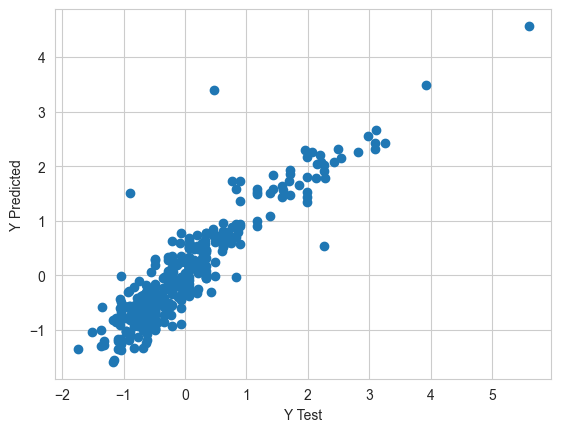

In [394]:
plt.scatter(y_test, pred_scaled)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

In [395]:
scaled_model.score(X_test, y_test)

0.8302474003264282

In [396]:
r2_score(y_test, pred_scaled)

0.8302474003264282

In [397]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_scaled))
print('MSE:', metrics.mean_squared_error(y_test, pred_scaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_scaled)))

MAE: 0.28530698810568744
MSE: 0.1617513261919975
RMSE: 0.40218319978835204


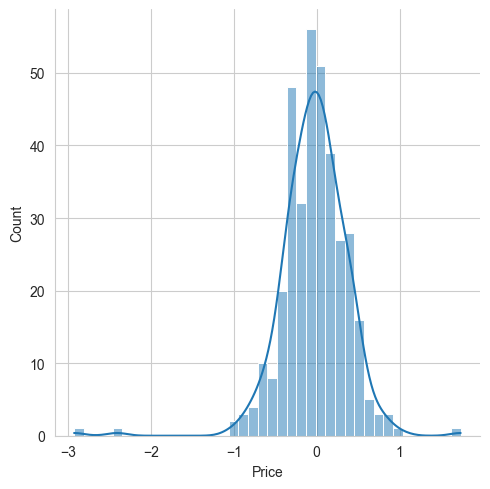

In [398]:
sns.displot((y_test - pred_scaled), bins = 40, kde = True)

# Model Validation

# 1. Multicollinearity

## Variance Infaltion factor 

In [431]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [432]:
y = df_new.drop(['Price'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
7         Weight  2.52
6  Quarterly_Tax  2.31
0      Age_08_04  1.88
1             KM  1.76
2             HP  1.42
3             cc  1.16
4          Doors  1.16
5          Gears  1.10

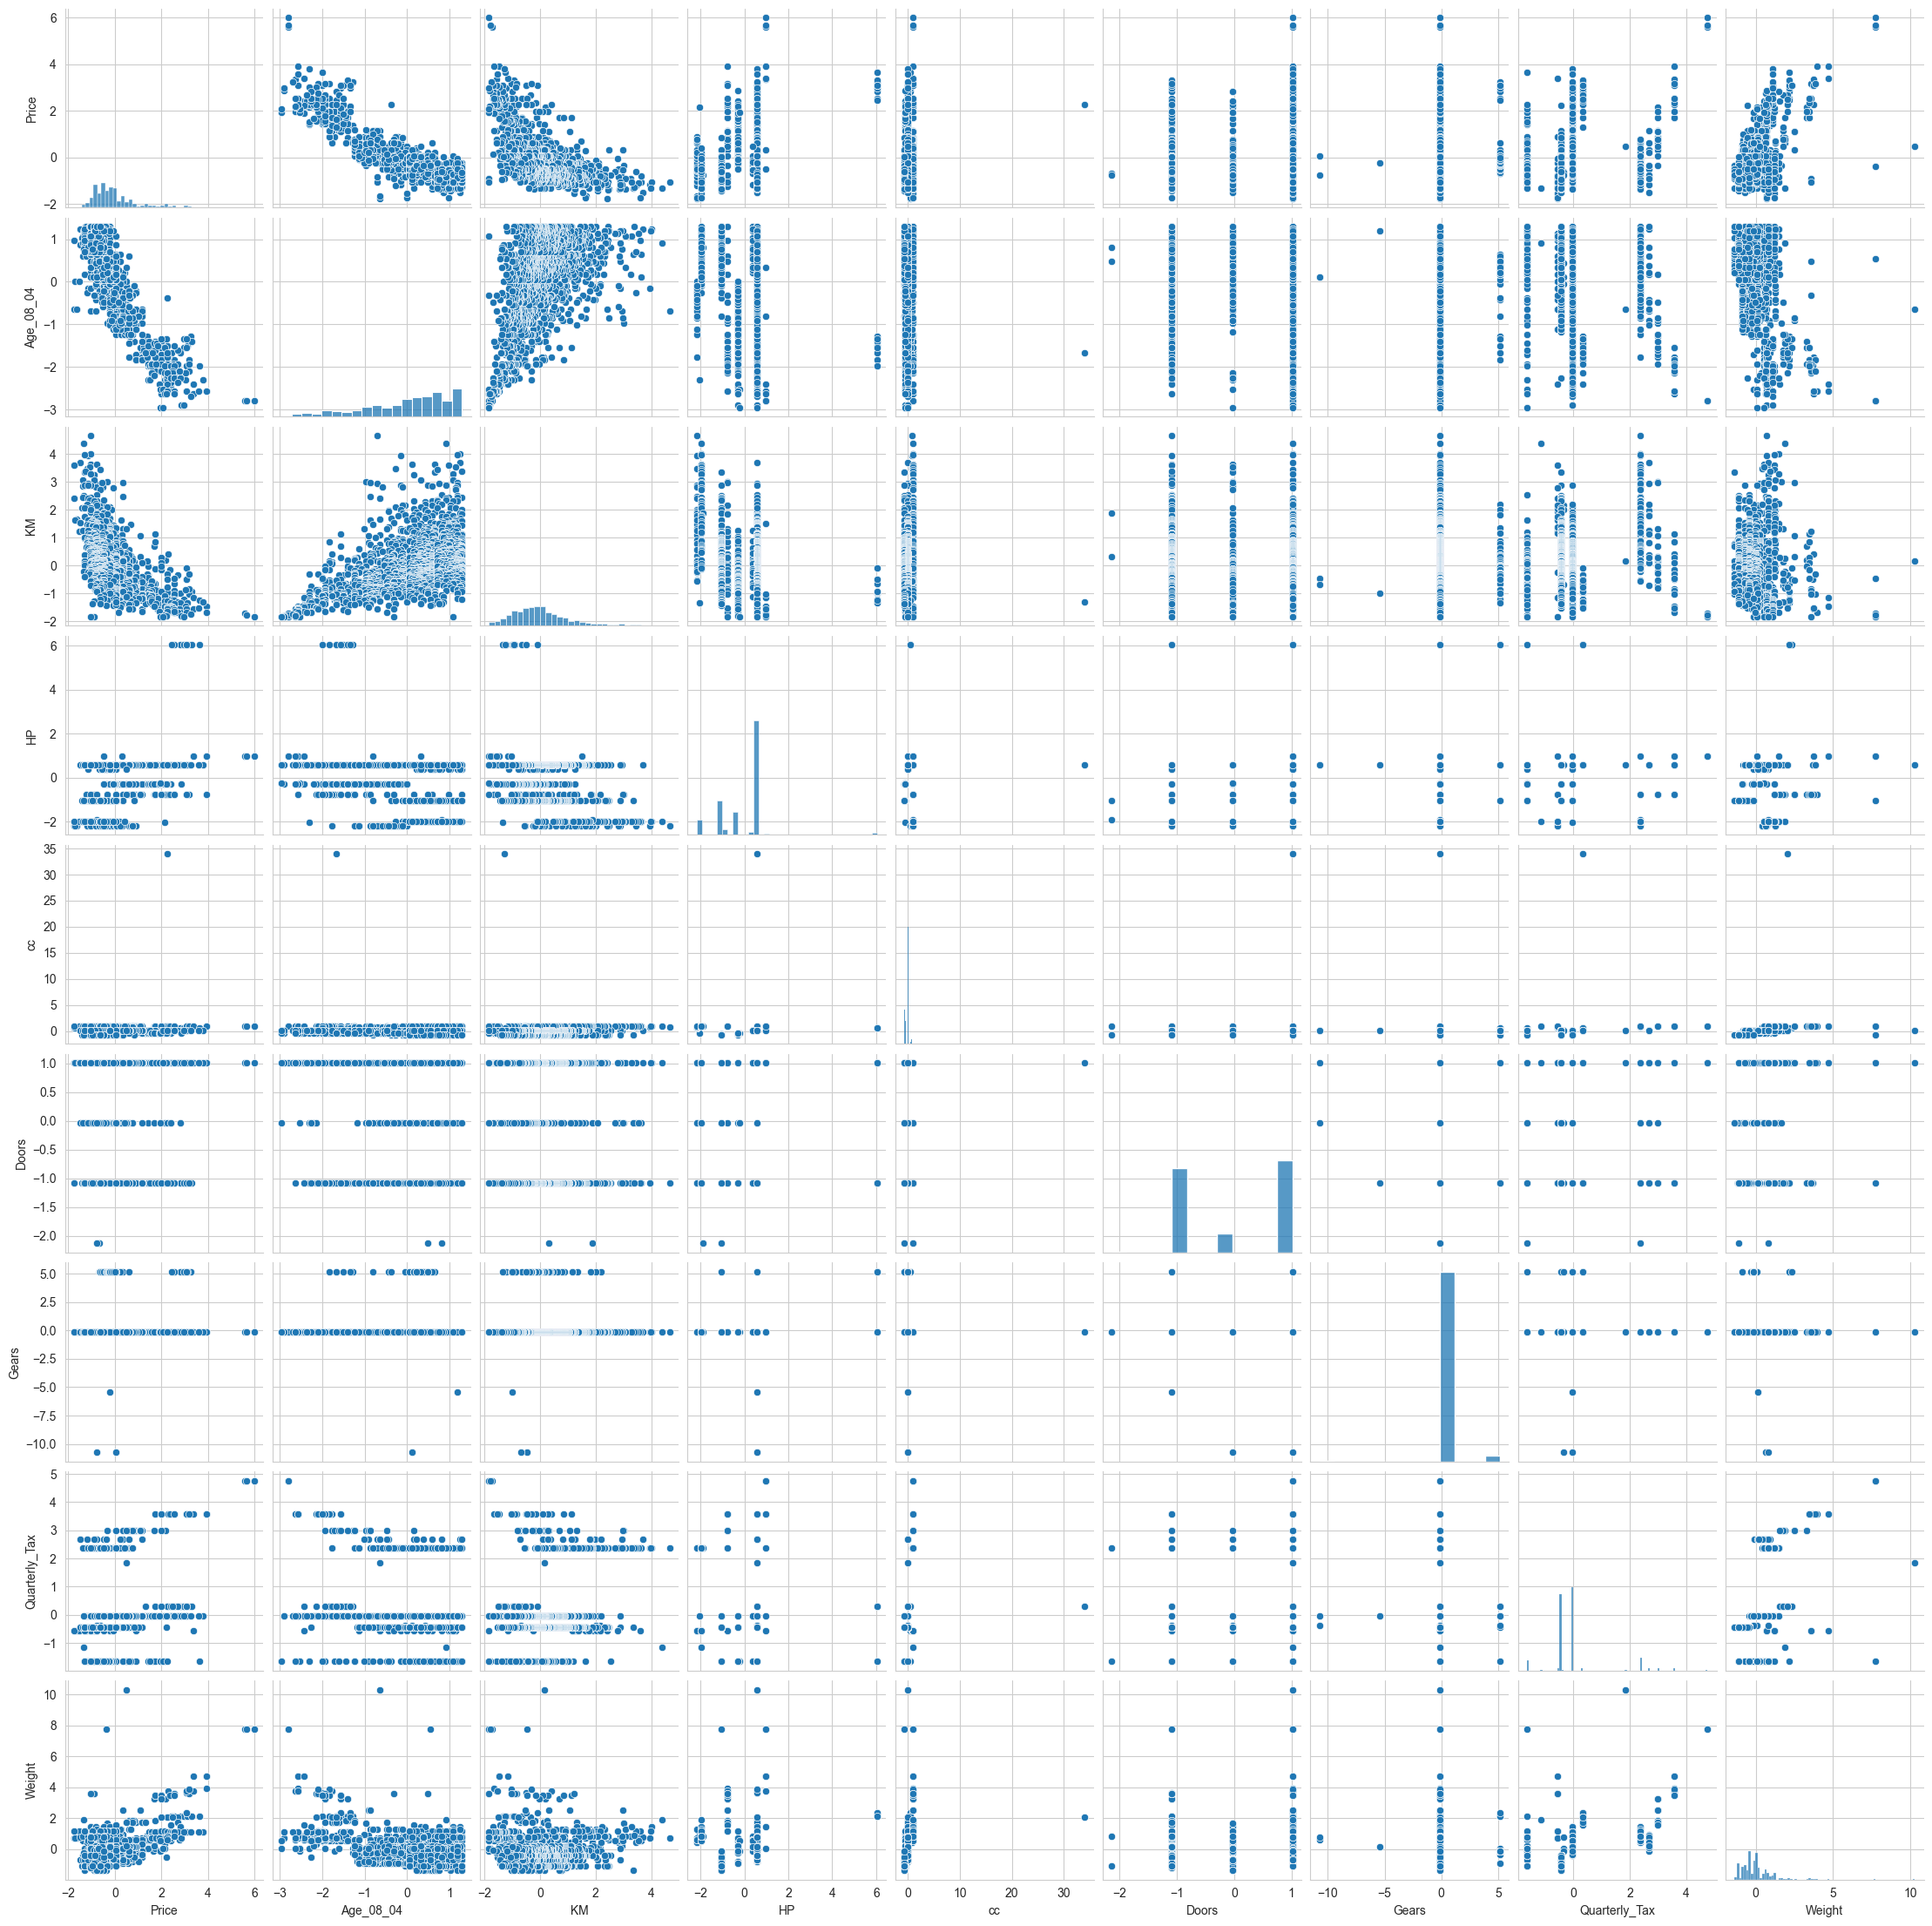

In [435]:
sns.pairplot(df_new)

<Axes: >

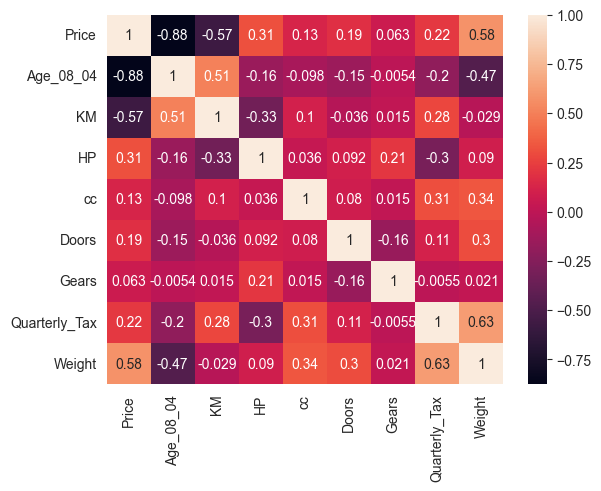

In [437]:
sns.heatmap(df_new.corr(), annot = True)

In [434]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [446]:
df_new.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [448]:
'Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight'

'Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight'

In [454]:
model_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = df_new).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:22:08   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1231.
Df Residuals:                    1427   BIC:                             1278.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.448e-16      0.010   1.48e-14      1.000      -0.019       0.019
Age_08_04        -0.6239      0.013    -46.512      0.000      -0.650      -0.598
KM               -0.2153      0.013    -16.622      0.000      -0.241      -0.190
HP                0.1309      0.012     11.241      0.000       0.108       0.154
cc               -0.0142      0.011     -1.344      0.179      -0.035       0.007
Doors            -0.0004      0.011     -0.040      0.968      -0.021       0.020
Gears             0.0309      0.010      3.016      0.003       0.011       0.051
Quarterly_Tax     0.0448      0.015      3.015      0.003       0.016       0.074
Weight            0.2461      0.015     15.880      0.000       0.216       0.277
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         3.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [455]:
X = df_new.drop(['Doors','cc'], axis = 1)

In [457]:
X.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Gears', 'Quarterly_Tax', 'Weight'], dtype='object')

In [463]:
model_2 = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight', data = df_new).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:27:15   Log-Likelihood:                -607.27
No. Observations:                1436   AIC:                             1229.
Df Residuals:                    1429   BIC:                             1265.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.448e-16      0.010   1.48e-14      1.000      -0.019       0.019
Age_08_04        -0.6241      0.013    -46.534      0.000      -0.650      -0.598
KM               -0.2165      0.013    -16.769      0.000      -0.242      -0.191
HP                0.1294      0.012     11.191      0.000       0.107       0.152
Gears             0.0311      0.010      3.096      0.002       0.011       0.051
Quarterly_Tax     0.0424      0.015      2.883      0.004       0.014       0.071
Weight            0.2427      0.015     16.393      0.000       0.214       0.272
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

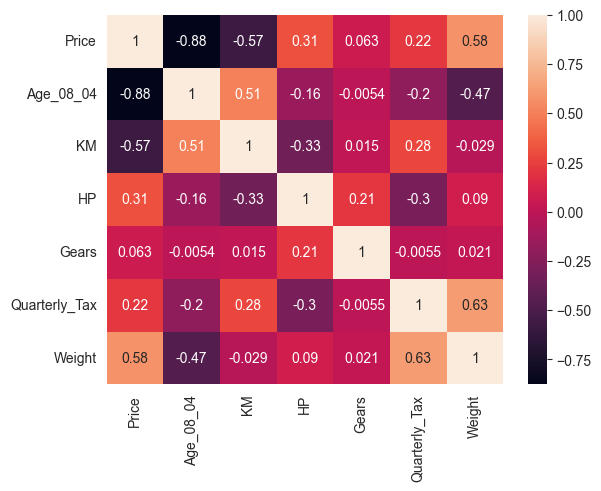

In [460]:
sns.heatmap(df_new[X.columns].corr(), annot = True)

In [461]:
#Greas is also very least related to the Price, so lets's drop that.

X = X.drop(['Gears'], axis = 1)
X.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight'], dtype='object')

In [465]:
model_3 = smf.ols('Price~Age_08_04+KM+HP+Quarterly_Tax+Weight', data = df_new).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1797.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:27:43   Log-Likelihood:                -612.08
No. Observations:                1436   AIC:                             1236.
Df Residuals:                    1430   BIC:                             1268.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.448e-16      0.010   1.48e-14      1.000      -0.019       0.019
Age_08_04        -0.6248      0.013    -46.454      0.000      -0.651      -0.598
KM               -0.2137      0.013    -16.543      0.000      -0.239      -0.188
HP                0.1377      0.011     12.209      0.000       0.116       0.160
Quarterly_Tax     0.0450      0.015      3.060      0.002       0.016       0.074
Weight            0.2407      0.015     16.224      0.000       0.212       0.270
==============================================================================
Omnibus:                      144.527   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.235
Skew:                          -0.209   Prob(JB):                    2.21e-198
Kurtosis:                       6.878   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

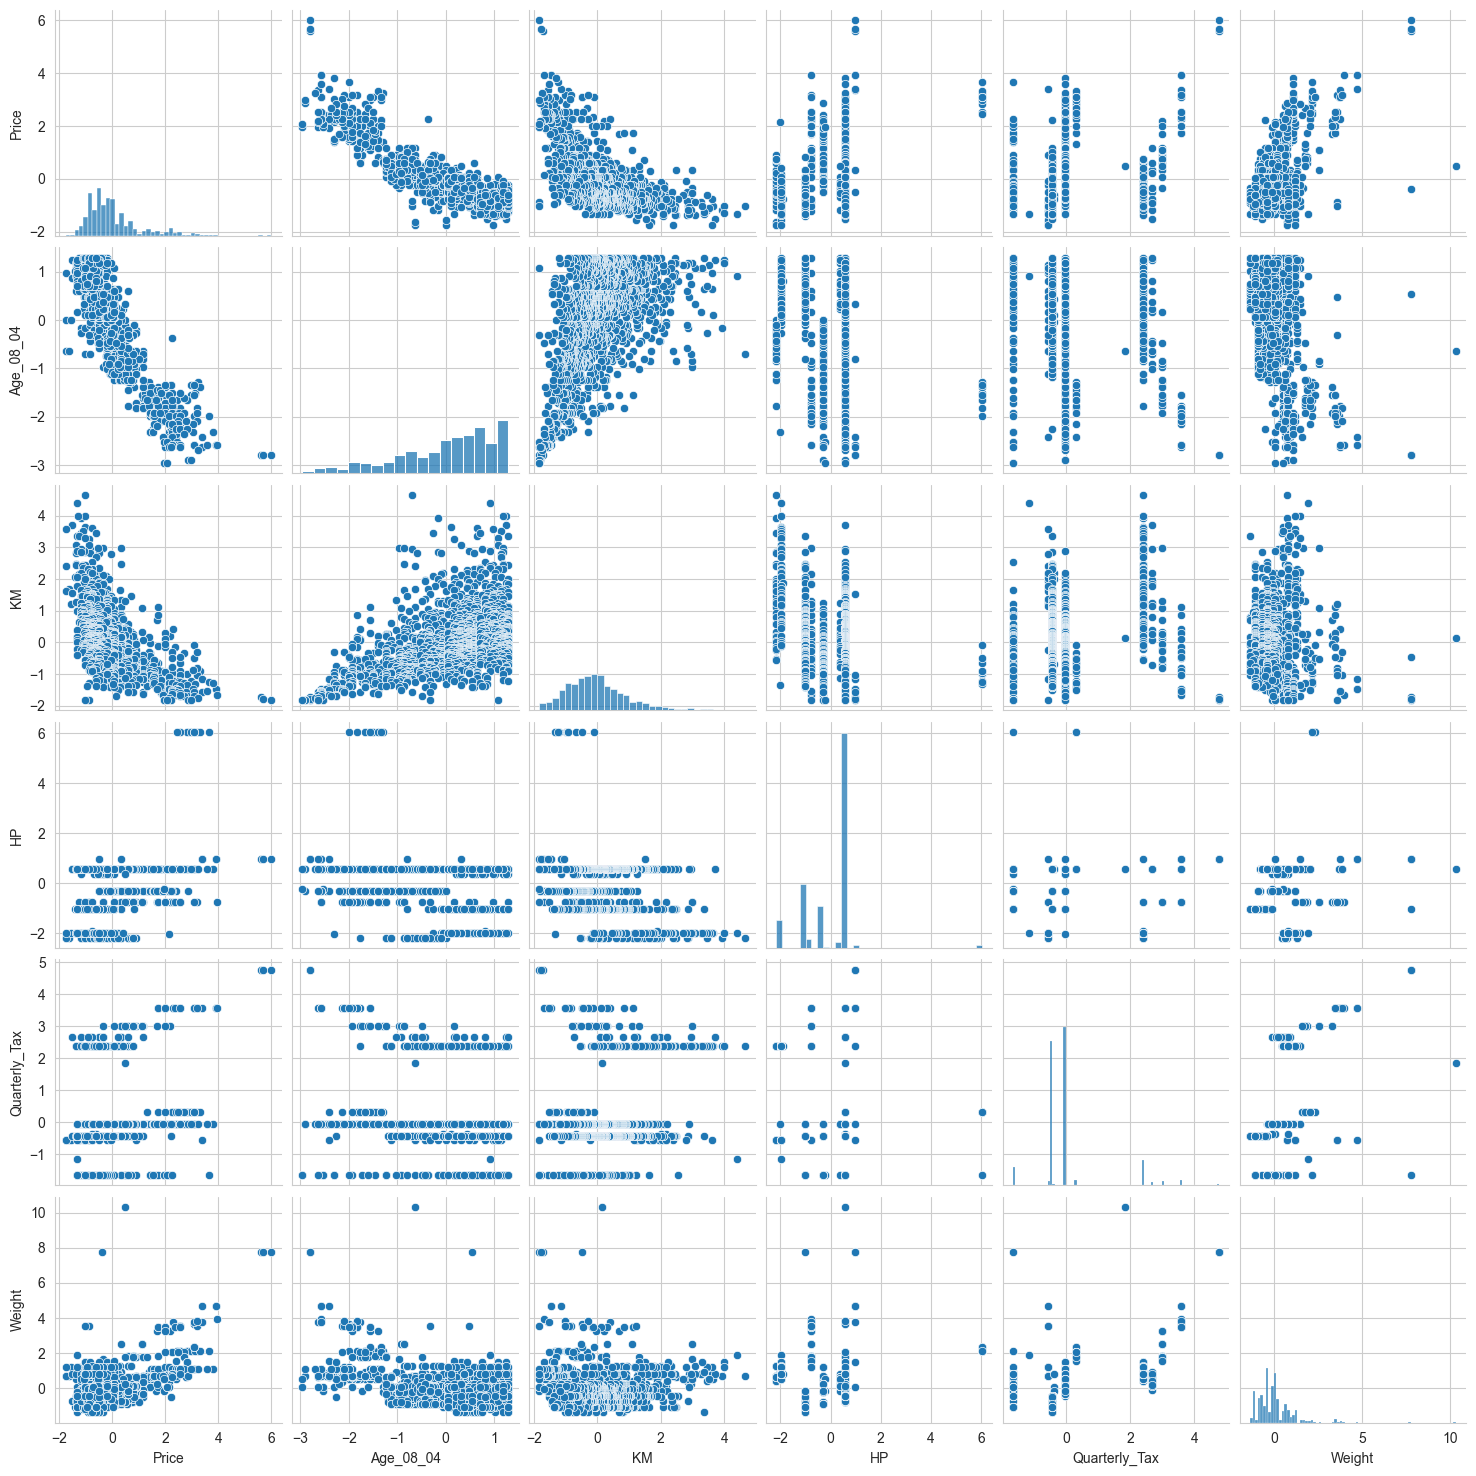

In [467]:
sns.pairplot(df_new[X.columns])

<Axes: >

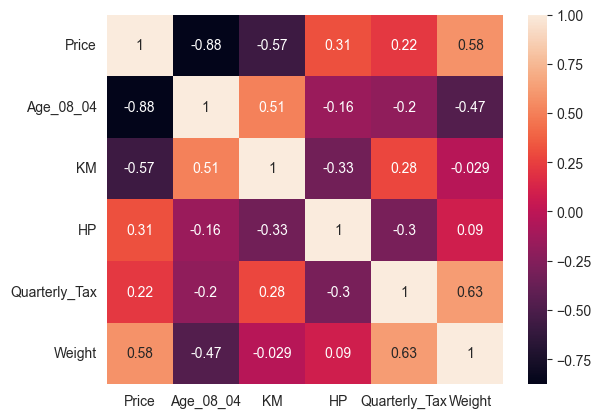

In [468]:
sns.heatmap(df_new[X.columns].corr(), annot= True)

Here, we can see that Quaterly_Tax and weight has a very high collinearity and so does KM and Age. 

This is going to affect our model.

In [469]:
model_4 = smf.ols('Price~Age_08_04+HP+Weight', data = df_new).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     2437.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:36:32   Log-Likelihood:                -738.64
No. Observations:                1436   AIC:                             1485.
Df Residuals:                    1432   BIC:                             1506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e-16      0.011   1.35e-14      1.000      -0.021       0.021
Age_08_04     -0.7483      0.012    -61.223      0.000      -0.772      -0.724
HP             0.1787      0.011     16.497      0.000       0.157       0.200
Weight         0.2133      0.012     17.598      0.000       0.190       0.237
==============================================================================
Omnibus:                      109.759   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.732
Skew:                          -0.129   Prob(JB):                    2.82e-117
Kurtosis:                       5.984   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we do feature selection then we are losing R2 value as compared to the last model, thought there is no significance drop in the values. 

Let us try PCA

# Principal Componenet Aanlysis (PCA)

In [470]:
df_new.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.763763  -1.771966 -0.574695 -0.768042  0.997419 -1.085139 -0.140425   
1  0.832715  -1.771966  0.117454 -0.768042  0.997419 -1.085139 -0.140425   
2  0.887877  -1.718184 -0.715386 -0.768042  0.997419 -1.085139 -0.140425   
3  1.163685  -1.610620 -0.547650 -0.768042  0.997419 -1.085139 -0.140425   
4  0.832715  -1.395491 -0.801028 -0.768042  0.997419 -1.085139 -0.140425   

   Quarterly_Tax    Weight  
0        2.98868  1.758561  
1        2.98868  1.758561  
2        2.98868  1.758561  
3        2.98868  1.758561  
4        2.98868  1.853577

In [474]:
array = df_new.values
x = array[:,1:]
y = array[:,0]

In [475]:
from sklearn.decomposition import PCA

In [476]:
pca_var = PCA()
pca_var.fit(x)

PCA()

In [477]:
var = pca_var.explained_variance_ratio_
var

array([0.27200315, 0.22354396, 0.14608777, 0.11987242, 0.10020462,
       0.06809042, 0.04068117, 0.0295165 ])

In [478]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 27.2 ,  49.55,  64.16,  76.15,  86.17,  92.98,  97.05, 100.  ])

In [480]:
# as we can see here, we can get a variance of more than 90% just by using 6 features
pca = PCA()
pca_std = pca.fit_transform(x)

pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

print(pca_std_df.shape)
pca_std_df.head()

(1436, 8)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.345804 -0.706272 -0.477660 -2.312218  0.496156 -0.439302 -0.442661   
1  3.299661 -1.140298 -0.589575 -2.126856  0.388752 -0.602289  0.008407   
2  3.332418 -0.639546 -0.460200 -2.328479  0.519184 -0.413640 -0.569624   
3  3.275705 -0.787722 -0.497897 -2.240725  0.495547 -0.468075 -0.530862   
4  3.259273 -0.715850 -0.484582 -2.223342  0.525760 -0.467951 -0.846036   

        PC8  
0 -0.611568  
1 -0.622313  
2 -0.598251  
3 -0.578590  
4 -0.463063

In [481]:
pca_std_df['Price']=y

In [482]:
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.345804 -0.706272 -0.477660 -2.312218  0.496156 -0.439302 -0.442661   
1  3.299661 -1.140298 -0.589575 -2.126856  0.388752 -0.602289  0.008407   
2  3.332418 -0.639546 -0.460200 -2.328479  0.519184 -0.413640 -0.569624   
3  3.275705 -0.787722 -0.497897 -2.240725  0.495547 -0.468075 -0.530862   
4  3.259273 -0.715850 -0.484582 -2.223342  0.525760 -0.467951 -0.846036   

        PC8     Price  
0 -0.611568  0.763763  
1 -0.622313  0.832715  
2 -0.598251  0.887877  
3 -0.578590  1.163685  
4 -0.463063  0.832715

In [484]:
pca_model = smf.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data = pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:52:05   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1231.
Df Residuals:                    1427   BIC:                             1278.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e-16      0.010   1.48e-14      1.000      -0.019       0.019
PC1            0.4477      0.007     67.597      0.000       0.435       0.461
PC2            0.4381      0.007     59.967      0.000       0.424       0.452
PC3            0.0162      0.009      1.791      0.073      -0.002       0.034
PC4           -0.2603      0.010    -26.084      0.000      -0.280      -0.241
PC5           -0.0375      0.011     -3.440      0.001      -0.059      -0.016
PC6           -0.0171      0.013     -1.290      0.197      -0.043       0.009
PC7            0.2326      0.017     13.580      0.000       0.199       0.266
PC8           -0.0145      0.020     -0.719      0.472      -0.054       0.025
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         3.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [485]:
pca_model = smf.ols('Price~PC1+PC2+PC3+PC4+PC5+PC7', data = pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1507.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:52:43   Log-Likelihood:                -607.46
No. Observations:                1436   AIC:                             1229.
Df Residuals:                    1429   BIC:                             1266.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e-16      0.010   1.48e-14      1.000      -0.019       0.019
PC1            0.4477      0.007     67.593      0.000       0.435       0.461
PC2            0.4381      0.007     59.963      0.000       0.424       0.452
PC3            0.0162      0.009      1.791      0.073      -0.002       0.034
PC4           -0.2603      0.010    -26.082      0.000      -0.280      -0.241
PC5           -0.0375      0.011     -3.440      0.001      -0.059      -0.016
PC7            0.2326      0.017     13.579      0.000       0.199       0.266
==============================================================================
Omnibus:                      162.730   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1134.335
Skew:                          -0.258   Prob(JB):                    4.81e-247
Kurtosis:                       7.323   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Residual Analysis

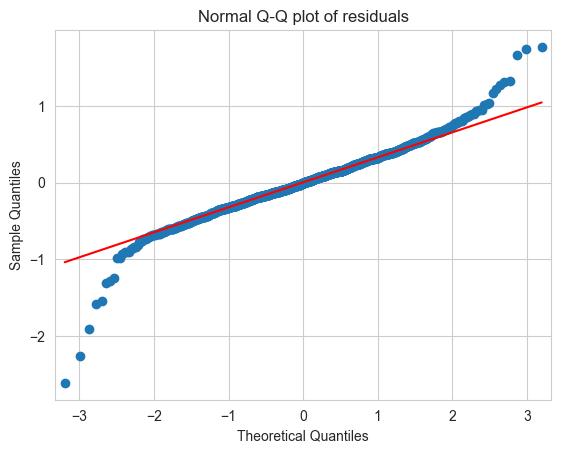

In [487]:
sm.qqplot(pca_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

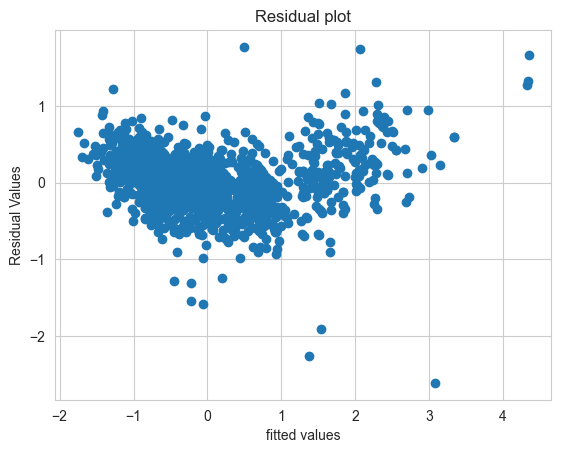

In [489]:
plt.scatter(pca_model.fittedvalues, pca_model.resid)
plt.title('Residual plot')
plt.xlabel('fitted values')
plt.ylabel('Residual Values')
plt.show()

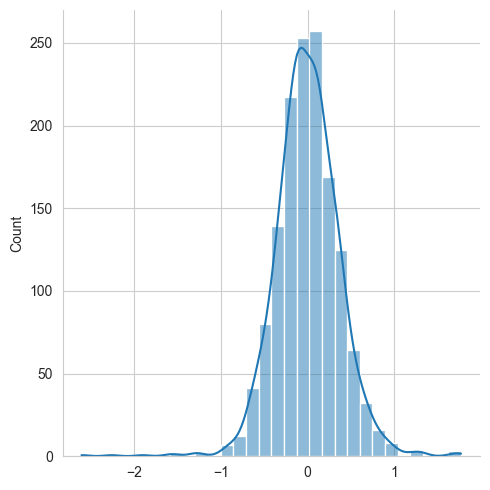

In [490]:
sns.displot(pca_model.resid, bins = 30, kde = True)

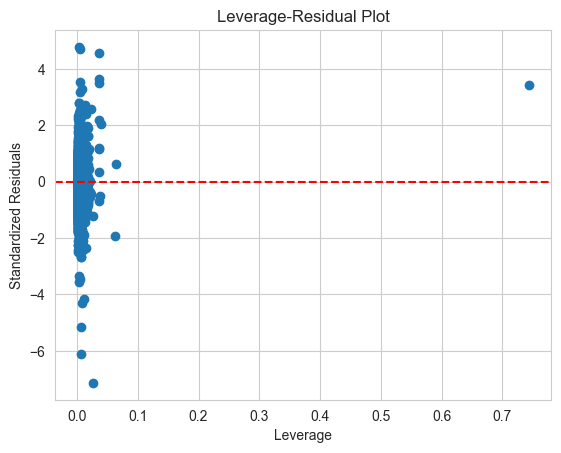

In [491]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(pca_model)
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

plt.scatter(leverage, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.title("Leverage-Residual Plot")
plt.show()


# Detecting Influencers/Outliers in the Model
Two techniques: 1. Cook's Distance and 2. Leverage value

In [492]:
influence_points = pca_model.get_influence()
c, p_value = influence_points.cooks_distance
print(c)
print(p_value)

[7.79591051e-03 4.02821096e-03 5.92669309e-03 ... 2.86225093e-08
 8.89509007e-04 7.33016546e-03]
[0.99999972 0.99999997 0.99999989 ... 1.         1.         0.99999977]


In [496]:
from statsmodels.graphics.regressionplots import influence_plot

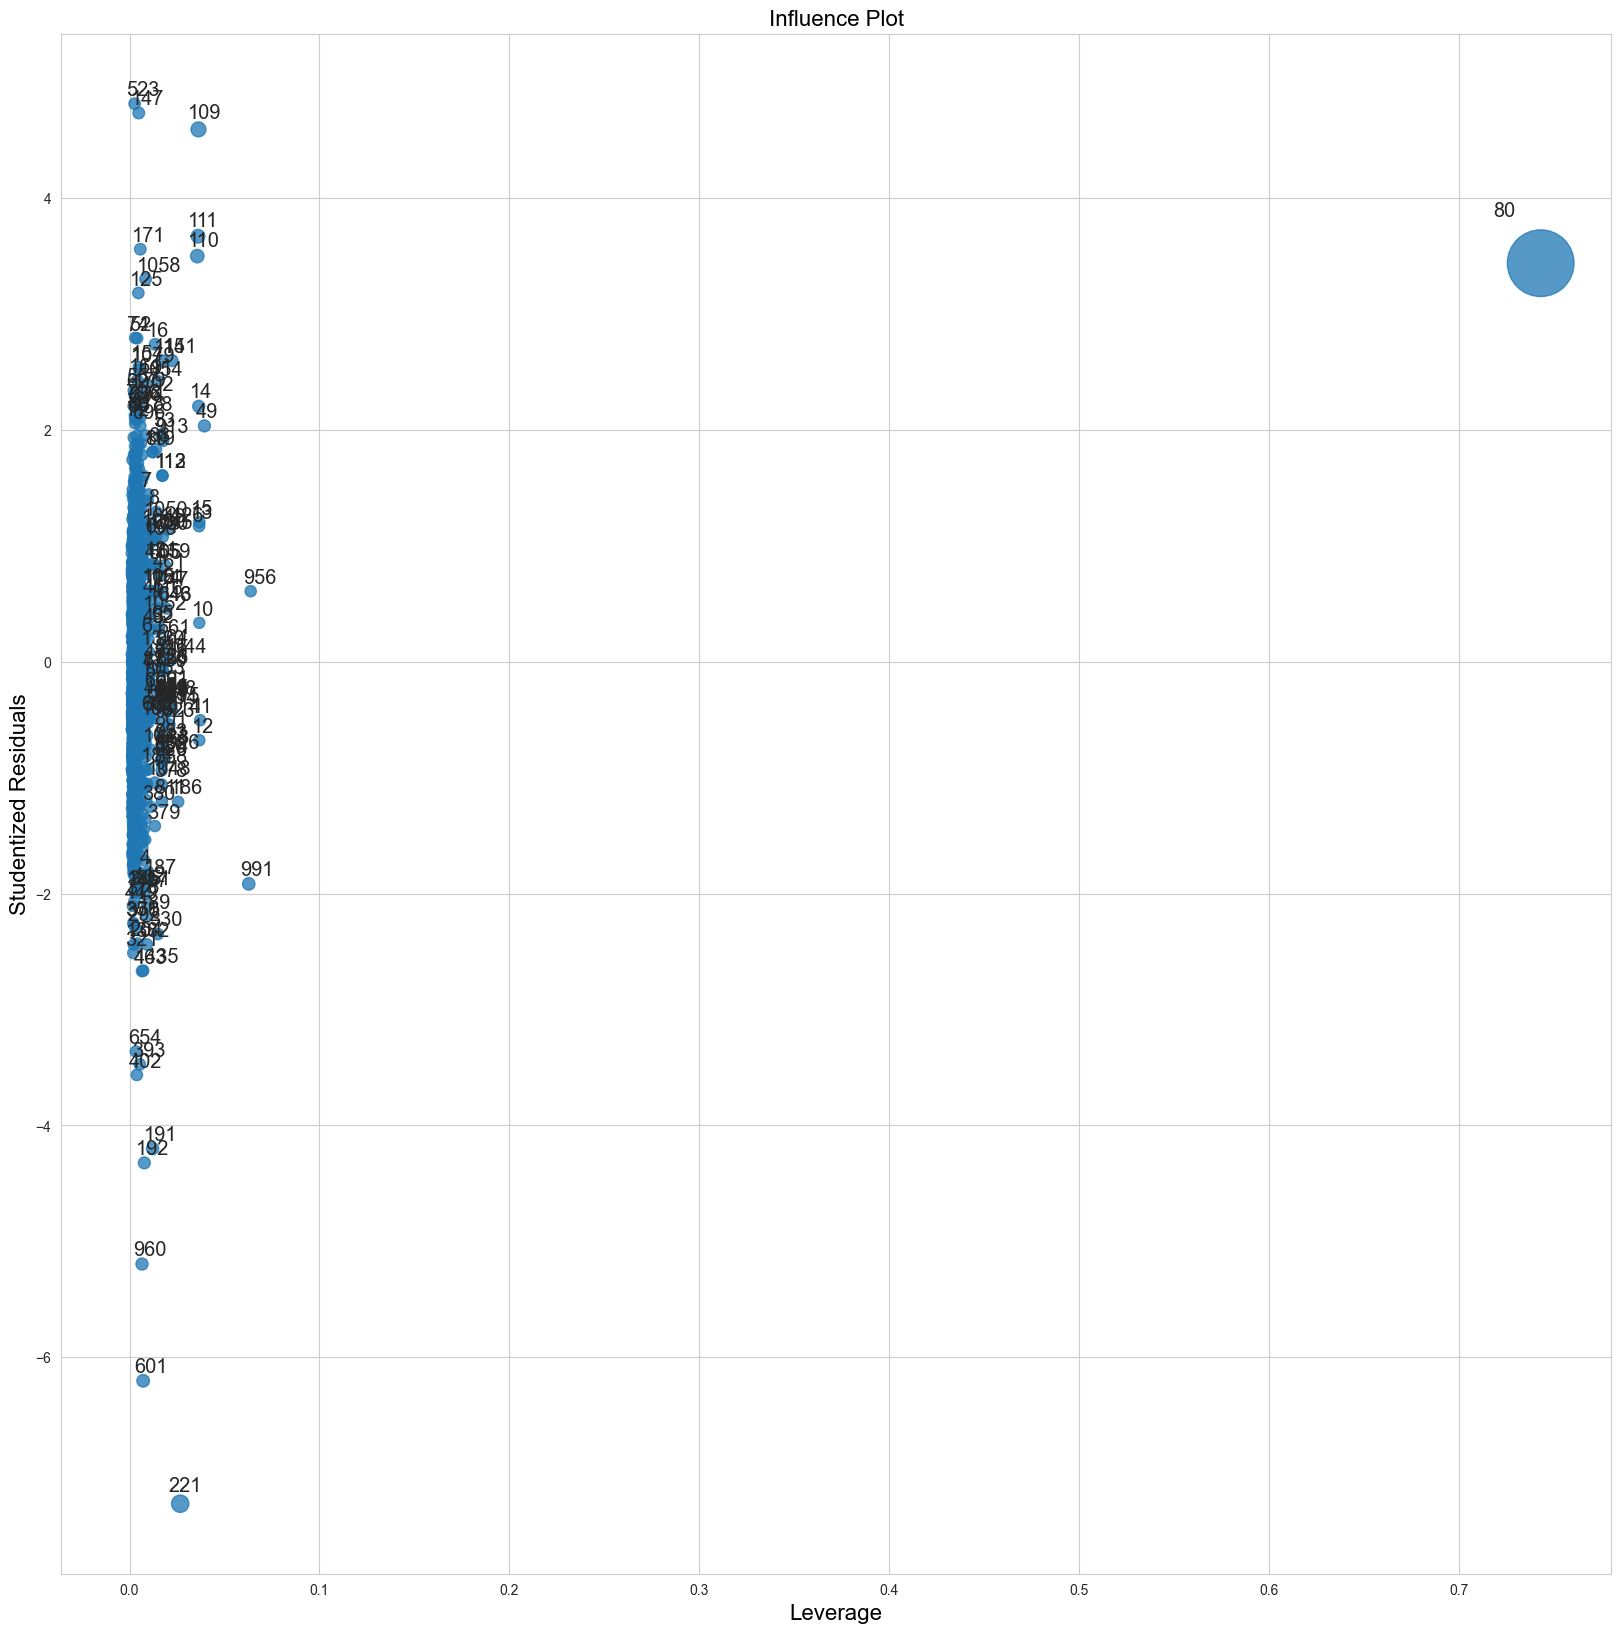

In [498]:
fig, ax = plt.subplots(figsize=(20,20))
fig = influence_plot(pca_model, ax = ax)
plt.show()

# Leverage cutoff value = 3*(k+1)/n
### where k is the number of features and n is the number of columns

In [500]:
k = pca_std_df.shape[1]
n = pca_std_df.shape[0]

In [501]:
leverage_cutoff = (3*(k+1))/n
print('Cut off line at', np.round(leverage_cutoff,2))

Cut off line at 0.02


### plotting the influencers and also a cut off line using the stem plot

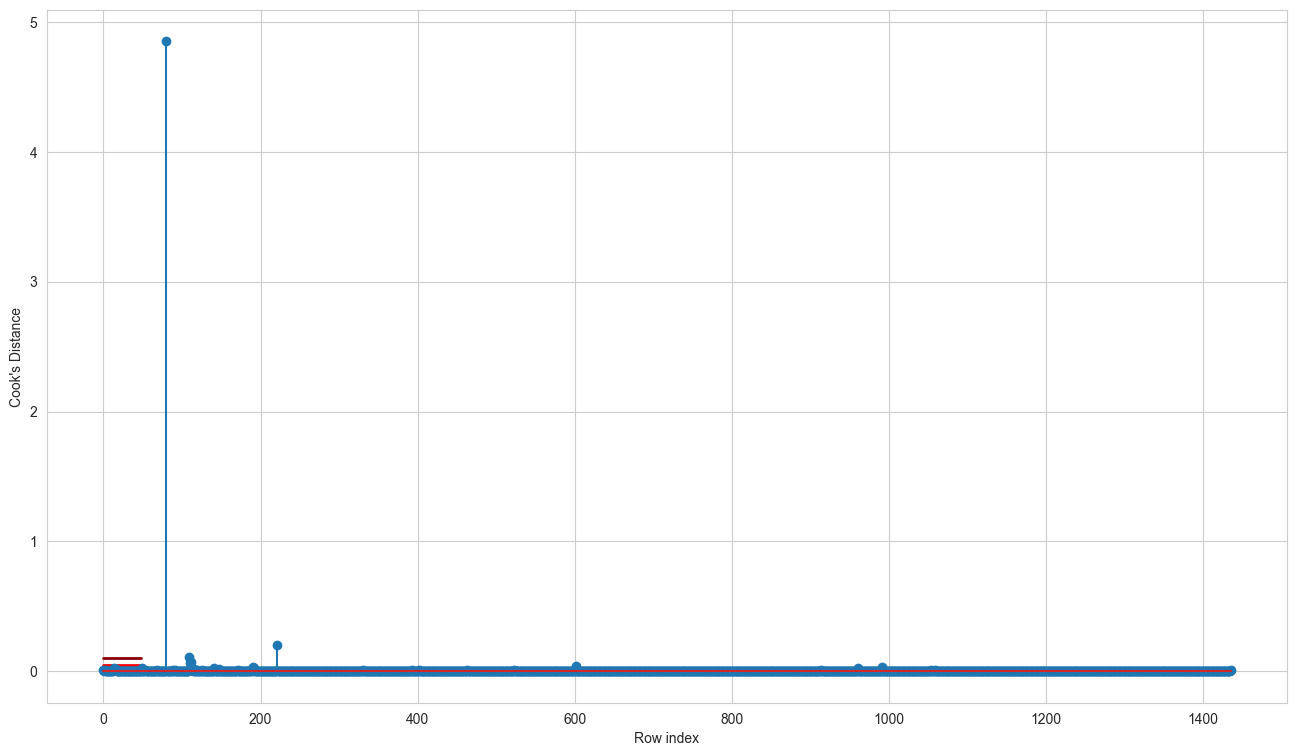

In [503]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(pca_std_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [505]:
np.argmax(c), np.max(c)

(80, 4.852238492035857)

In [508]:
pca_std_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.345804 -0.706272 -0.477660 -2.312218  0.496156 -0.439302 -0.442661   
1  3.299661 -1.140298 -0.589575 -2.126856  0.388752 -0.602289  0.008407   
2  3.332418 -0.639546 -0.460200 -2.328479  0.519184 -0.413640 -0.569624   
3  3.275705 -0.787722 -0.497897 -2.240725  0.495547 -0.468075 -0.530862   
4  3.259273 -0.715850 -0.484582 -2.223342  0.525760 -0.467951 -0.846036   

        PC8     Price  
0 -0.611568  0.763763  
1 -0.622313  0.832715  
2 -0.598251  0.887877  
3 -0.578590  1.163685  
4 -0.463063  0.832715

In [509]:
pca_std_df[pca_std_df.index.isin([80])]

PC1      PC2       PC3       PC4        PC5       PC6       PC7  \
80  14.42899 -3.39483 -8.578205  9.205981  25.507845  11.69663  0.617121   

         PC8    Price  
80  0.187316  2.26692

In [510]:
df_lev = pca_std_df.copy()

df_lev = df_lev.drop(df_lev.index[[80]],axis = 0).reset_index(drop = True)
df_lev.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.345804 -0.706272 -0.477660 -2.312218  0.496156 -0.439302 -0.442661   
1  3.299661 -1.140298 -0.589575 -2.126856  0.388752 -0.602289  0.008407   
2  3.332418 -0.639546 -0.460200 -2.328479  0.519184 -0.413640 -0.569624   
3  3.275705 -0.787722 -0.497897 -2.240725  0.495547 -0.468075 -0.530862   
4  3.259273 -0.715850 -0.484582 -2.223342  0.525760 -0.467951 -0.846036   

        PC8     Price  
0 -0.611568  0.763763  
1 -0.622313  0.832715  
2 -0.598251  0.887877  
3 -0.578590  1.163685  
4 -0.463063  0.832715

In [511]:
df_lev.shape

(1435, 9)

In [513]:
pca_model = smf.ols('Price~PC1+PC2+PC3+PC4+PC5+PC7', data = df_lev).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1514.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:31:39   Log-Likelihood:                -601.62
No. Observations:                1435   AIC:                             1217.
Df Residuals:                    1428   BIC:                             1254.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0017      0.010     -0.179      0.858      -0.021       0.017
PC1            0.4362      0.007     58.895      0.000       0.422       0.451
PC2            0.4415      0.007     60.121      0.000       0.427       0.456
PC3            0.0290      0.010      2.975      0.003       0.010       0.048
PC4           -0.2770      0.011    -25.026      0.000      -0.299      -0.255
PC5           -0.0930      0.019     -4.781      0.000      -0.131      -0.055
PC7            0.2293      0.017     13.415      0.000       0.196       0.263
==============================================================================
Omnibus:                      163.851   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1198.948
Skew:                          -0.238   Prob(JB):                    4.49e-261
Kurtosis:                       7.453   Cond. No.                         3.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [518]:
while pca_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        pca_model=smf.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8',data=df_lev).fit()
        (c,_)=pca_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df_lev=df_lev.drop(df_lev.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df_lev
    else:
        final_model=smf.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8',data=df_lev).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8851845904421738
Thus model accuracy is improved to 0.8894191849749751
Thus model accuracy is improved to 0.8914204825569462
Thus model accuracy is improved to 0.8921467826162198
Thus model accuracy is improved to 0.8934037497368834
Thus model accuracy is improved to 0.8944954473640403
Thus model accuracy is improved to 0.8958333530393431
Thus model accuracy is improved to 0.8966334481080778
Thus model accuracy is improved to 0.8941835374074523
Thus model accuracy is improved to 0.8951069956497651
Thus model accuracy is improved to 0.8965514940097824
Thus model accuracy is improved to 0.8971531368893257
Thus model accuracy is improved to 0.8979680072945878
Thus model accuracy is improved to 0.8975421185310548
Thus model accuracy is improved to 0.8970095523065386
Thus model accuracy is improved to 0.8965434597967322
Thus model accuracy is improved to 0.8961255789744986
Thus model accuracy is improved to 0.897264698289888
Thus model accuracy is improv

In [519]:
df_lev.shape

(1330, 9)

In [520]:
influence_points = final_model.get_influence()
c, p_value = influence_points.cooks_distance

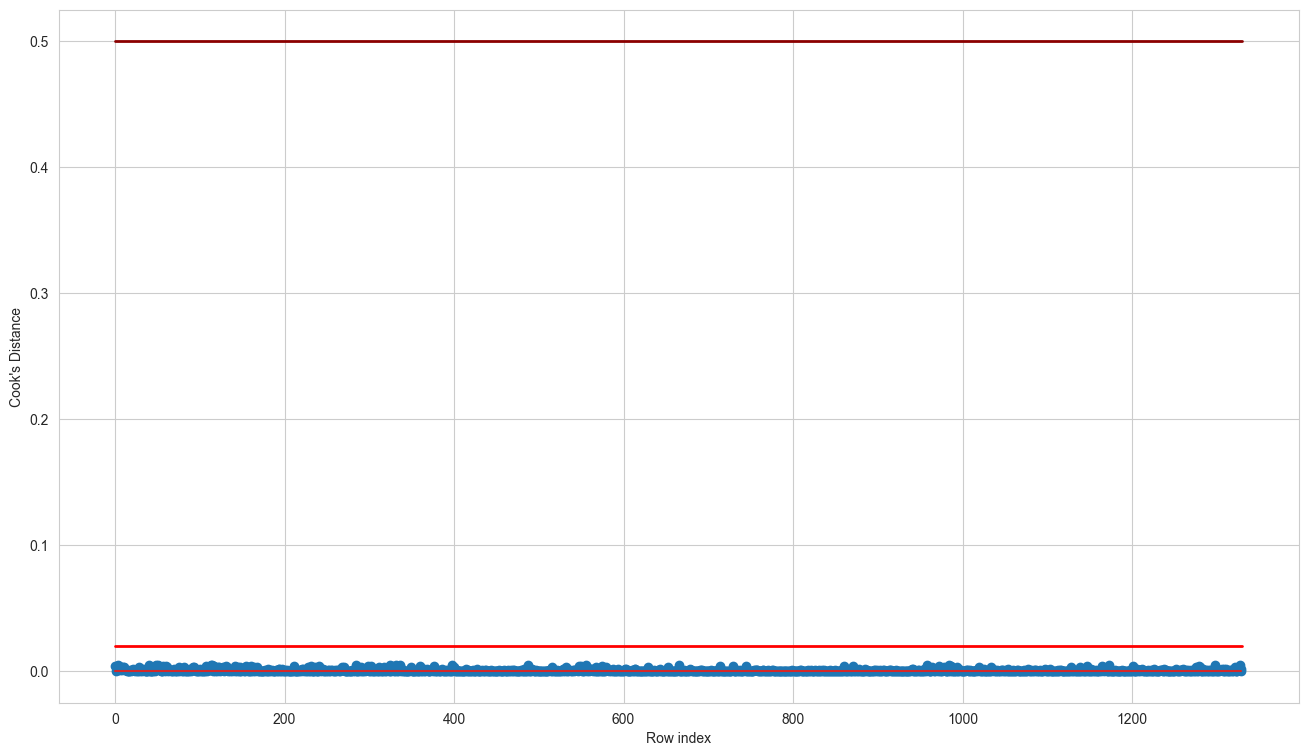

In [521]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df_lev)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [522]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:42:51   Log-Likelihood:                -137.16
No. Observations:                1330   AIC:                             292.3
Df Residuals:                    1321   BIC:                             339.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0098      0.008      1.282      0.200      -0.005       0.025
PC1            0.4031      0.007     55.161      0.000       0.389       0.417
PC2            0.4209      0.007     63.949      0.000       0.408       0.434
PC3            0.0905      0.009      9.865      0.000       0.072       0.108
PC4           -0.3214      0.011    -28.870      0.000      -0.343      -0.300
PC5           -0.2358      0.028     -8.443      0.000      -0.291      -0.181
PC6           -0.1488      0.024     -6.252      0.000      -0.196      -0.102
PC7            0.2537      0.014     17.525      0.000       0.225       0.282
PC8            0.3456      0.025     13.805      0.000       0.297       0.395
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""